In [173]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [174]:
import gym
import pygame
from bettermdptools.algorithms.rl import RL

from examples.test_env import TestEnv
#plot state values
from examples.plots import Plots
from bettermdptools.algorithms.planner import Planner  # use the fix to pi by https://github.com/jlm429/bettermdptools/pull/15/files
from gym.envs.toy_text.frozen_lake import generate_random_map

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import time

In [4]:
def v_iters_plot(data, label):
    df = pd.DataFrame(data=data)
    df.columns = [label]
    sns.set_theme(style="whitegrid")
    title = label + " v Iterations"
    sns.lineplot(x=df.index, y=label, data=df).set_title(title)
    plt.show()

## Plan

1. Try deterministic and set map
2. Try adding stochasticity
3. Try random map
4. Loop through sizes
5. Once I choose a large size, loop through gamma.
6. Maybe loop through n_iterations

## Metrics
1. I need maxvalue over iterations plot. Have multiple by size
2. plot the optimal policy for the large size.
3. I need convergence by gamma. pick the large size.
4. wall clock time over size. keep n_iterations the same.
5. show heatmap of value state

# Value Iteration
## Convergence

# Value Iteration
## Frozen Lake by size 32 x 32
### No stochasticity
### Repeat 5x
### Set gamma to 0.9
### Set n_iterations to 10, 100, 1000

In [139]:
wall_clock_times_by_n_iters_vi = []
wall_clock_times_std_by_n_iters_vi = []
Vs_by_n_iters_vi = []
Vs_std_by_n_iters_vi = []
V_tracks_by_n_iters_vi = []
V_tracks_std_by_n_iters_vi = []
pis_by_n_iters_vi = []
pis_std_by_n_iters_vi = []
convergence_indexes_vi = []
gamma=.90
n_iters = [10, 100, 1000, 10000]
size = 32
seeds = [1,2,3,4,5]
for n_iter in n_iters:
    inner_wall_clock_time = []
    inner_vs = []
    inner_v_tracks = []
    inner_pis = []
    inner_convergence_index = []
    for seed in seeds:
        frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=size), is_slippery=True, render_mode=None)  # set the environment
        frozen_lake.reset(seed=seed)  # set the seed for testing
        start = time.time()
        V, V_track, pi, convergence_index = Planner(frozen_lake.env.P).value_iteration(gamma=gamma,n_iters=n_iter)  # value iteration learning
        end = time.time()
        running_time = end - start
        #print("runtime = %.5f seconds" % running_time)
        inner_wall_clock_time.append(running_time)
        inner_vs.append(V)
        inner_v_tracks.append(V_track)
        inner_pis.append(pi)
        inner_convergence_index.append(convergence_index)
    wall_clock_times_by_n_iters_vi.append(np.mean(inner_wall_clock_time, axis=0))
    wall_clock_times_std_by_n_iters_vi.append(np.std(inner_wall_clock_time, axis=0))
    Vs_by_n_iters_vi.append(np.mean(inner_vs, axis=0))
    Vs_std_by_n_iters_vi.append(np.std(inner_vs, axis=0))
    V_tracks_by_n_iters_vi.append(np.mean(inner_v_tracks, axis=0))
    V_tracks_std_by_n_iters_vi.append(np.std(inner_v_tracks, axis=0))
    convergence_indexes_vi.append(np.mean(inner_convergence_index, axis=0))
#     pis_by_n_iters_vi.append(np.mean(inner_pis, axis=0))
#     pis_std_by_n_iters_vi.append(np.std(inner_pis, axis=0))

/Users/thomascho/omscs/ML/Markov Decision Processes/bettermdptools/algorithms/planner.py:78: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


runtime = 0.10 seconds
runtime = 0.10 seconds
runtime = 0.09 seconds
runtime = 0.09 seconds
runtime = 0.08 seconds
runtime = 0.95 seconds
runtime = 0.91 seconds
runtime = 0.93 seconds
runtime = 1.05 seconds
runtime = 1.04 seconds
runtime = 1.67 seconds
runtime = 1.83 seconds
runtime = 1.71 seconds
runtime = 1.41 seconds
runtime = 1.48 seconds
runtime = 1.42 seconds
runtime = 1.31 seconds
runtime = 1.83 seconds
runtime = 1.56 seconds
runtime = 1.62 seconds


# Value Iteration
## Max Value by n iters

In [112]:
# for i in range(len(n_iters)):
#     fig, ax = plt.subplots()
#     fig.set_size_inches(18.5, 10.5)
#     max_value_per_iter = np.amax(V_tracks_by_n_iters_vi[i], axis=1)  # max value of all states per iteration
#     max_value_std_per_iter = np.amax(V_tracks_by_n_iters_vi[i], axis=1)
#     ax.plot(range(len(max_value_per_iter)), max_value_per_iter, label=n_iters[i], alpha=0.7)
#     ax.axvline(x=convergence_indexes_vi[i], color='red', ls='--', lw=2)
#     lower_std = np.array(max_value_per_iter) - np.array(max_value_std_per_iter)
#     upper_std = np.array(max_value_per_iter) + np.array(max_value_std_per_iter)
# #     ax.fill_between(range(len(max_value_per_iter)), lower_std, upper_std, alpha=0.2)    
#     ax.set_xscale('log', base=10)
#     ax.set_ylim(0,1.1)
#     ax.set_title(f"Frozen Lake: VI - Maximum Value vs. Iteration (by {n_iters[i]})", fontsize=26)
#     ax.set_xlabel('Iterations', fontsize=26)
#     ax.set_ylabel('Max Value', fontsize=26)
#     ax.legend(loc='lower right')
#     plt.show()

In [113]:
# n_iters = [10, 100, 1000, 10000]
# for i in range(len(n_iters)):
#     fig, ax = plt.subplots()
#     fig.set_size_inches(18.5, 10.5)
#     max_value_per_iter = np.mean(V_tracks_by_n_iters_vi[i], axis=1)  # max value of all states per iteration
#     max_value_std_per_iter = np.mean(V_tracks_by_n_iters_vi[i], axis=1)
#     ax.plot(range(len(max_value_per_iter)), max_value_per_iter, label=n_iters[i], alpha=0.7)
#     ax.axvline(x=convergence_indexes_vi[i], color='red', ls='--', lw=2)
#     lower_std = np.array(max_value_per_iter) - np.array(max_value_std_per_iter)
#     upper_std = np.array(max_value_per_iter) + np.array(max_value_std_per_iter)
# #     ax.fill_between(range(len(max_value_per_iter)), lower_std, upper_std, alpha=0.2)    
#     ax.set_xscale('log', base=10)
#     ax.set_ylim(0,1.1)
#     ax.set_title(f"Frozen Lake: VI - Mean Value vs. Iteration (by {n_iters[i]})", fontsize=26)
#     ax.set_xlabel('Iterations', fontsize=26)
#     ax.set_ylabel('Mean Value', fontsize=26)
#     ax.legend(loc='lower right')
#     plt.show()

# Value Iteration
# Generalization

# Value Iteration
## Frozen Lake by size 2,4,8,16,32,64
### No stochasticity
### Repeat 5x
### Set gamma to 0.9
### Set n_iterations to 1k

In [144]:
wall_clock_times_by_sizes_vi = []
wall_clock_times_std_by_sizes_vi = []
Vs_by_sizes_vi = []
Vs_std_by_sizes_vi = []
V_tracks_by_sizes_vi = []
V_tracks_std_by_sizes_vi = []
pis_by_sizes_vi = []
pis_std_by_sizes_vi = []
convergence_indexes_by_sizes_vi = []
gamma=.90
n_iters = 1000
sizes = [2**j for j in range(2,7)]  # 2,4,8,16,32,64
seeds = [1,2,3,8,5]
for size in sizes:
    inner_wall_clock_time = []
    inner_vs = []
    inner_v_tracks = []
    inner_pis = []   
    inner_convergence_index = []      
    for seed in seeds:
        frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=size), is_slippery=True, render_mode=None)  # set the environment
        frozen_lake.reset(seed=seed)  # set the seed for testing
        start = time.time()
        V, V_track, pi, convergence_index = Planner(frozen_lake.env.P).value_iteration(gamma=gamma,n_iters=n_iters)  # value iteration learning
        end = time.time()
        running_time = end - start
        #print("runtime = %.5f seconds" % running_time)
        inner_wall_clock_time.append(running_time)
        inner_vs.append(V)
        inner_v_tracks.append(V_track)
        inner_pis.append(pi)
        inner_convergence_index.append(convergence_index)              
    wall_clock_times_by_sizes_vi.append(np.mean(inner_wall_clock_time, axis=0))
    wall_clock_times_std_by_sizes_vi.append(np.std(inner_wall_clock_time, axis=0))
    Vs_by_sizes_vi.append(np.mean(inner_vs, axis=0))
    Vs_std_by_sizes_vi.append(np.std(inner_vs, axis=0))
    V_tracks_by_sizes_vi.append(np.mean(inner_v_tracks, axis=0))
    V_tracks_std_by_sizes_vi.append(np.std(inner_v_tracks, axis=0))
    convergence_indexes_by_sizes_vi.append(np.mean(inner_convergence_index, axis=0))    
#     pis_by_sizes_vi.append(np.mean(inner_pis, axis=0))
#     pis_std_by_sizes_vi.append(np.std(inner_pis, axis=0))

runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.09 seconds
runtime = 0.12 seconds
runtime = 0.11 seconds
runtime = 0.10 seconds
runtime = 0.10 seconds
runtime = 0.45 seconds
runtime = 0.41 seconds
runtime = 0.36 seconds
runtime = 0.38 seconds
runtime = 0.39 seconds
runtime = 1.44 seconds
runtime = 1.60 seconds
runtime = 1.32 seconds
runtime = 1.74 seconds
runtime = 1.50 seconds
runtime = 6.18 seconds
runtime = 6.12 seconds
runtime = 6.31 seconds
runtime = 6.22 seconds
runtime = 6.53 seconds


In [283]:
# sizes = [ 2**j for j in range(2,8)]  ## sizes by power of 2
# for i in range(len(sizes)):
#     data = np.around(np.array(Vs_by_sizes_vi[i]).reshape((sizes[i], sizes[i])), 2)  # data for heatmap 
#     df = pd.DataFrame(data=data)  # dataframe
#     sns.heatmap(df, annot=True).set_title(f"{sizes[i]}x{sizes[i]}")  #heatmap of state values
#     plt.show()  #show

In [114]:
# fig, ax = plt.subplots()
# fig.set_size_inches(18.5, 10.5)
# for i in range(len(sizes)):
#     max_value_per_iter = np.amax(V_tracks_by_sizes_vi[i], axis=1)  # max value of all states per iteration
#     max_value_std_per_iter = np.amax(V_tracks_by_sizes_vi[i], axis=1)
#     ax.plot(range(0,n_iters), max_value_per_iter, label=sizes[i], alpha=0.7)
#     lower_std = np.array(max_value_per_iter) - np.array(max_value_std_per_iter)
#     upper_std = np.array(max_value_per_iter) + np.array(max_value_std_per_iter)
# #     ax.fill_between(range(0,n_iters), lower_std, upper_std, alpha=0.2)    
#     ax.set_xscale('log', base=10)
#     ax.set_ylim(0,1.1)
# ax.set_title("Frozen Lake: VI - Maximum Value vs. Iteration (by Sizes)", fontsize=26)
# ax.set_xlabel('Iterations', fontsize=26)
# ax.set_ylabel('Max Value', fontsize=26)
# ax.legend(loc='lower right')
# plt.show()

# Value Iteration
## Wall Clock Time by Sizes

In [115]:
# fig, ax = plt.subplots()
# fig.set_size_inches(18.5, 10.5)
# lower_std = np.array(wall_clock_times_by_sizes_vi) - np.array(wall_clock_times_std_by_sizes_vi)
# upper_std = np.array(wall_clock_times_by_sizes_vi) + np.array(wall_clock_times_std_by_sizes_vi)
# ax.plot(sizes, wall_clock_times_by_sizes_vi, label="VI", marker='o')
# ax.fill_between(sizes, lower_std, upper_std, color='grey', alpha=0.2)
# ax.set_title("Frozen Lake: VI - Wall Clock Time vs. Grid Size (Gamma=0.9)", fontsize=26)
# ax.set_xlabel('Size', fontsize=26)
# ax.set_ylabel('Wall Clock Time', fontsize=26)
# ax.legend(loc='lower right')
# ax.set_xscale('log', base=2)
# plt.show()

# Value Iteration
## Frozen Lake by gamma 0.0, 0.2, 0.4, 0.6, 0.8, 1.0
### No stochasticity
### Repeat 5x
### Set size to 2**6 (32x32)
### Set n_iterations to 1k

In [30]:
wall_clock_times_by_gamma_vi = []
wall_clock_times_std_by_gamma_vi = []
Vs_by_gamma_vi = []
Vs_std_by_gamma_vi = []
V_tracks_by_gamma_vi = []
V_tracks_std_by_gamma_vi = []
pis_by_gamma_vi = []
pis_std_by_gamma_vi = []
gammas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
n_iters = 1000
size = 2**6
seeds = [1,2,3,4,5]
for gamma in gammas:
    inner_wall_clock_time = []
    inner_vs = []
    inner_v_tracks = []
    inner_pis = []    
    for seed in seeds:    
        frozen_lake = gym.make('FrozenLake-v1', generate_random_map(size=size), is_slippery=False, render_mode=None)  # set the environment
        frozen_lake.reset(seed=seed)  # set the seed for testing
        start = time.time()
        V, V_track, pi = Planner(frozen_lake.env.P).value_iteration(gamma=gamma,n_iters=n_iters)  # value iteration learning
        end = time.time()
        running_time = end - start
        print("runtime = %.5f seconds" % running_time)
        inner_wall_clock_time.append(running_time)
        inner_vs.append(V)
        inner_v_tracks.append(V_track)
        inner_pis.append(pi)        
    wall_clock_times_by_gamma_vi.append(np.mean(inner_wall_clock_time, axis=0))
    wall_clock_times_std_by_gamma_vi.append(np.std(inner_wall_clock_time, axis=0))
    Vs_by_gamma_vi.append(np.mean(inner_vs, axis=0))
    Vs_std_by_gamma_vi.append(np.std(inner_vs, axis=0))
    V_tracks_by_gamma_vi.append(np.mean(inner_v_tracks, axis=0))
    V_tracks_std_by_gamma_vi.append(np.std(inner_v_tracks, axis=0))

runtime = 0.00 seconds
runtime = 0.00096 seconds
runtime = 0.00 seconds
runtime = 0.00098 seconds
runtime = 0.00 seconds
runtime = 0.00077 seconds
runtime = 0.00 seconds
runtime = 0.00072 seconds
runtime = 0.00 seconds
runtime = 0.00078 seconds
runtime = 0.00 seconds
runtime = 0.00115 seconds
runtime = 0.00 seconds
runtime = 0.00107 seconds
runtime = 0.00 seconds
runtime = 0.00108 seconds
runtime = 0.00 seconds
runtime = 0.00107 seconds
runtime = 0.00 seconds
runtime = 0.00107 seconds
runtime = 0.00 seconds
runtime = 0.00107 seconds
runtime = 0.00 seconds
runtime = 0.00105 seconds
runtime = 0.00 seconds
runtime = 0.00152 seconds
runtime = 0.00 seconds
runtime = 0.00126 seconds
runtime = 0.00 seconds
runtime = 0.00134 seconds
runtime = 0.00 seconds
runtime = 0.00145 seconds
runtime = 0.00 seconds
runtime = 0.00124 seconds
runtime = 0.00 seconds
runtime = 0.00122 seconds
runtime = 0.00 seconds
runtime = 0.00115 seconds
runtime = 0.00 seconds
runtime = 0.00126 seconds
runtime = 0.00 secon

# Value Iteration
## Max Value by Gamma

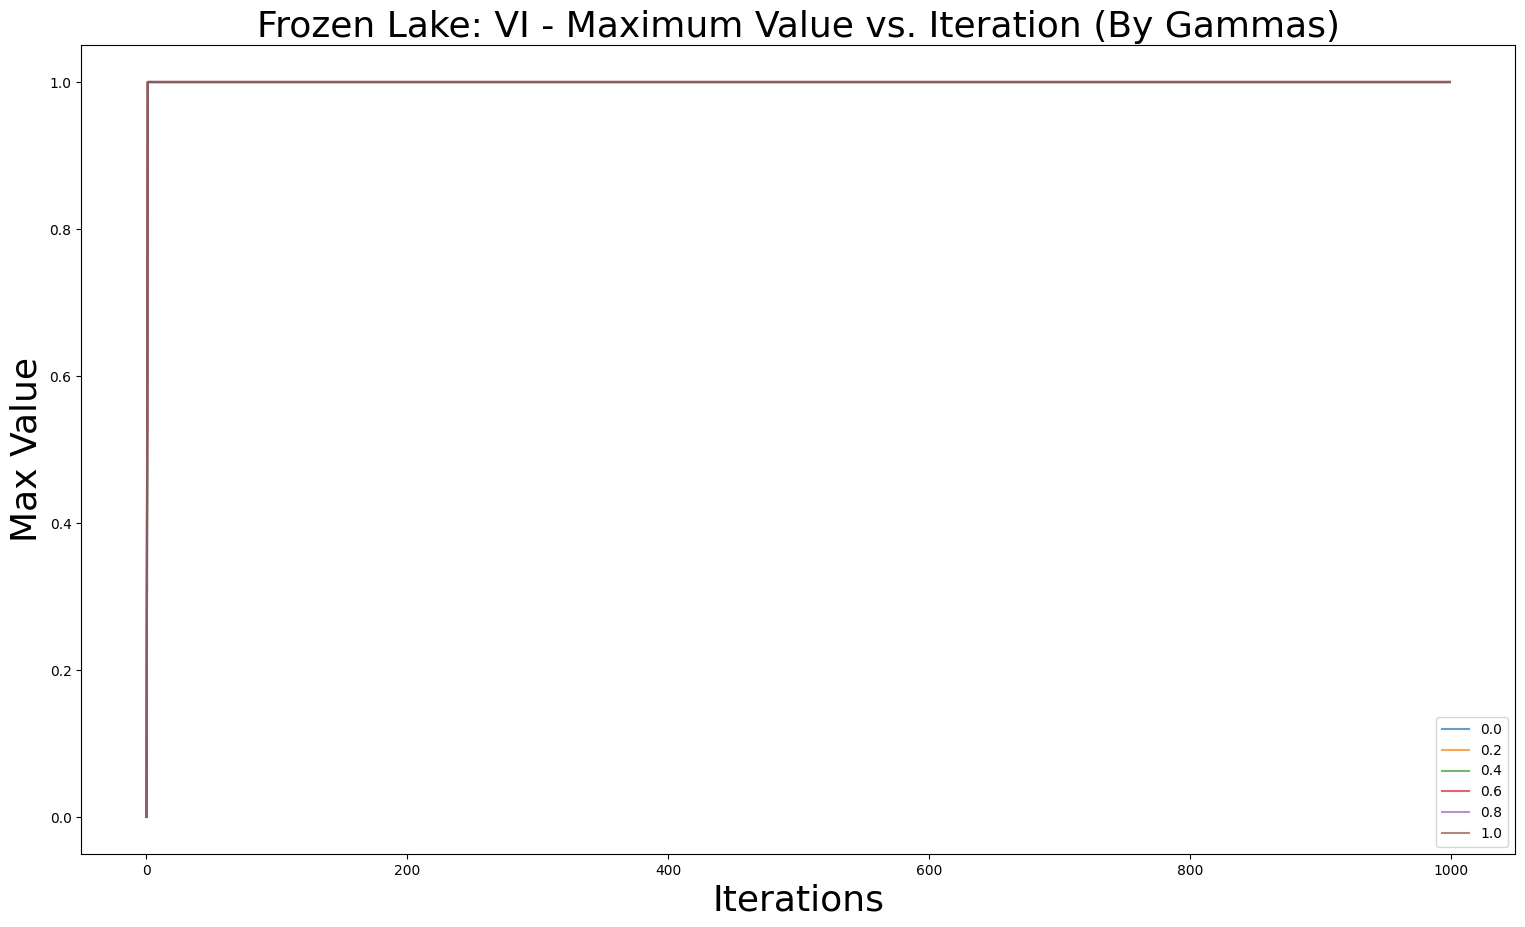

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(len(gammas)):
    max_value_per_iter = np.amax(V_tracks_by_gamma_vi[i], axis=1)  # max value per iteration
    max_value_per_iter_std = np.amax(V_tracks_std_by_gamma_vi[i], axis=1)    
    lower_std = np.array(max_value_per_iter) - np.array(max_value_per_iter_std)
    upper_std = np.array(max_value_per_iter) + np.array(max_value_per_iter_std)
    ax.plot(range(0,n_iters), max_value_per_iter, label=gammas[i], alpha=0.7)
    ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    # ax.set_xscale('log', base=10)
ax.set_title("Frozen Lake: VI - Maximum Value vs. Iteration (By Gammas)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Max Value', fontsize=26)
ax.legend(loc='lower right')
plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
lower_std = np.array(wall_clock_times_by_gamma_vi) - np.array(wall_clock_times_std_by_gamma_vi)
upper_std = np.array(wall_clock_times_by_gamma_vi) + np.array(wall_clock_times_std_by_gamma_vi)
ax.plot(gammas, wall_clock_times_by_gamma_vi, label="512x512", marker='o')
ax.fill_between(gammas, lower_std, upper_std, color='grey', alpha=0.2)
ax.set_title("Frozen Lake: VI - Wall Clock Time vs. Gamma (512x512)", fontsize=26)
ax.set_xlabel('Gammas', fontsize=26)
ax.set_ylabel('Wall Clock Time', fontsize=26)
ax.legend(loc='lower right')

plt.show()

# Value Iteration
## Frozen Lake stochastic & Gamma

In [89]:
wall_clock_times_by_stochastic_vi = []
wall_clock_times_std_by_stochastic_vi = []
Vs_by_stochastic_vi = []
Vs_std_by_stochastic_vi = []
V_tracks_by_stochastic_vi = []
V_tracks_std_by_stochastic_vi = []
pis_by_stochastic_vi = []
pis_std_by_stochastic_vi = []
convergence_indexes_by_stochastic_vi = []
stochastic = [True, False]
n_iters = 1000
size = 2**5
gamma=.90
for boolean in stochastic:
    inner_wall_clock_time = []
    inner_vs = []
    inner_v_tracks = []
    inner_pis = [] 
    inner_convergence_indexes = []
    for seed in seeds:    
        frozen_lake = gym.make('FrozenLake-v1', generate_random_map(size=size), is_slippery=boolean, render_mode=None)  # set the environment
        frozen_lake.reset(seed=seed)  # set the seed for testing
        start = time.time()
        V, V_track, pi, convergence_index = Planner(frozen_lake.env.P).value_iteration(gamma=gamma,n_iters=n_iters)  # value iteration learning
        end = time.time()
        running_time = end - start
        #print("runtime = %.5f seconds" % running_time)
        inner_wall_clock_time.append(running_time)
        inner_vs.append(V)
        inner_v_tracks.append(V_track)
        inner_pis.append(pi)       
        inner_convergence_indexes.append(convergence_index)
    wall_clock_times_by_stochastic_vi.append(np.mean(inner_wall_clock_time, axis=0))
    wall_clock_times_std_by_stochastic_vi.append(np.std(inner_wall_clock_time, axis=0))
    Vs_by_stochastic_vi.append(np.mean(inner_vs, axis=0))
    Vs_std_by_stochastic_vi.append(np.std(inner_vs, axis=0))
    V_tracks_by_stochastic_vi.append(np.mean(inner_v_tracks, axis=0))
    V_tracks_std_by_stochastic_vi.append(np.std(inner_v_tracks, axis=0))
    convergence_indexes_by_stochastic_vi.append(np.mean(inner_convergence_indexes, axis=0))
gamma=.1    
for boolean in stochastic:
    inner_wall_clock_time = []
    inner_vs = []
    inner_v_tracks = []
    inner_pis = []  
    inner_convergence_indexes = []
    for seed in seeds:      
        frozen_lake = gym.make('FrozenLake-v1', generate_random_map(size=size), is_slippery=boolean, render_mode=None)  # set the environment
        frozen_lake.reset(seed=42)  # set the seed for testing
        start = time.time()
        V, V_track, pi, convergence_index = Planner(frozen_lake.env.P).value_iteration(gamma=gamma,n_iters=n_iters)  # value iteration learning
        end = time.time()
        running_time = end - start
        #print("runtime = %.5f seconds" % running_time)
        inner_wall_clock_time.append(running_time)
        inner_vs.append(V)
        inner_v_tracks.append(V_track)
        inner_pis.append(pi)  
        inner_convergence_indexes.append(convergence_index)        
    wall_clock_times_by_stochastic_vi.append(np.mean(inner_wall_clock_time, axis=0))
    wall_clock_times_std_by_stochastic_vi.append(np.std(inner_wall_clock_time, axis=0))
    Vs_by_stochastic_vi.append(np.mean(inner_vs, axis=0))
    Vs_std_by_stochastic_vi.append(np.std(inner_vs, axis=0))
    V_tracks_by_stochastic_vi.append(np.mean(inner_v_tracks, axis=0))
    V_tracks_std_by_stochastic_vi.append(np.std(inner_v_tracks, axis=0))  
    convergence_indexes_by_stochastic_vi.append(np.mean(inner_convergence_indexes, axis=0))


runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds


# Value Iteration
## Max Value by gamma and stochasticity
### 32 x 32

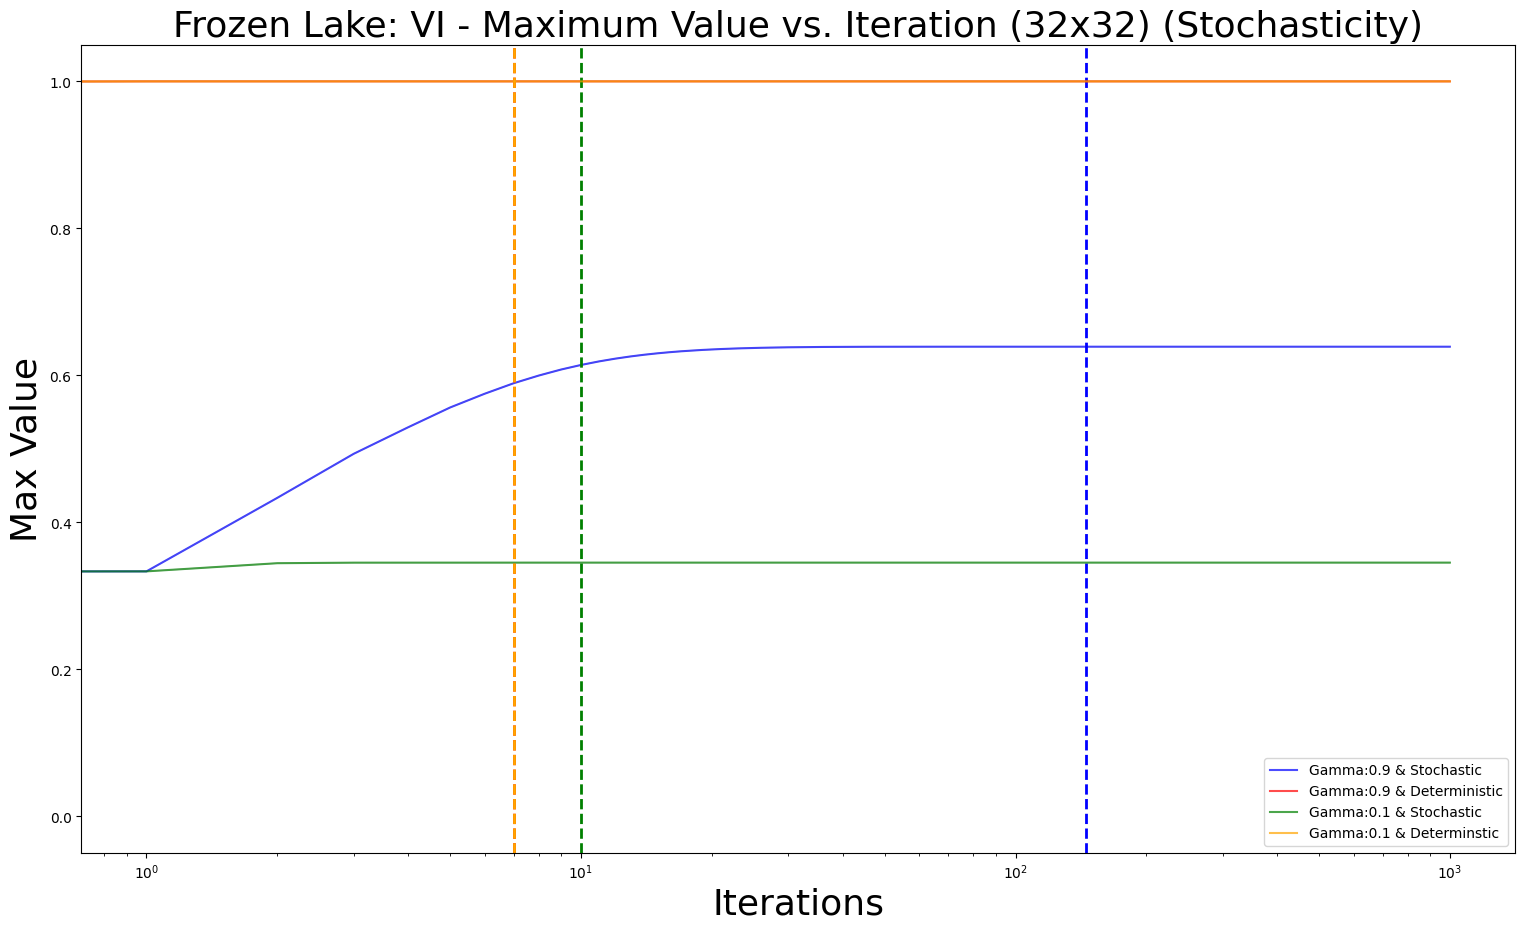

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
labels=['Gamma:0.9 & Stochastic', 'Gamma:0.9 & Deterministic', 'Gamma:0.1 & Stochastic', 'Gamma:0.1 & Determinstic']
# labels = ['Stochastic', 'Deterministic']
colors = ['blue', 'red', 'green', 'orange']
for i in range(4):
    max_value_per_iter = np.amax(V_tracks_by_stochastic_vi[i], axis=1)  # max value of all states per iteration
    max_value_std_per_iter = np.amax(V_tracks_std_by_stochastic_vi[i], axis=1)
    ax.plot(range(0,n_iters), max_value_per_iter, label=labels[i], alpha=0.7, color=colors[i])
    lower_std = np.array(max_value_per_iter) - np.array(max_value_std_per_iter)
    upper_std = np.array(max_value_per_iter) + np.array(max_value_std_per_iter)
    ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)   
    ax.axvline(x=convergence_indexes_by_stochastic_vi[i],color=colors[i], ls='--', lw=2)
    ax.set_xscale('log', base=10)
ax.set_title("Frozen Lake: VI - Maximum Value vs. Iteration (32x32) (Stochasticity)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Max Value', fontsize=26)
ax.legend(loc='lower right')
plt.show()

# Value Iteration
## Wall clock time by gamma and stochasticity

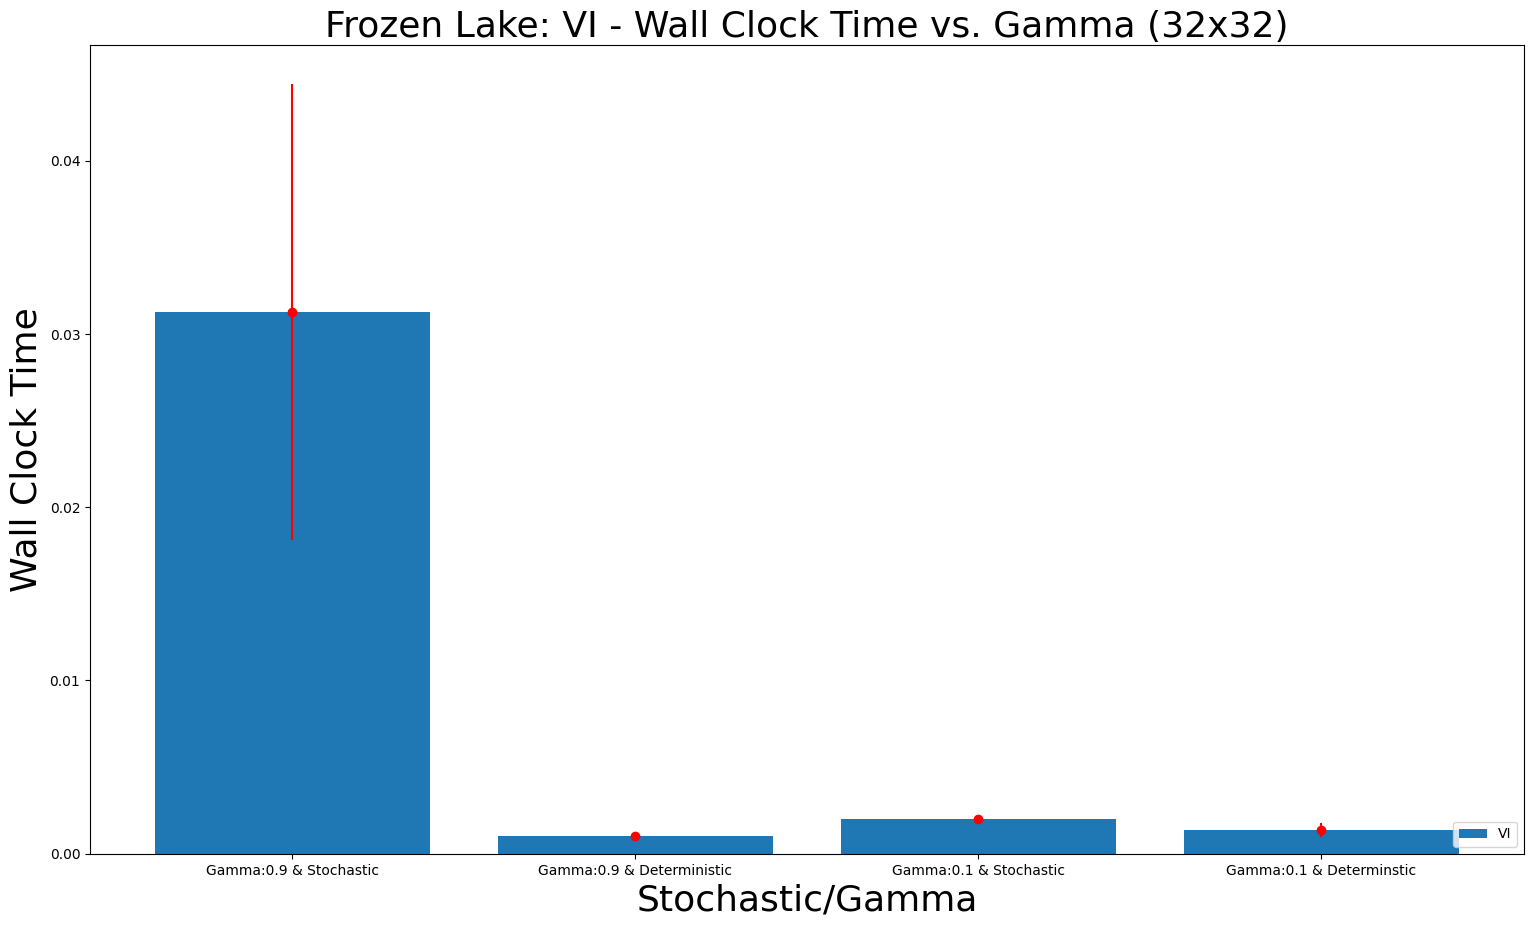

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
lower_std = np.array(wall_clock_times_by_stochastic_vi) - np.array(wall_clock_times_std_by_stochastic_vi)
upper_std = np.array(wall_clock_times_by_stochastic_vi) + np.array(wall_clock_times_std_by_stochastic_vi)
ax.bar(labels, wall_clock_times_by_stochastic_vi, label="VI")
ax.errorbar(labels, wall_clock_times_by_stochastic_vi,yerr = wall_clock_times_std_by_stochastic_vi,fmt ='o', color="r")
ax.set_title("Frozen Lake: VI - Wall Clock Time vs. Gamma (32x32)", fontsize=26)
ax.set_xlabel('Stochastic/Gamma', fontsize=26)
ax.set_ylabel('Wall Clock Time', fontsize=26)
ax.legend(loc='lower right')

plt.show()

In [223]:
# grid_shape = (size,size)

# actions_mapping = {3: '↑', 2: '→', 1: '↓', 0: '←'}

# # Create a matrix for plotting the policy
# policy_grid = np.empty(grid_shape, dtype='<U2')


# # Iterate through each state and assign the corresponding action from the policy
# for i in range(grid_shape[0]):
#     for j in range(grid_shape[1]):
#         observation_spot = i * grid_shape[0] + j  # the state by row * n_rows + col
#         action = pis_by_sizes[-1](observation_spot)  # optimal action for that state using the optimal pi with the largest size
#         policy_grid[i,j] = actions_mapping[action]  # add optimal action to policy grid
        
# fig, ax = plt.subplots()
# ax.matshow(array, cmap='Greens')
# ax.axis('off')
# for (i, j), z in np.ndenumerate(policy_grid):
#     ax.text(j, i, z, ha='center', va='center')
# ax.set_title('Optimal Policy')

In [246]:
frozen_lake.

Discrete(16)

In [186]:
test_scores = TestEnv.test_env(env=frozen_lake.env, render=True, user_input=False, pi=pi, n_iters=25)  # viz testing it
print(test_scores)  # print the total reward. 1 is we reach the goal.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## Policy Iteration

okay so there's parameters that we have to consider
1. gamma
2. number of iterations
3. theta

# Policy Iteration
## Frozen Lake by size 32 x 32
### No stochasticity
### Repeat 5x
### Set gamma to 0.9
### Set n_iterations to 10, 100, 1000

In [140]:
wall_clock_times_by_n_iters_pi = []
wall_clock_times_std_by_n_iters_pi = []
Vs_by_n_iters_pi = []
Vs_std_by_n_iters_pi = []
V_tracks_by_n_iters_pi = []
V_tracks_std_by_n_iters_pi = []
pis_by_n_iters_pi = []
pis_std_by_n_iters_pi = []
convergence_indexes_pi = []
gamma=.90
n_iters = [10, 100, 1000, 10000]
size = 32
seeds = [1,2,3,4,5]
for n_iter in n_iters:
    inner_wall_clock_time = []
    inner_vs = []
    inner_v_tracks = []
    inner_pis = []
    inner_convergence_index = []
    for seed in seeds:
        frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=size), is_slippery=True, render_mode=None)  # set the environment
        frozen_lake.reset(seed=seed)  # set the seed for testing
        start = time.time()
        V, V_track, pi, convergence_index = Planner(frozen_lake.env.P).policy_iteration(gamma=gamma,n_iters=n_iter)  # value iteration learning
        end = time.time()
        running_time = end - start
        #print("runtime = %.5f seconds" % running_time)
        inner_wall_clock_time.append(running_time)
        inner_vs.append(V)
        inner_v_tracks.append(V_track)
        inner_pis.append(pi)
        inner_convergence_index.append(convergence_index)
    wall_clock_times_by_n_iters_pi.append(np.mean(inner_wall_clock_time, axis=0))
    wall_clock_times_std_by_n_iters_pi.append(np.std(inner_wall_clock_time, axis=0))
    Vs_by_n_iters_pi.append(np.mean(inner_vs, axis=0))
    Vs_std_by_n_iters_pi.append(np.std(inner_vs, axis=0))
    V_tracks_by_n_iters_pi.append(np.mean(inner_v_tracks, axis=0))
    V_tracks_std_by_n_iters_pi.append(np.std(inner_v_tracks, axis=0))
    convergence_indexes_pi.append(np.mean(inner_convergence_index, axis=0))
#     pis_by_n_iters_pi.append(np.mean(inner_pis, axis=0))
#     pis_std_by_n_iters_pi.append(np.std(inner_pis, axis=0))

runtime = 1.46 seconds


/Users/thomascho/omscs/ML/Markov Decision Processes/bettermdptools/algorithms/planner.py:147: UserWarning: Max iterations reached before convergence.  Check n_iters.
  warnings.warn("Max iterations reached before convergence.  Check n_iters.")


runtime = 2.12 seconds
runtime = 2.08 seconds
runtime = 1.12 seconds
runtime = 1.52 seconds
runtime = 4.52 seconds
runtime = 1.29 seconds
runtime = 5.10 seconds
runtime = 1.50 seconds
runtime = 4.27 seconds
runtime = 1.32 seconds
runtime = 1.22 seconds
runtime = 4.07 seconds
runtime = 1.13 seconds
runtime = 3.40 seconds
runtime = 3.60 seconds
runtime = 1.55 seconds
runtime = 1.16 seconds
runtime = 3.64 seconds
runtime = 1.16 seconds


# Policy Iteration
## Max Value by n iters
### Convergence Plot

In [145]:
# n_iters = [10, 100, 1000, 10000]
# for i in range(len(n_iters)):
#     fig, ax = plt.subplots()
#     fig.set_size_inches(18.5, 10.5)
#     max_value_per_iter = np.amax(V_tracks_by_n_iters_pi[i], axis=1)  # max value of all states per iteration
#     max_value_std_per_iter = np.amax(V_tracks_by_n_iters_pi[i], axis=1)
#     ax.plot(range(len(max_value_per_iter)), max_value_per_iter, label=n_iters[i], alpha=0.7)
#     ax.axvline(x=convergence_indexes_pi[i], color='red', ls='--', lw=2)
#     lower_std = np.array(max_value_per_iter) - np.array(max_value_std_per_iter)
#     upper_std = np.array(max_value_per_iter) + np.array(max_value_std_per_iter)
# #     ax.fill_between(range(len(max_value_per_iter)), lower_std, upper_std, alpha=0.2)    
#     ax.set_xscale('log', base=10)
#     ax.set_ylim(0,1.1)
#     ax.set_title(f"Frozen Lake: PI - Maximum Value vs. Iteration (by {n_iters[i]})", fontsize=26)
#     ax.set_xlabel('Iterations', fontsize=26)
#     ax.set_ylabel('Max Value', fontsize=26)
#     ax.legend(loc='lower right')
#     plt.show()
    

# Policy Iteration
## Generalized
## Frozen Lake by size 2,4,8,16,32,64
### No stochasticity
### Repeat 5x
### Set gamma to 0.9
### Set n_iterations to 1k

In [146]:
wall_clock_times_by_sizes_pi = []
wall_clock_times_std_by_sizes_pi = []
Vs_by_sizes_pi = []
Vs_std_by_sizes_pi = []
V_tracks_by_sizes_pi = []
V_tracks_std_by_sizes_pi = []
pis_by_sizes_pi = []
pis_std_by_sizes_pi = []
convergence_indexes_by_sizes_pi = []
gamma=.90
n_iters = 1000
sizes = [ 2**j for j in range(2,7)]
seeds = [1,2,3,4,5]
for size in sizes:
    inner_wall_clock_time = []
    inner_vs = []
    inner_v_tracks = []
    inner_pis = []    
    inner_convergence_index = []
    for seed in seeds:
        frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=size), is_slippery=True, render_mode=None)  # set the environment
        frozen_lake.reset(seed=seed)  # set the seed for testing
        start = time.time()
        V, V_track, pi, convergence_index = Planner(frozen_lake.env.P).policy_iteration(gamma=gamma,n_iters=n_iters)  # value iteration learning
        end = time.time()
        running_time = end - start
        print("runtime = %.5f seconds" % running_time)
        inner_wall_clock_time.append(running_time)
        inner_vs.append(V)
        inner_v_tracks.append(V_track)
        inner_pis.append(pi)
        inner_convergence_index.append(convergence_index)
    wall_clock_times_by_sizes_pi.append(np.mean(inner_wall_clock_time, axis=0))
    wall_clock_times_std_by_sizes_pi.append(np.std(inner_wall_clock_time, axis=0))
    Vs_by_sizes_pi.append(np.mean(inner_vs, axis=0))
    Vs_std_by_sizes_pi.append(np.std(inner_vs, axis=0))
    V_tracks_by_sizes_pi.append(np.mean(inner_v_tracks, axis=0))
    V_tracks_std_by_sizes_pi.append(np.std(inner_v_tracks, axis=0))
    convergence_indexes_by_sizes_pi.append(np.mean(inner_convergence_index, axis=0))
#     pis_by_sizes_pi.append(np.mean(inner_pis, axis=0))
#     pis_std_by_sizes_pi.append(np.std(inner_pis, axis=0))

runtime = 0.02 seconds
runtime = 0.02803 seconds
runtime = 0.02 seconds
runtime = 0.02041 seconds
runtime = 0.02 seconds
runtime = 0.01777 seconds
runtime = 0.01 seconds
runtime = 0.01411 seconds
runtime = 0.02 seconds
runtime = 0.01524 seconds
runtime = 0.06 seconds
runtime = 0.05558 seconds
runtime = 0.05 seconds
runtime = 0.05481 seconds
runtime = 0.15 seconds
runtime = 0.14594 seconds
runtime = 0.12 seconds
runtime = 0.11618 seconds
runtime = 0.06 seconds
runtime = 0.06455 seconds
runtime = 0.39 seconds
runtime = 0.38678 seconds
runtime = 0.33 seconds
runtime = 0.32778 seconds
runtime = 0.92 seconds
runtime = 0.92435 seconds
runtime = 0.85 seconds
runtime = 0.85408 seconds
runtime = 0.23 seconds
runtime = 0.23045 seconds
runtime = 1.81 seconds
runtime = 1.80560 seconds
runtime = 1.51 seconds
runtime = 1.50624 seconds
runtime = 1.29 seconds
runtime = 1.29428 seconds
runtime = 1.27 seconds
runtime = 1.27480 seconds
runtime = 5.03 seconds
runtime = 5.03358 seconds
runtime = 18.11 seco

# Policy Iteration
## By Gamma

In [272]:
wall_clock_times_by_gamma_pi = []
Vs_by_gamma_pi = []
V_tracks_by_gamma_pi = []
pis_by_gamma_pi = []
gammas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
n_iters = 1000
size = 2**9
for gamma in gammas:
    frozen_lake = gym.make('FrozenLake-v1', generate_random_map(size=size), is_slippery=False, render_mode=None)  # set the environment
    frozen_lake.reset(seed=42)  # set the seed for testing
    start = time.time()
    V, V_track, pi = Planner(frozen_lake.env.P).policy_iteration(gamma=gamma,n_iters=n_iters)  # value iteration learning
    end = time.time()
    running_time = end - start
    print("runtime = %.5f seconds" % running_time)
    wall_clock_times_by_gamma_pi.append(running_time)
    Vs_by_gamma_pi.append(V)
    V_tracks_by_gamma_pi.append(V_track)
    pis_by_gamma_pi.append(pi)

runtime = 0.00 seconds
runtime = 0.00056 seconds
runtime = 0.00 seconds
runtime = 0.00106 seconds
runtime = 0.00 seconds
runtime = 0.00105 seconds
runtime = 0.00 seconds
runtime = 0.00089 seconds
runtime = 0.00 seconds
runtime = 0.00092 seconds
runtime = 0.00 seconds
runtime = 0.00111 seconds


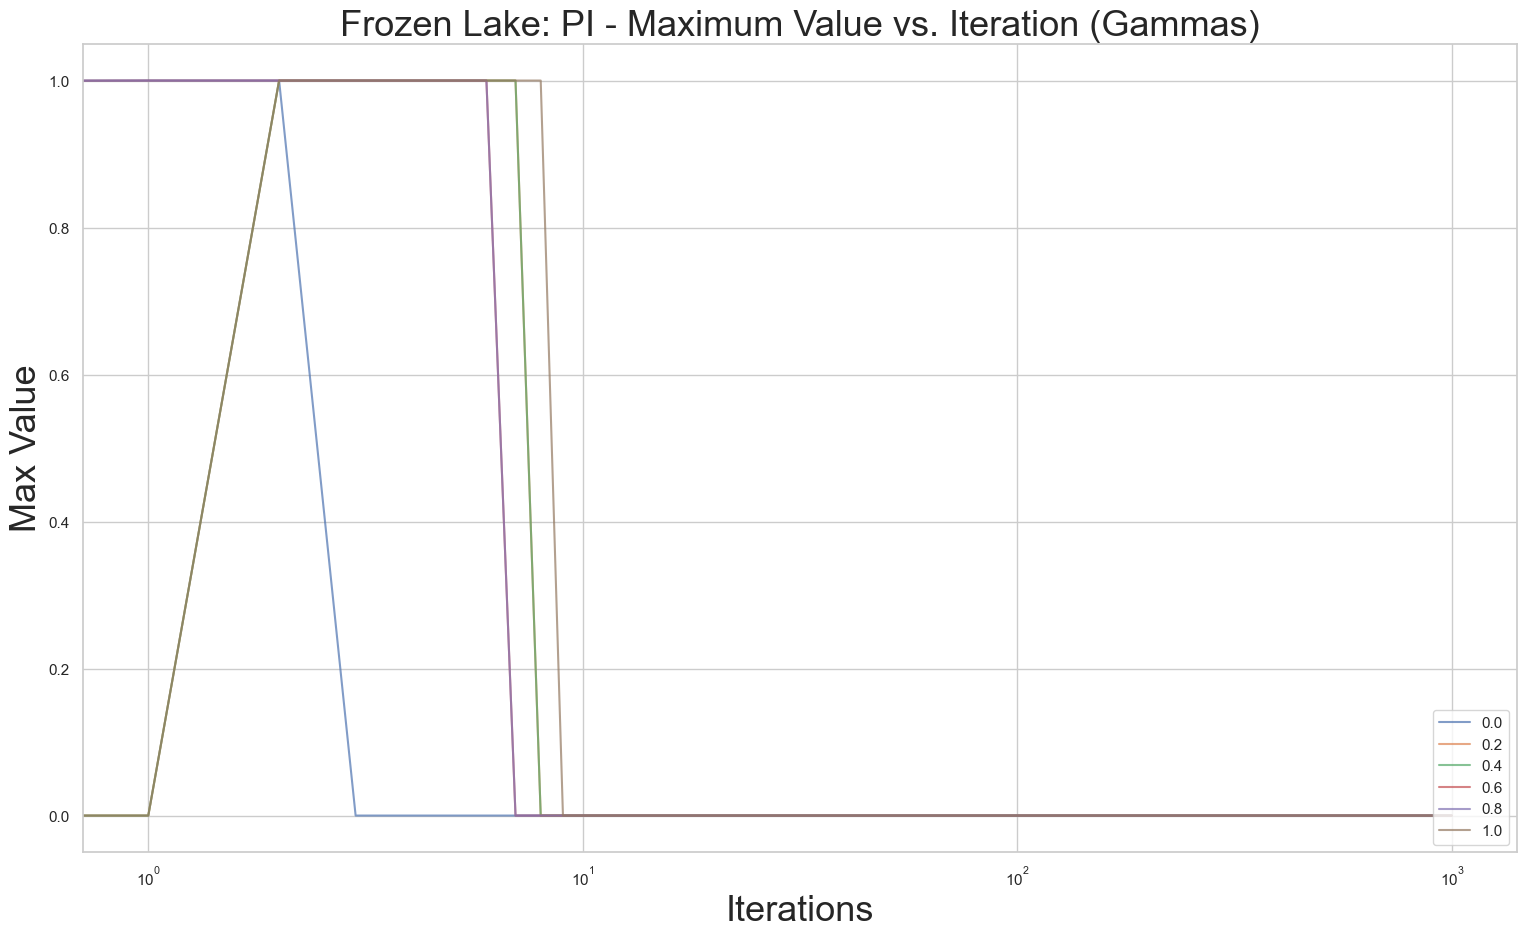

In [273]:
'''
Plot Max state values vs iterations AND PLOT DIFFERENT GAMMAS
'''
# Plot the policy grid
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(len(gammas)):
    max_value_per_iter = np.amax(V_tracks_by_gamma_pi[i], axis=1)  # max value per iteration
    ax.plot(range(0,n_iters), max_value_per_iter, label=gammas[i], alpha=0.7)
    ax.set_xscale('log', base=10)
ax.set_title("Frozen Lake: PI - Maximum Value vs. Iteration (Gammas)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Max Value', fontsize=26)
ax.legend(loc='lower right')
plt.show()

# Policy Iteration
## Frozen Lake stochastic & Gamma

In [99]:
wall_clock_times_by_stochastic_pi = []
wall_clock_times_std_by_stochastic_pi = []
Vs_by_stochastic_pi = []
Vs_std_by_stochastic_pi = []
V_tracks_by_stochastic_pi = []
V_tracks_std_by_stochastic_pi = []
pis_by_stochastic_pi = []
pis_std_by_stochastic_pi = []
convergence_indexes_by_stochastic_pi = []
stochastic = [True, False]
n_iters = 1000
size = 2**5
gamma=.90
for boolean in stochastic:
    inner_wall_clock_time = []
    inner_vs = []
    inner_v_tracks = []
    inner_pis = [] 
    inner_convergence_indexes = []
    for seed in seeds:    
        frozen_lake = gym.make('FrozenLake-v1', generate_random_map(size=size), is_slippery=boolean, render_mode=None)  # set the environment
        frozen_lake.reset(seed=seed)  # set the seed for testing
        start = time.time()
        V, V_track, pi, convergence_index = Planner(frozen_lake.env.P).policy_iteration(gamma=gamma,n_iters=n_iters)  # value iteration learning
        end = time.time()
        running_time = end - start
        #print("runtime = %.5f seconds" % running_time)
        inner_wall_clock_time.append(running_time)
        inner_vs.append(V)
        inner_v_tracks.append(V_track)
        inner_pis.append(pi)       
        inner_convergence_indexes.append(convergence_index)
    wall_clock_times_by_stochastic_pi.append(np.mean(inner_wall_clock_time, axis=0))
    wall_clock_times_std_by_stochastic_pi.append(np.std(inner_wall_clock_time, axis=0))
    Vs_by_stochastic_pi.append(np.mean(inner_vs, axis=0))
    Vs_std_by_stochastic_pi.append(np.std(inner_vs, axis=0))
    V_tracks_by_stochastic_pi.append(np.mean(inner_v_tracks, axis=0))
    V_tracks_std_by_stochastic_pi.append(np.std(inner_v_tracks, axis=0))
    convergence_indexes_by_stochastic_pi.append(np.mean(inner_convergence_indexes, axis=0))
gamma=.1    
for boolean in stochastic:
    inner_wall_clock_time = []
    inner_vs = []
    inner_v_tracks = []
    inner_pis = []  
    inner_convergence_indexes = []
    for seed in seeds:      
        frozen_lake = gym.make('FrozenLake-v1', generate_random_map(size=size), is_slippery=boolean, render_mode=None)  # set the environment
        frozen_lake.reset(seed=42)  # set the seed for testing
        start = time.time()
        V, V_track, pi, convergence_index = Planner(frozen_lake.env.P).policy_iteration(gamma=gamma,n_iters=n_iters)  # value iteration learning
        end = time.time()
        running_time = end - start
        #print("runtime = %.5f seconds" % running_time)
        inner_wall_clock_time.append(running_time)
        inner_vs.append(V)
        inner_v_tracks.append(V_track)
        inner_pis.append(pi)  
        inner_convergence_indexes.append(convergence_index)        
    wall_clock_times_by_stochastic_pi.append(np.mean(inner_wall_clock_time, axis=0))
    wall_clock_times_std_by_stochastic_pi.append(np.std(inner_wall_clock_time, axis=0))
    Vs_by_stochastic_pi.append(np.mean(inner_vs, axis=0))
    Vs_std_by_stochastic_pi.append(np.std(inner_vs, axis=0))
    V_tracks_by_stochastic_pi.append(np.mean(inner_v_tracks, axis=0))
    V_tracks_std_by_stochastic_pi.append(np.std(inner_v_tracks, axis=0))  
    convergence_indexes_by_stochastic_pi.append(np.mean(inner_convergence_indexes, axis=0))

runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds


# Policy Iteration
## Max Value by gamma and stochasticity
### 32 x 32

In [ ]:

# Q-learning
Q, V, pi, Q_track, pi_track = RL(frozen_lake.env).q_learning()

In [ ]:
test_scores = TestEnv.test_env(env=frozen_lake.env, render=True, user_input=False, pi=pi)

In [26]:
def plot_policy(env, policy):
    # Define the actions mapping (↑, →, ↓, ←)
    actions_mapping = {3: '↑', 2: '→', 1: '↓', 0: '←'}

    # Get the shape of the Frozen Lake grid
    grid_shape = env.desc.shape

    # Create a matrix for plotting the policy
    policy_grid = np.empty(grid_shape, dtype='<U2')

    # Iterate through each state and assign the corresponding action from the policy
    for i in range(grid_shape[0]):
        for j in range(grid_shape[1]):
            state = env.encode(i, j)
            action = policy[state]
            policy_grid[i, j] = actions_mapping[action]

    # Plot the policy grid
    plt.figure(figsize=(18.5, 10.5))
    for i in range(grid_shape[0]):
        for j in range(grid_shape[1]):
            plt.text(j, grid_shape[0] - 1 - i, policy_grid[i, j], ha='center', va='center', fontsize=15)
    plt.xticks([])
    plt.yticks([])
    plt.title('Optimal Policy')
    plt.grid(True)
    plt.show()

NameError: name 'array' is not defined

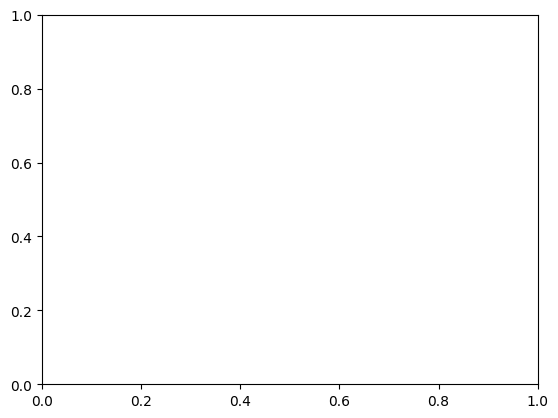

In [39]:
grid_shape = (32,32)

actions_mapping = {3: '↑', 2: '→', 1: '↓', 0: '←'}

# Create a matrix for plotting the policy
policy_grid = np.empty(grid_shape, dtype='<U2')

# Iterate through each state and assign the corresponding action from the policy
for i in range(grid_shape[0]):
    for j in range(grid_shape[1]):
        observation_spot = i * grid_shape[0] + j
        action = pi[observation_spot]
        policy_grid[i,j] = actions_mapping[action]

policy_grid

fig, ax = plt.subplots()
ax.matshow(array, cmap='Greens')
ax.axis('off')
for (i, j), z in np.ndenumerate(policy_grid):
    ax.text(j, i, z, ha='center', va='center')
ax.set_title('Optimal Policy')

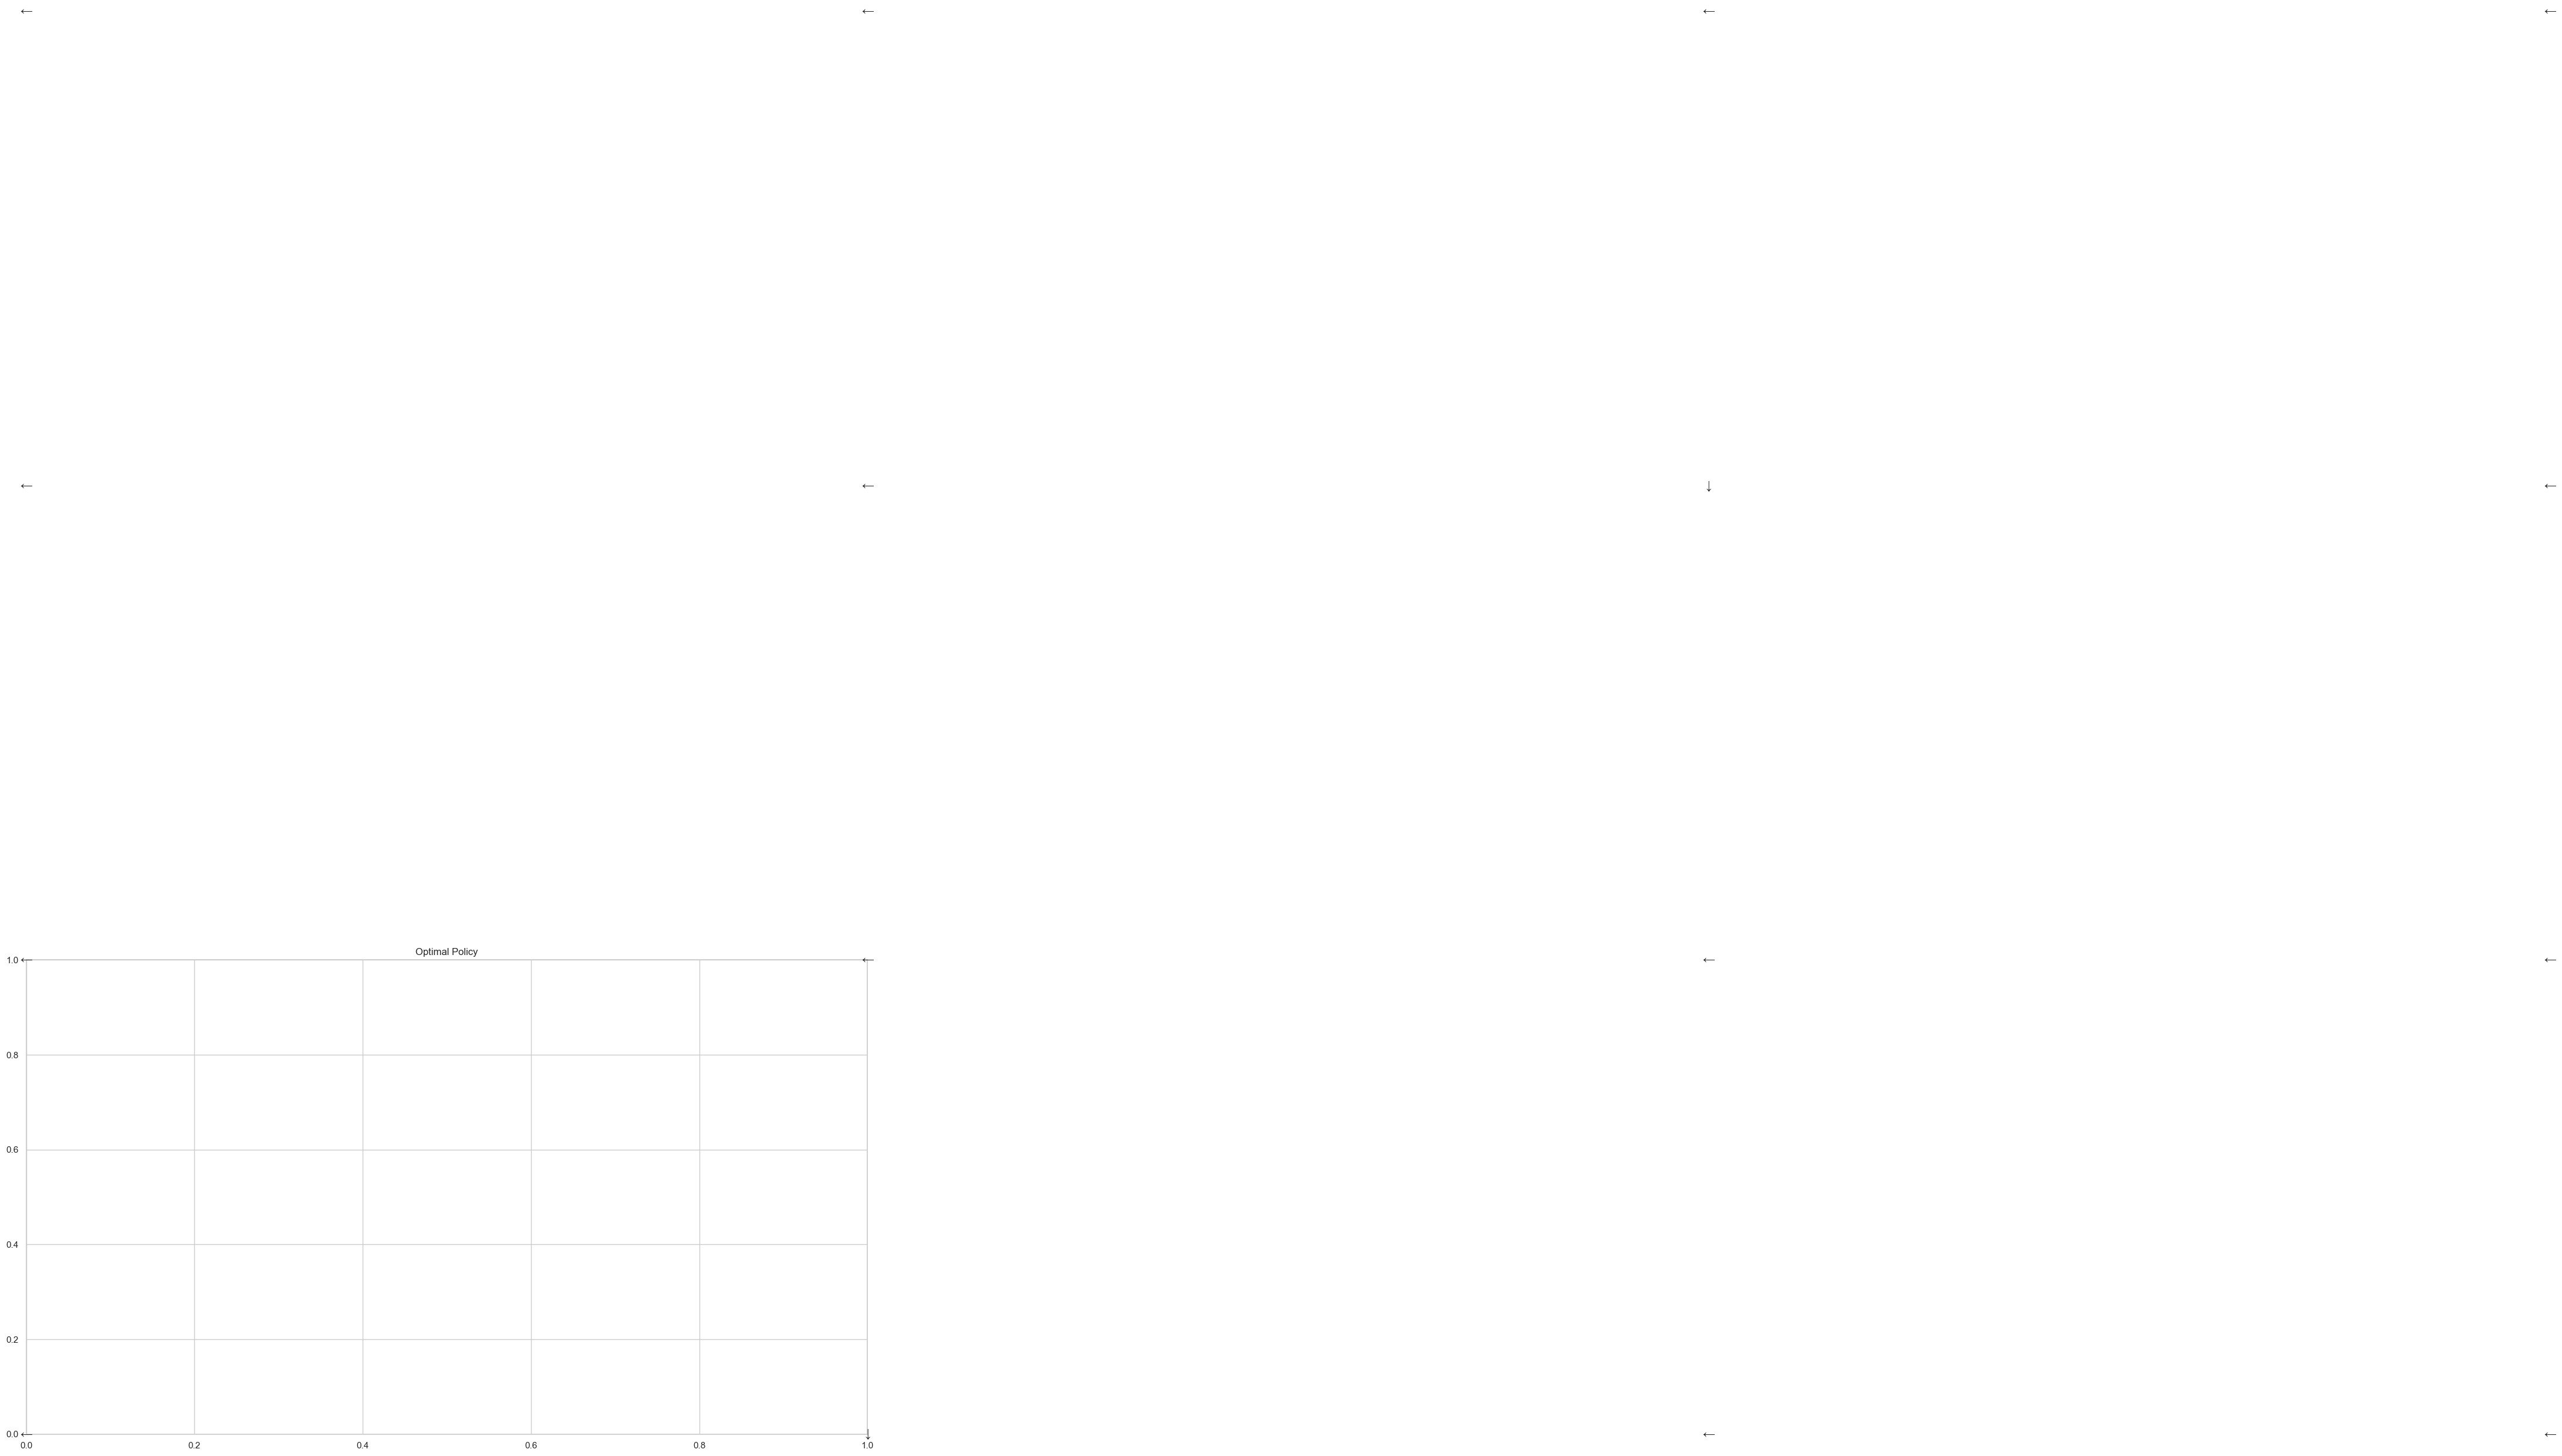

In [96]:
# Plot the policy grid
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(grid_shape[0]):
    for j in range(grid_shape[1]):
        ax.text(j, grid_shape[0] - 1 - i, policy_grid[i, j], ha='center', va='center', fontsize=15)
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_title('Optimal Policy')
# plt.grid(True)
plt.show()

In [ ]:
# Iterate through each state and assign the corresponding action from the policy
for i in range(grid_shape[0]):
    for j in range(grid_shape[1]):
        state = env.encode(i, j)
        action = policy[state]
        policy_grid[i, j] = actions_mapping[action]

In [ ]:
plot_policy(frozen_lake, )

In [17]:
convergence_indexes_pi

[0.0, 62.6, 62.2, 62.8]

# Plots for both VI and PI

# Value Iteration
## Policy

runtime = 1.60 seconds


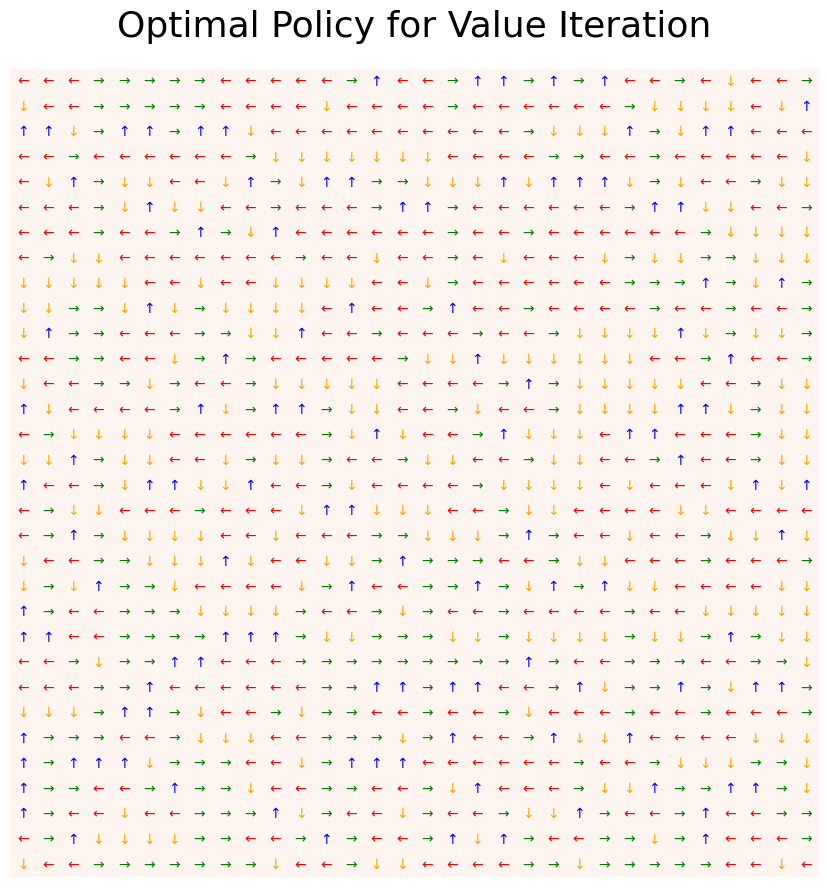

In [199]:
size = 32
gamma = 0.9
n_iter = 1000
seed=2
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=size), is_slippery=True, render_mode=None)  # set the environment
frozen_lake.reset(seed=seed)  # set the seed for testing
start = time.time()
V, V_track, pi, convergence_index = Planner(frozen_lake.env.P).value_iteration(gamma=gamma,n_iters=n_iter)  # value iteration learning
end = time.time()
running_time = end - start

grid_shape = (32,32)

actions_mapping = {3: '↑', 2: '→', 1: '↓', 0: '←'}
colors_mapping = {'↑': 'blue', '→':'green',  '↓':'orange', '←':'red'}

# Create a matrix for plotting the policy
policy_grid = np.zeros(grid_shape, dtype='<U2')

# Iterate through each state and assign the corresponding action from the policy
for i in range(grid_shape[0]):
    for j in range(grid_shape[1]):
        observation_spot = i * grid_shape[0] + j
        action = pi[observation_spot]
        policy_grid[i,j] = actions_mapping[action]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
cm = plt.cm.Reds
cm.set_under('white')
ax.matshow(np.zeros(grid_shape), cmap=cm)
ax.axis('off')
for (i, j), z in np.ndenumerate(policy_grid):
    ax.text(j, i, z, ha='center', va='center', color=colors_mapping[z])
ax.set_title('Optimal Policy for Value Iteration', fontsize=26)
fig.set_facecolor("white")
plt.savefig(f"/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_vl_policy.png", bbox_inches='tight')
plt.show()


# Policy Iteration
## Policy

In [200]:
size = 32
gamma = 0.9
n_iter = 100
seed=2
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=size), is_slippery=True, render_mode=None)  # set the environment
frozen_lake.reset(seed=seed)  # set the seed for testing
start = time.time()
V, V_track, pi, convergence_index = Planner(frozen_lake.env.P).policy_iteration(gamma=gamma,n_iters=n_iter)  # value iteration learning
end = time.time()
running_time = end - start

grid_shape = (32,32)

actions_mapping = {3: '↑', 2: '→', 1: '↓', 0: '←'}
colors_mapping = {'↑': 'blue', '→':'green',  '↓':'orange', '←':'red'}

# Create a matrix for plotting the policy
policy_grid = np.zeros(grid_shape, dtype='<U2')

# Iterate through each state and assign the corresponding action from the policy
for i in range(grid_shape[0]):
    for j in range(grid_shape[1]):
        observation_spot = i * grid_shape[0] + j
        action = pi[observation_spot]
        policy_grid[i,j] = actions_mapping[action]



runtime = 1.46 seconds


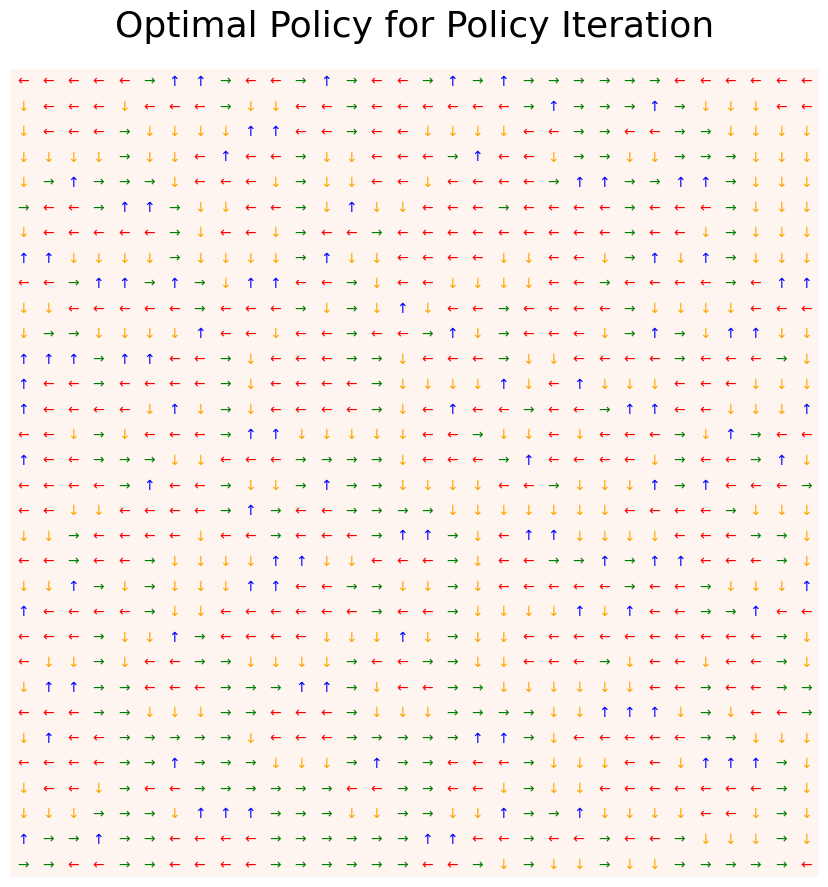

In [201]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
cm = plt.cm.Reds
cm.set_under('white')
ax.matshow(np.zeros(grid_shape), cmap=cm)
ax.axis('off')
for (i, j), z in np.ndenumerate(policy_grid):
    ax.text(j, i, z, ha='center', va='center', color=colors_mapping[z])
ax.set_title('Optimal Policy for Policy Iteration', fontsize=26)
fig.set_facecolor("white")
plt.savefig(f"/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_pl_policy.png", bbox_inches='tight')
plt.show()


## Max Value per iteration by N_iterations

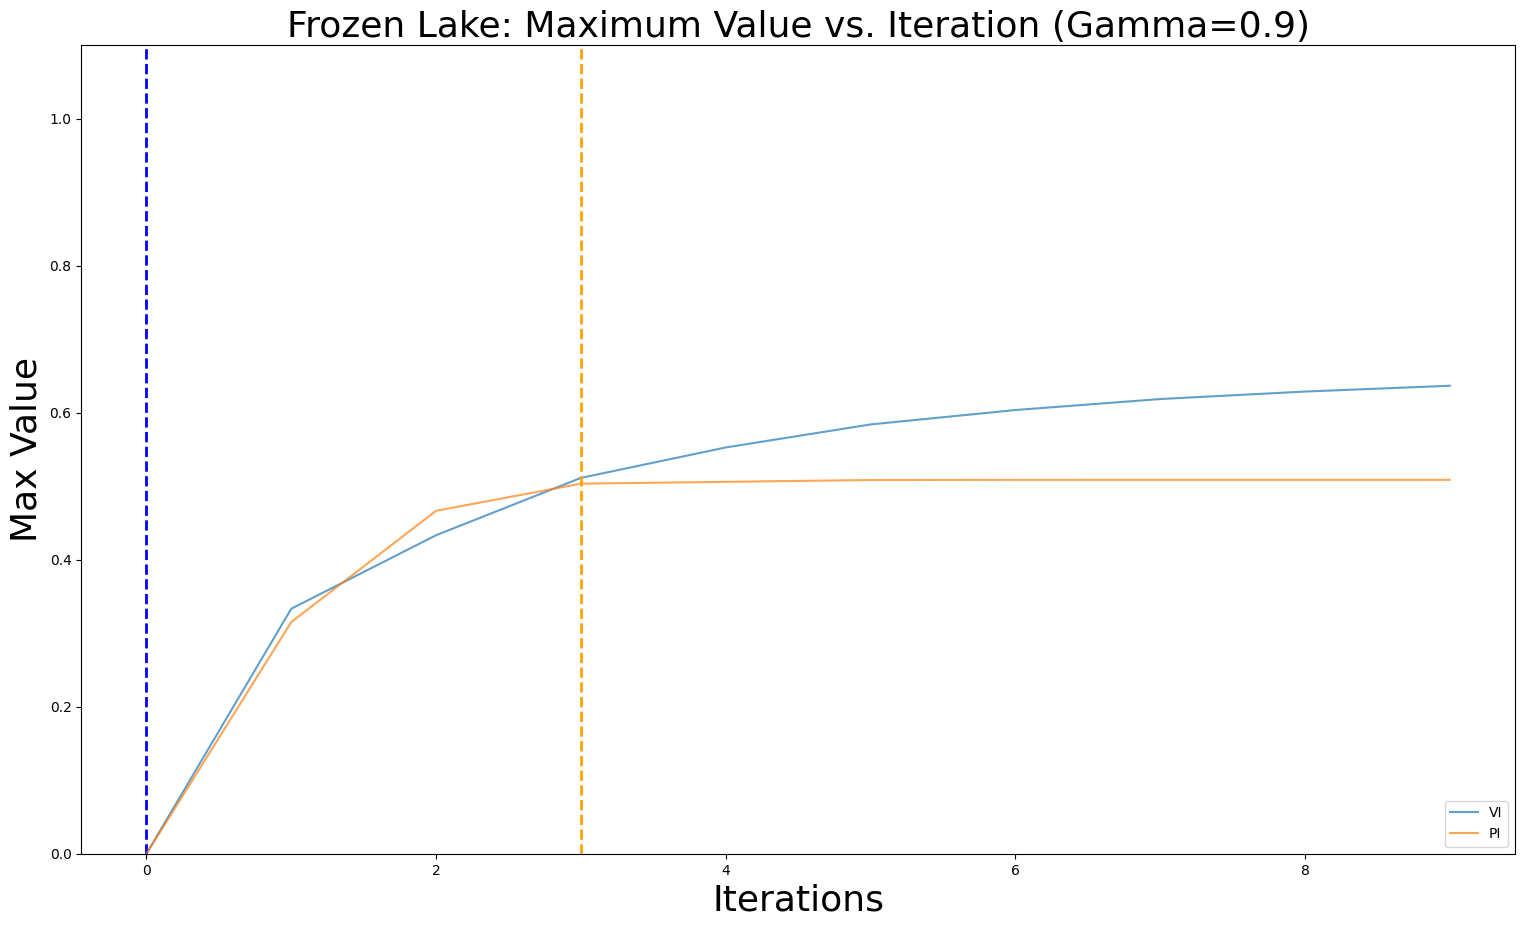

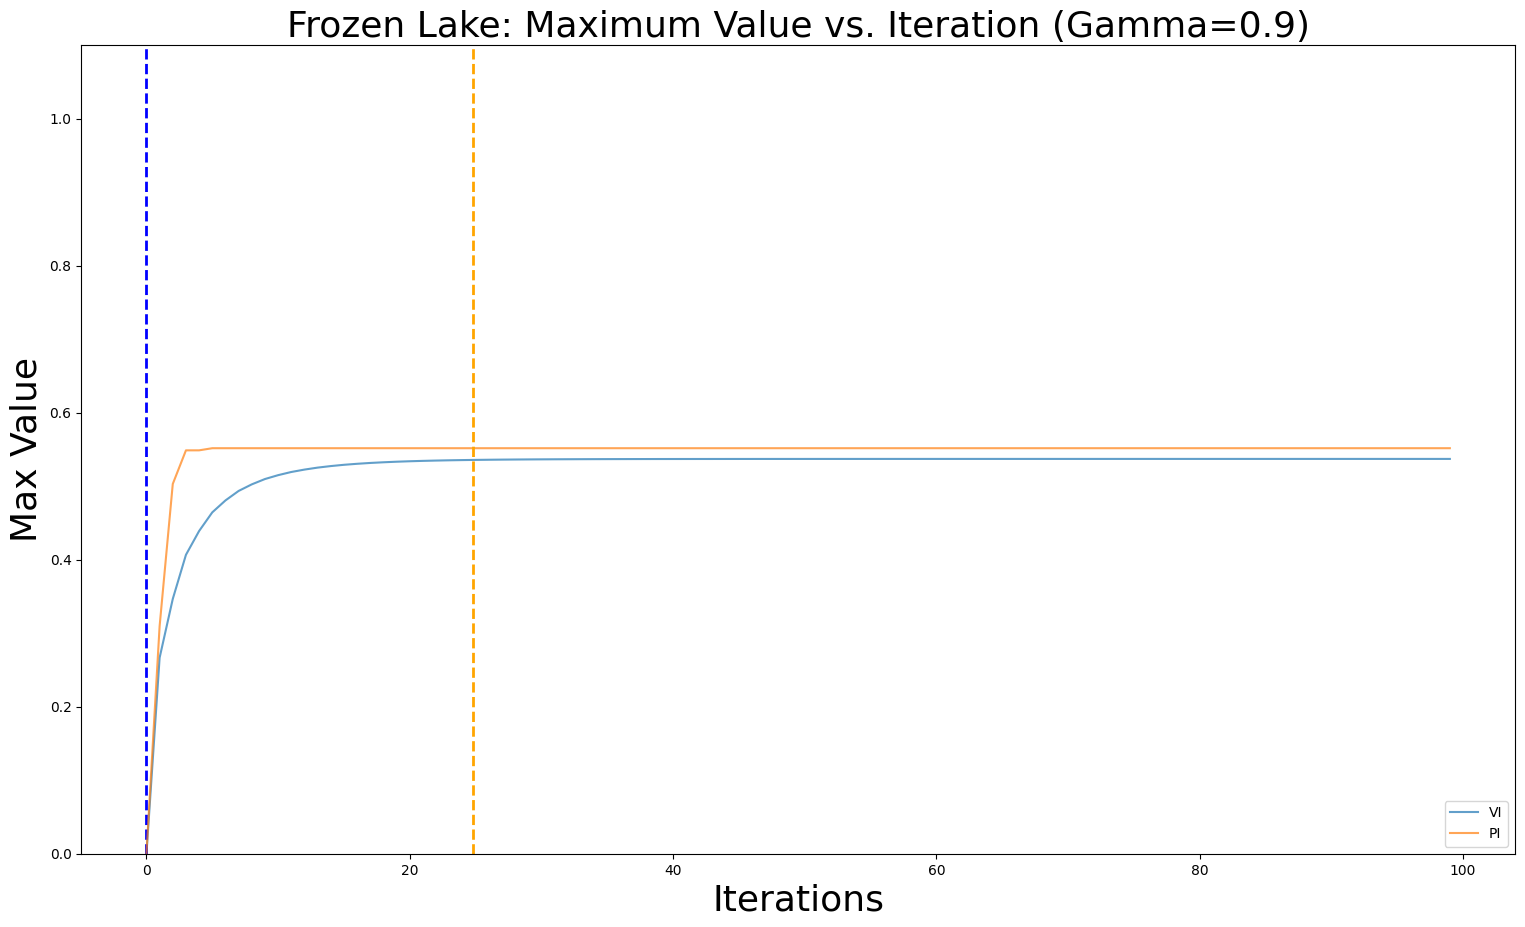

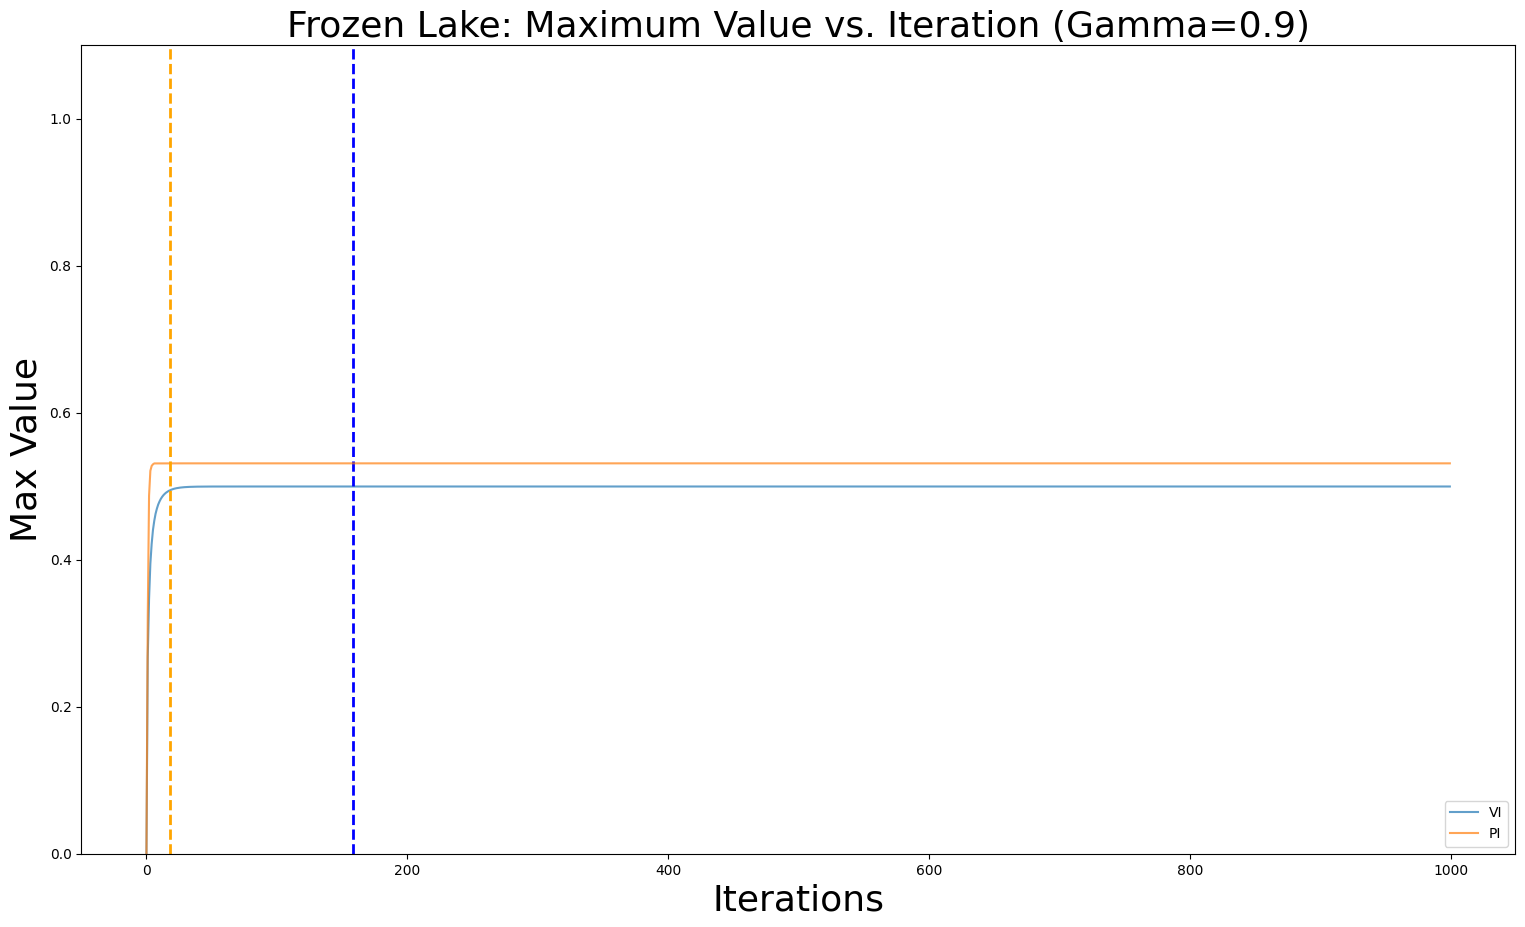

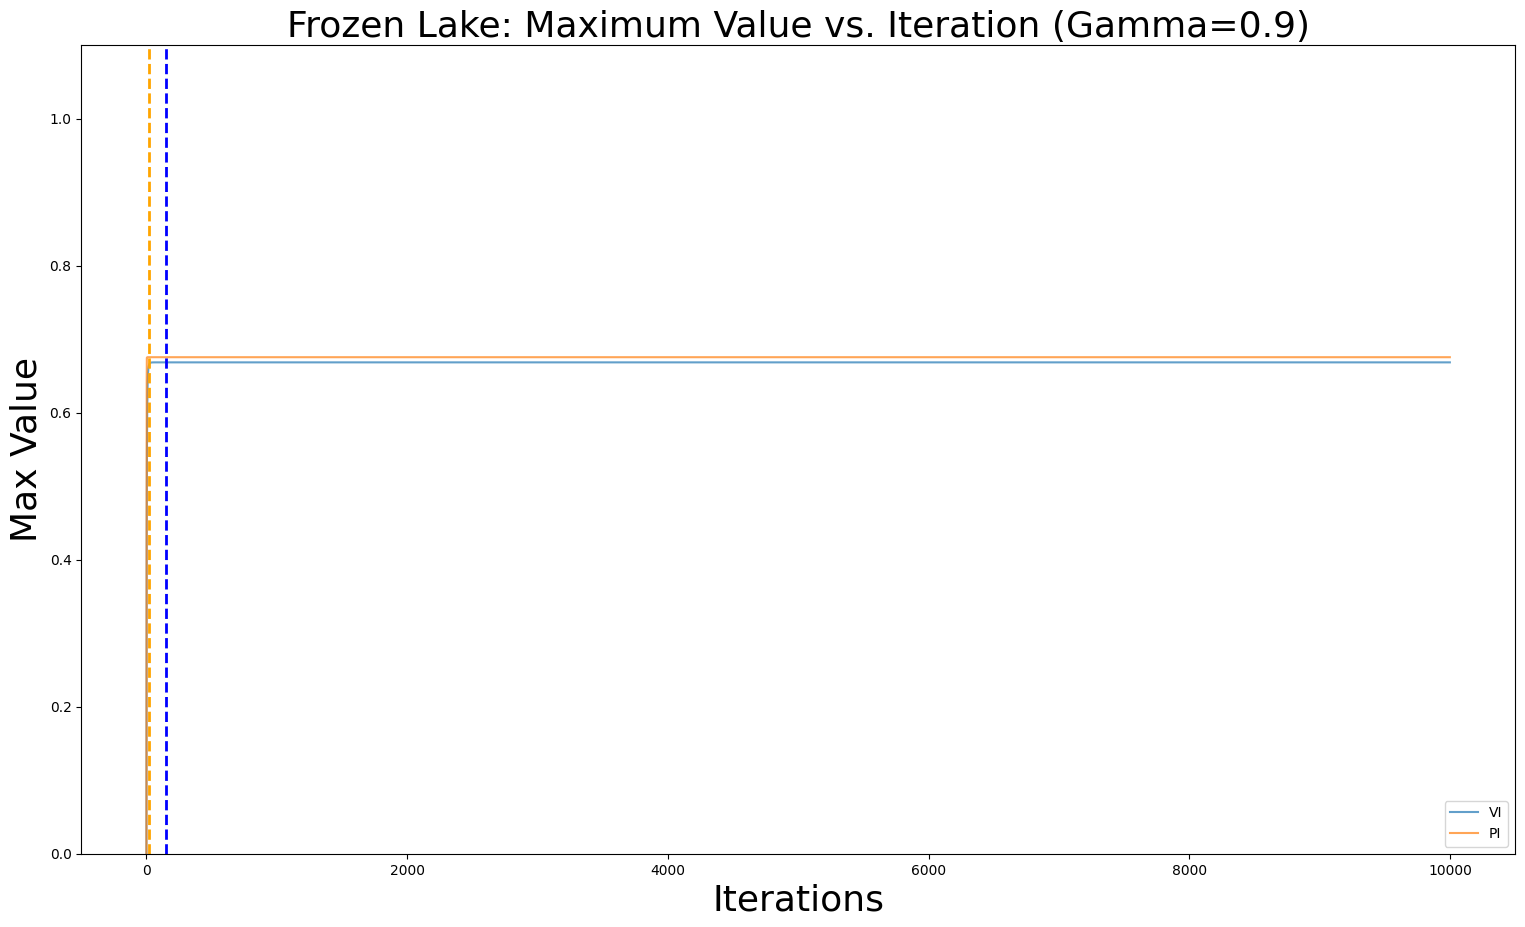

In [141]:
for i in range(len(n_iters)):
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    max_value_per_iter = np.amax(V_tracks_by_n_iters_vi[i], axis=1)  # max value of all states per iteration
    max_value_std_per_iter = np.amax(V_tracks_by_n_iters_vi[i], axis=1)
    ax.plot(range(len(max_value_per_iter)), max_value_per_iter, label="VI", alpha=0.7)
    ax.axvline(x=convergence_indexes_vi[i], color='blue', ls='--', lw=2)
    lower_std = np.array(max_value_per_iter) - np.array(max_value_std_per_iter)
    upper_std = np.array(max_value_per_iter) + np.array(max_value_std_per_iter)
#     ax.fill_between(range(len(max_value_per_iter)), lower_std, upper_std, alpha=0.2)   

    max_value_per_iter = np.amax(V_tracks_by_n_iters_pi[i], axis=1)  # max value of all states per iteration
    max_value_std_per_iter = np.amax(V_tracks_by_n_iters_pi[i], axis=1)
    ax.plot(range(len(max_value_per_iter)), max_value_per_iter, label="PI", alpha=0.7)
    ax.axvline(x=convergence_indexes_pi[i], color='orange', ls='--', lw=2)
    lower_std = np.array(max_value_per_iter) - np.array(max_value_std_per_iter)
    upper_std = np.array(max_value_per_iter) + np.array(max_value_std_per_iter)
#     ax.set_xscale('log', base=10)
    ax.set_ylim(0,1.1)
    ax.set_title(f"Frozen Lake: Maximum Value vs. Iteration (Gamma=0.9)", fontsize=26)
    ax.set_xlabel('Iterations', fontsize=26)
    ax.set_ylabel('Max Value', fontsize=26)
    ax.legend(loc='lower right')
    plt.savefig(f"/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_vl_pl_convergence_slippery_{n_iters[i]}.png")
    plt.show()

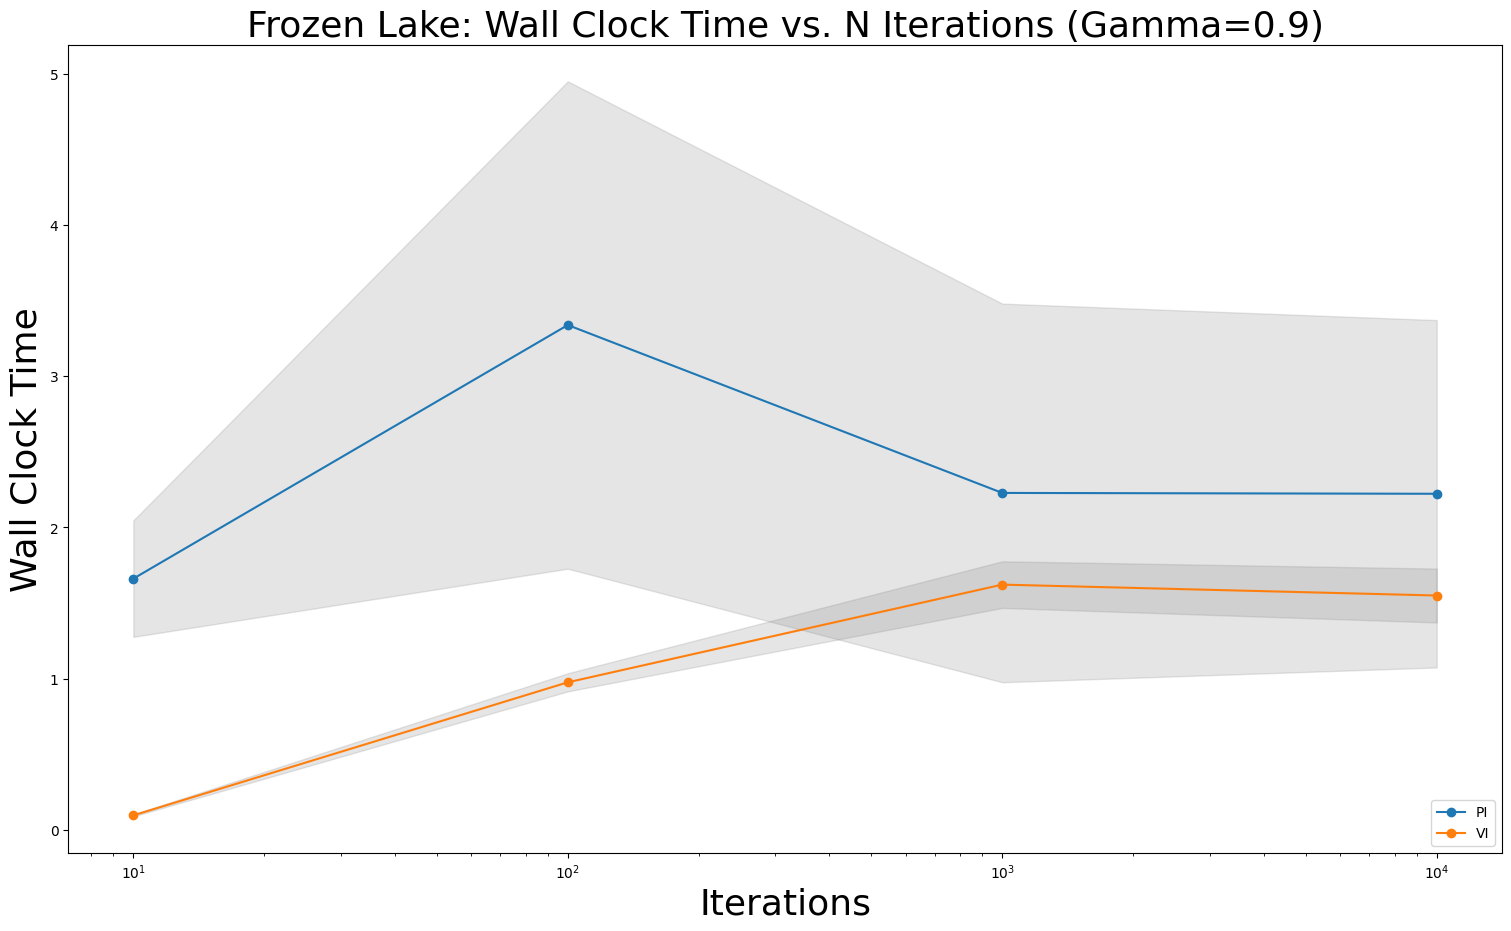

In [143]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
n_iters = [10, 100, 1000, 10000]
lower_std = np.array(wall_clock_times_by_n_iters_pi) - np.array(wall_clock_times_std_by_n_iters_pi)
upper_std = np.array(wall_clock_times_by_n_iters_pi) + np.array(wall_clock_times_std_by_n_iters_pi)
ax.plot(n_iters, wall_clock_times_by_n_iters_pi, label="PI", marker='o')
ax.fill_between(n_iters, lower_std, upper_std, color='grey', alpha=0.2)

lower_std = np.array(wall_clock_times_by_n_iters_vi) - np.array(wall_clock_times_std_by_n_iters_vi)
upper_std = np.array(wall_clock_times_by_n_iters_vi) + np.array(wall_clock_times_std_by_n_iters_vi)
ax.plot(n_iters, wall_clock_times_by_n_iters_vi, label="VI", marker='o')
ax.fill_between(n_iters, lower_std, upper_std, color='grey', alpha=0.2)


ax.set_title("Frozen Lake: Wall Clock Time vs. N Iterations (Gamma=0.9)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Wall Clock Time', fontsize=26)
ax.legend(loc='lower right')
ax.set_xscale('log', base=10)
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_vl_pl_time_n_iters.png")
plt.show()

# Generalized

# State size

In [151]:
print(convergence_indexes_by_sizes_pi)
print(convergence_indexes_by_sizes_vi)

[4.6, 5.8, 10.6, 13.0, 46.2]
[110.8, 153.4, 157.4, 148.2, 156.4]


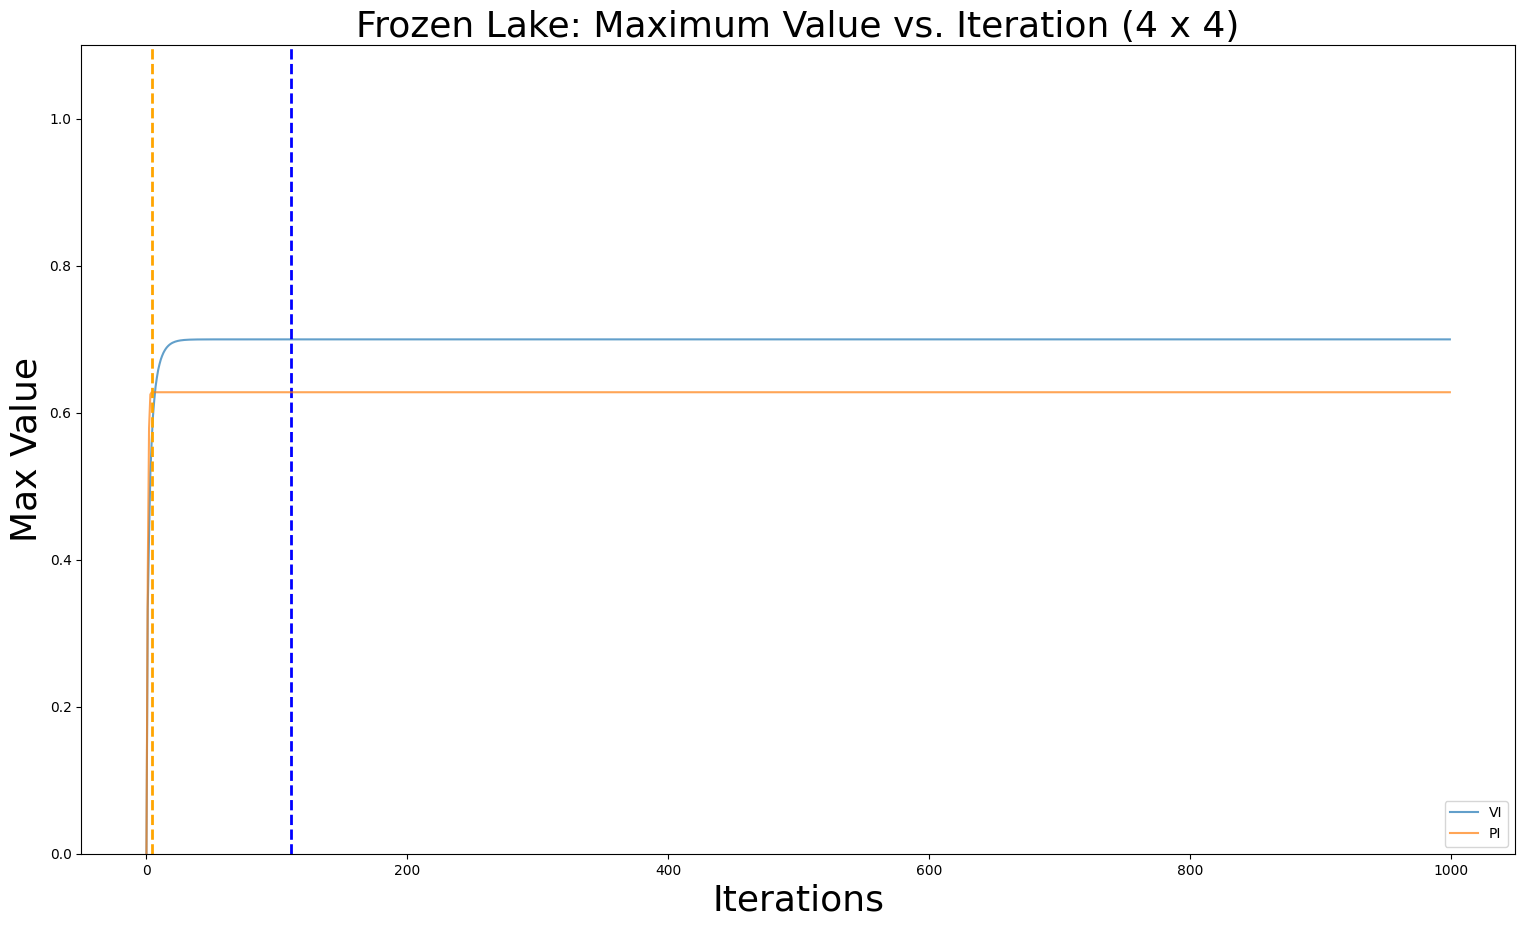

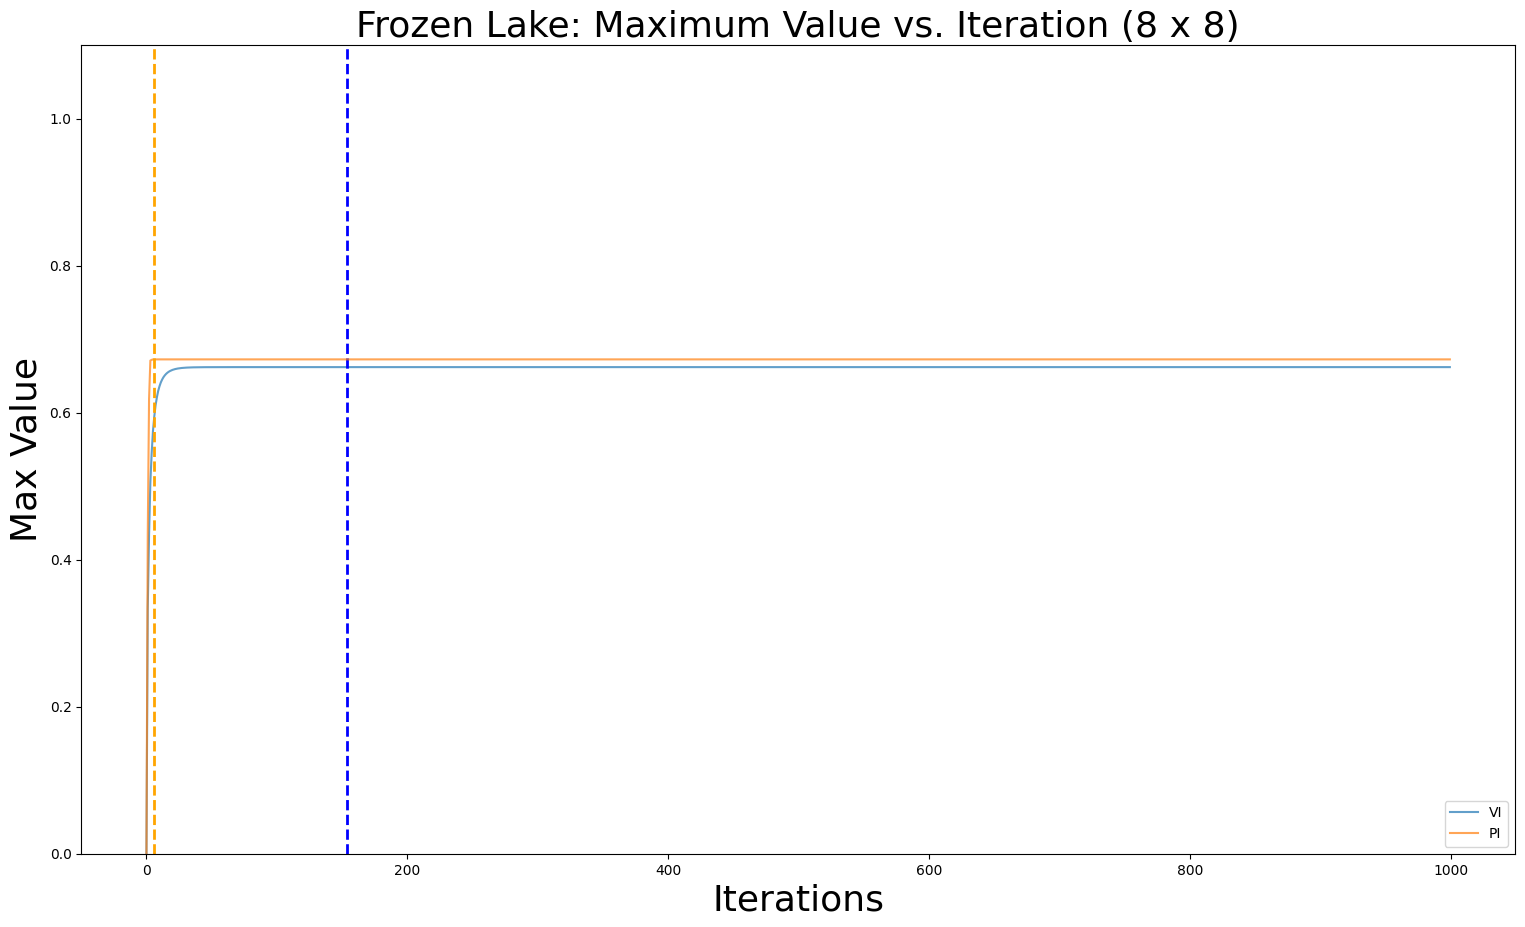

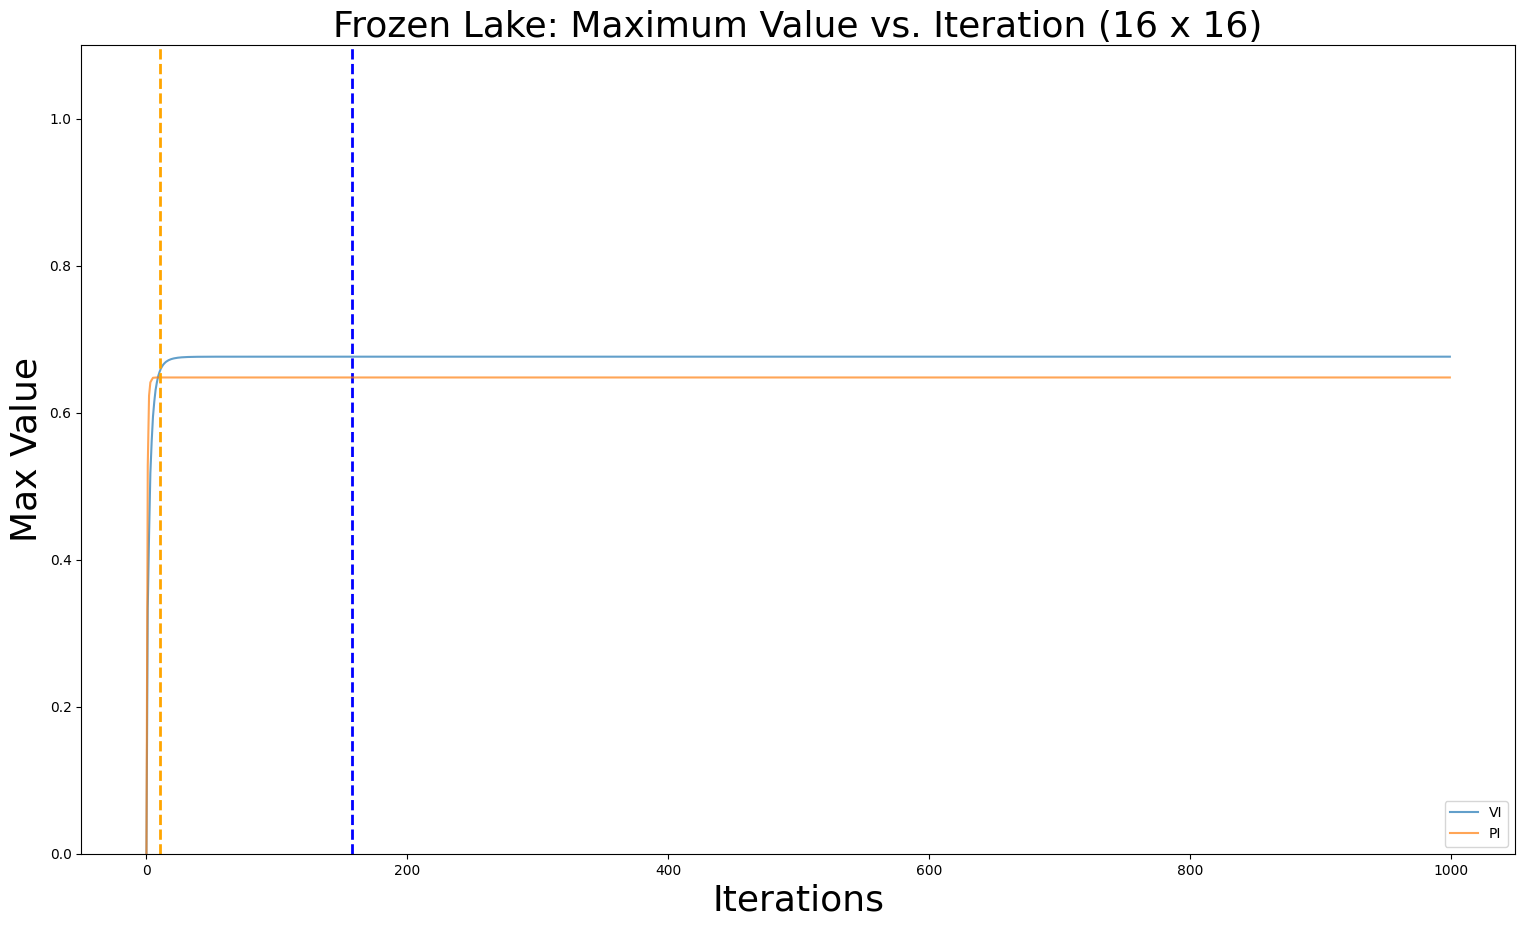

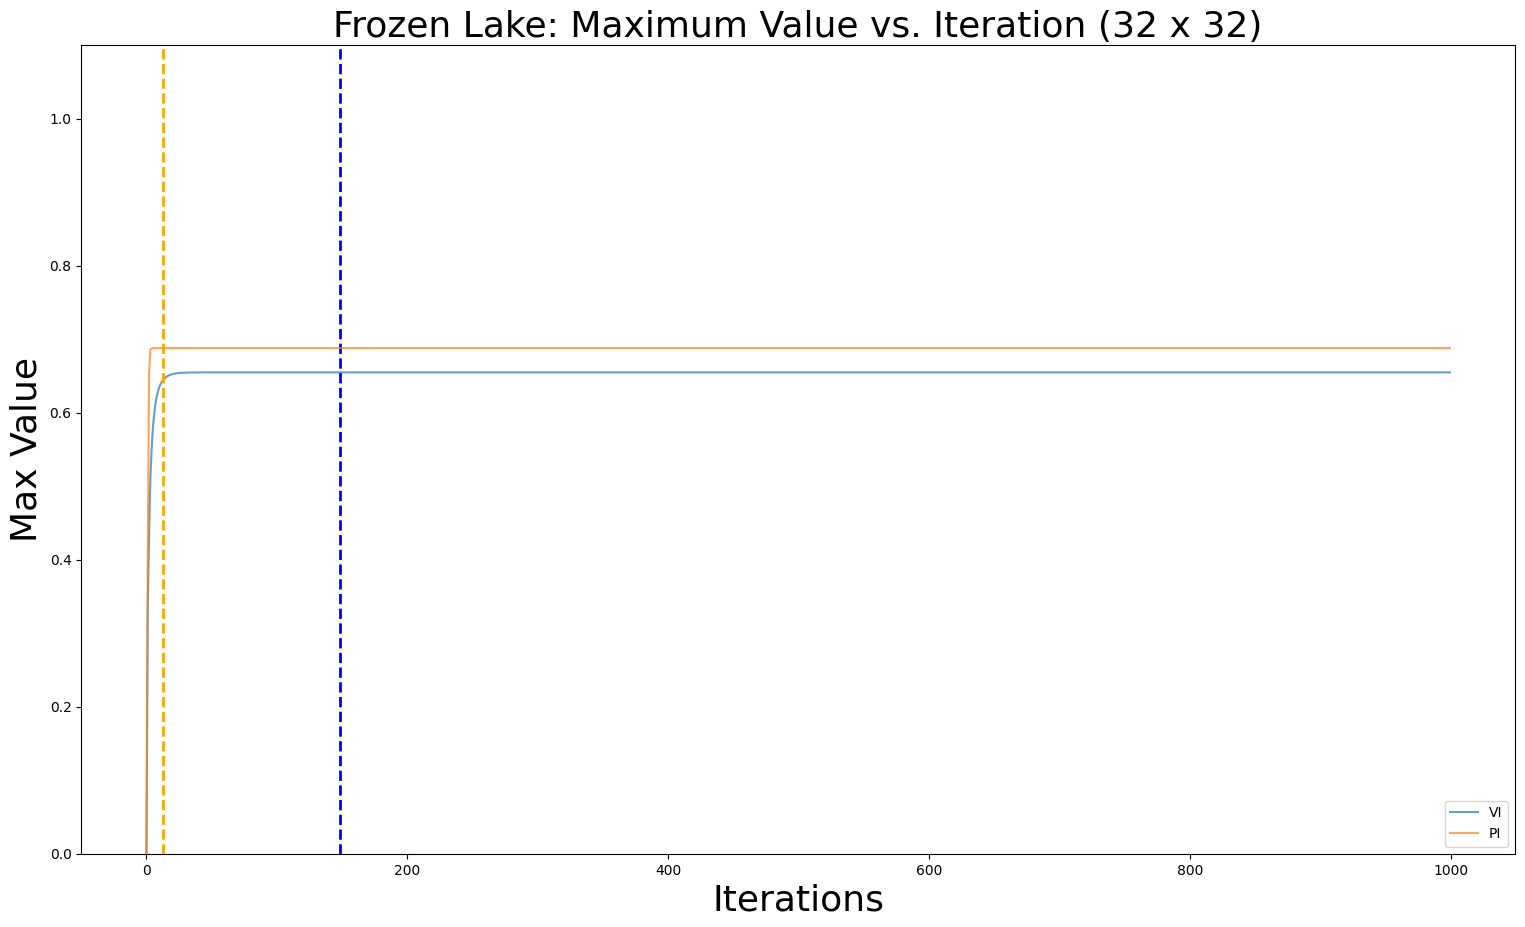

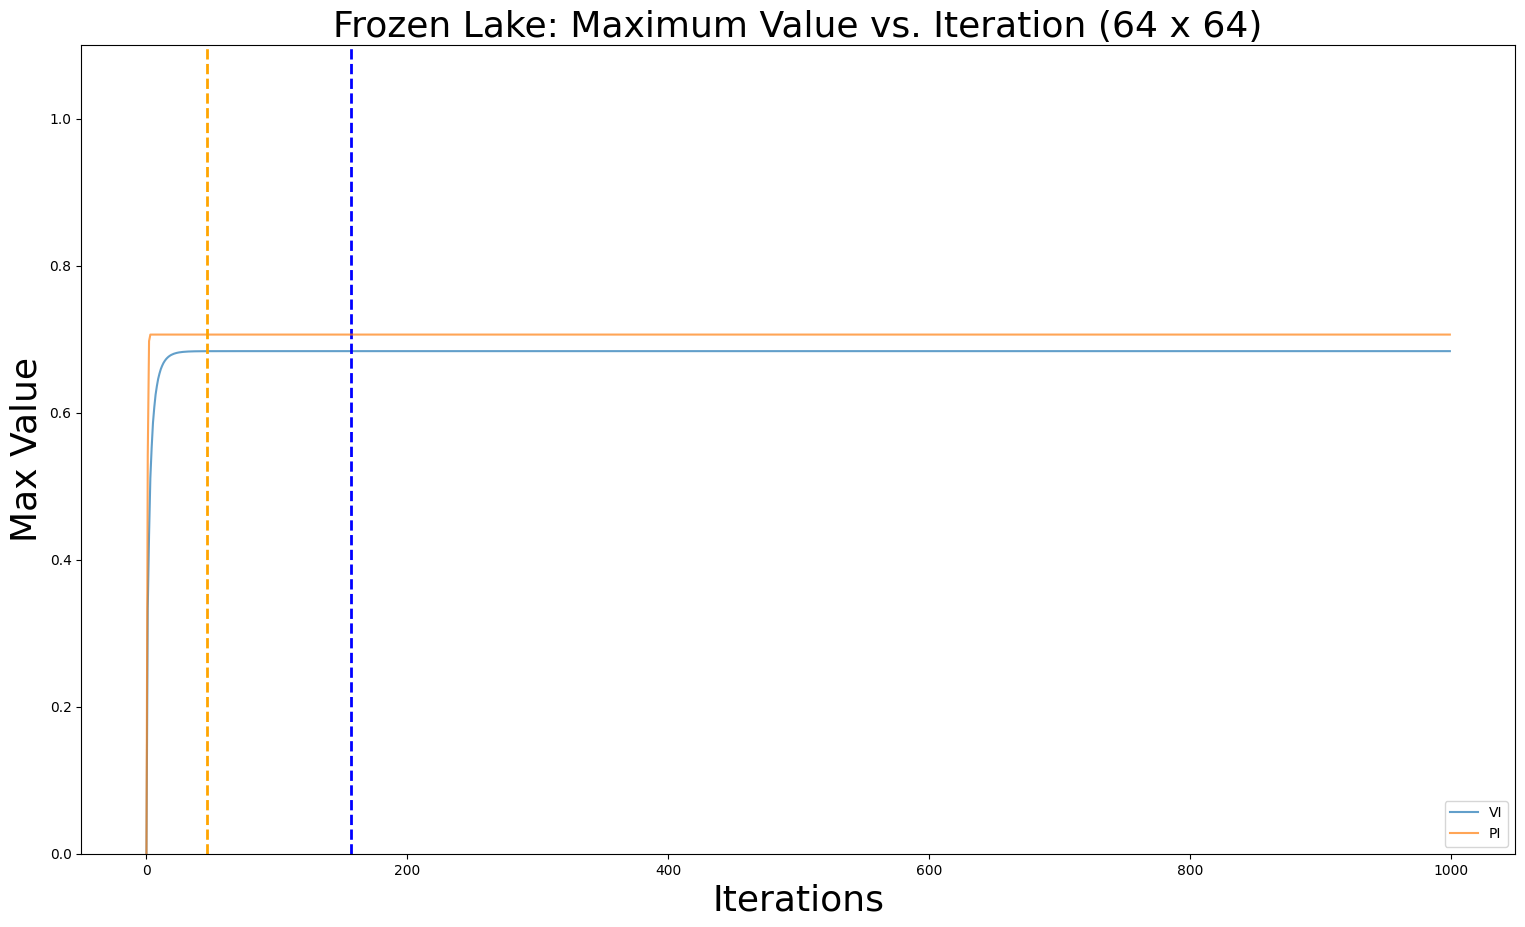

In [147]:
for i in range(len(sizes)):
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    max_value_per_iter = np.amax(V_tracks_by_sizes_vi[i], axis=1)  # max value of all states per iteration
    max_value_std_per_iter = np.amax(V_tracks_by_sizes_vi[i], axis=1)
    ax.plot(range(len(max_value_per_iter)), max_value_per_iter, label="VI", alpha=0.7)
    ax.axvline(x=convergence_indexes_by_sizes_vi[i], color='blue', ls='--', lw=2)
    lower_std = np.array(max_value_per_iter) - np.array(max_value_std_per_iter)
    upper_std = np.array(max_value_per_iter) + np.array(max_value_std_per_iter)
#     ax.fill_between(range(len(max_value_per_iter)), lower_std, upper_std, alpha=0.2)   

    max_value_per_iter = np.amax(V_tracks_by_sizes_pi[i], axis=1)  # max value of all states per iteration
    max_value_std_per_iter = np.amax(V_tracks_by_sizes_pi[i], axis=1)
    ax.plot(range(len(max_value_per_iter)), max_value_per_iter, label="PI", alpha=0.7)
    ax.axvline(x=convergence_indexes_by_sizes_pi[i], color='orange', ls='--', lw=2)
    lower_std = np.array(max_value_per_iter) - np.array(max_value_std_per_iter)
    upper_std = np.array(max_value_per_iter) + np.array(max_value_std_per_iter)
#     ax.set_xscale('log', base=10)
    ax.set_ylim(0,1.1)
    ax.set_title(f"Frozen Lake: Maximum Value vs. Iteration ({sizes[i]} x {sizes[i]})", fontsize=26)
    ax.set_xlabel('Iterations', fontsize=26)
    ax.set_ylabel('Max Value', fontsize=26)
    ax.legend(loc='lower right')
    plt.savefig(f"/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_vl_pl_convergence_{sizes[i]}.png")
    plt.show()

## Wall Clock time for size

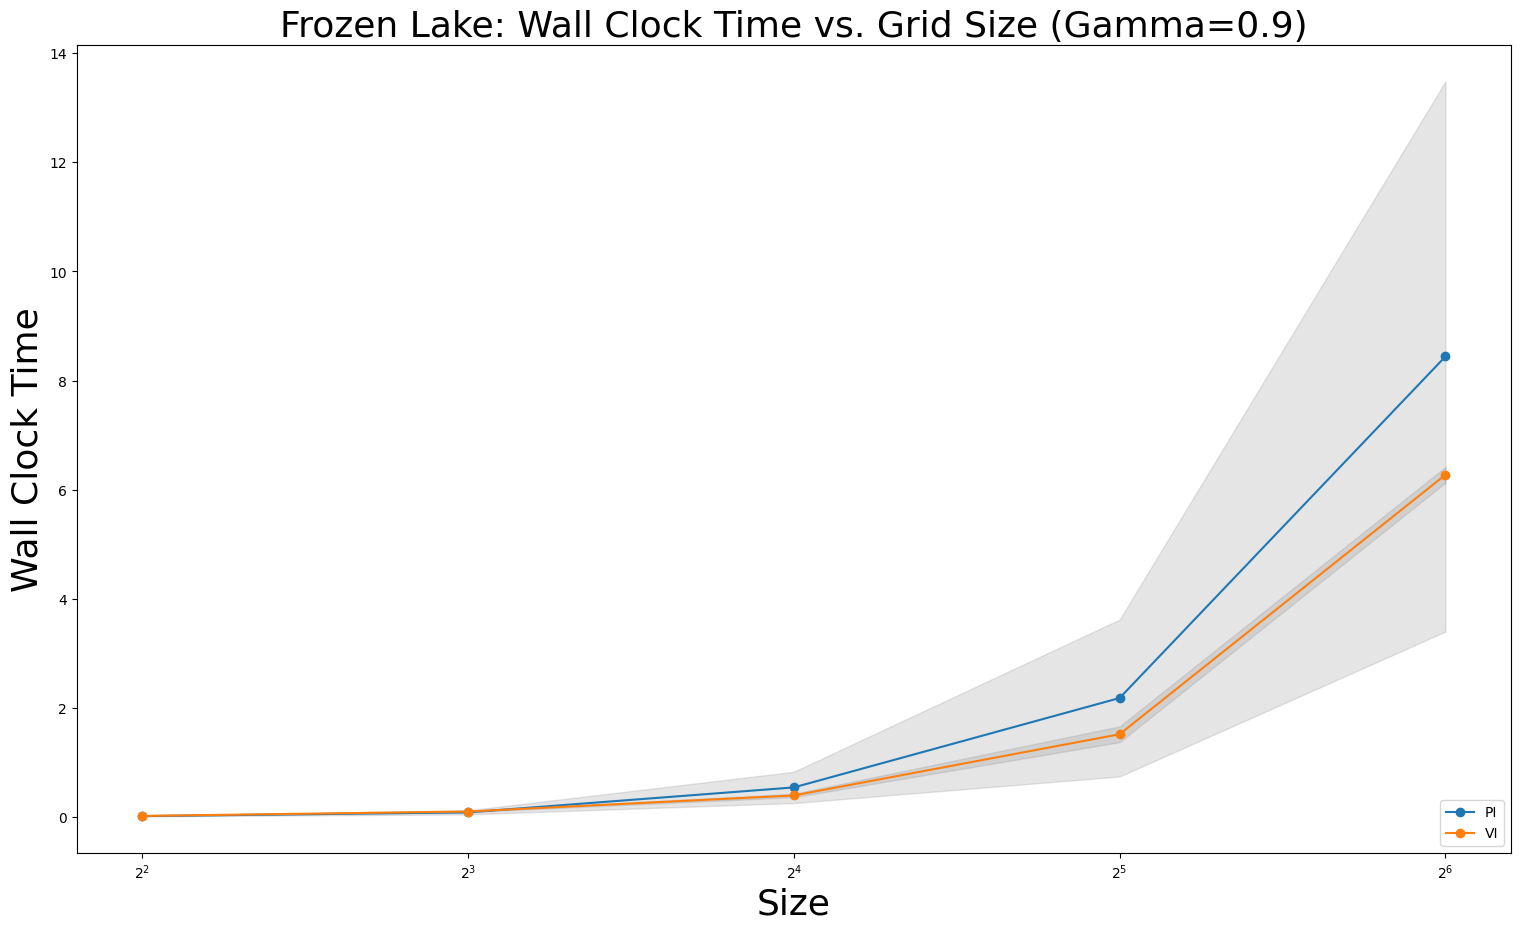

In [148]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
lower_std = np.array(wall_clock_times_by_sizes_pi) - np.array(wall_clock_times_std_by_sizes_pi)
upper_std = np.array(wall_clock_times_by_sizes_pi) + np.array(wall_clock_times_std_by_sizes_pi)
ax.plot(sizes, wall_clock_times_by_sizes_pi, label="PI", marker='o')
ax.fill_between(sizes, lower_std, upper_std, color='grey', alpha=0.2)

lower_std = np.array(wall_clock_times_by_sizes_vi) - np.array(wall_clock_times_std_by_sizes_vi)
upper_std = np.array(wall_clock_times_by_sizes_vi) + np.array(wall_clock_times_std_by_sizes_vi)
ax.plot(sizes, wall_clock_times_by_sizes_vi, label="VI", marker='o')
ax.fill_between(sizes, lower_std, upper_std, color='grey', alpha=0.2)


ax.set_title("Frozen Lake: Wall Clock Time vs. Grid Size (Gamma=0.9)", fontsize=26)
ax.set_xlabel('Size', fontsize=26)
ax.set_ylabel('Wall Clock Time', fontsize=26)
ax.legend(loc='lower right')
ax.set_xscale('log', base=2)
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_vl_pl_time_sizes.png")
plt.show()

# Value Iteration
### Gamma vs stochasticity


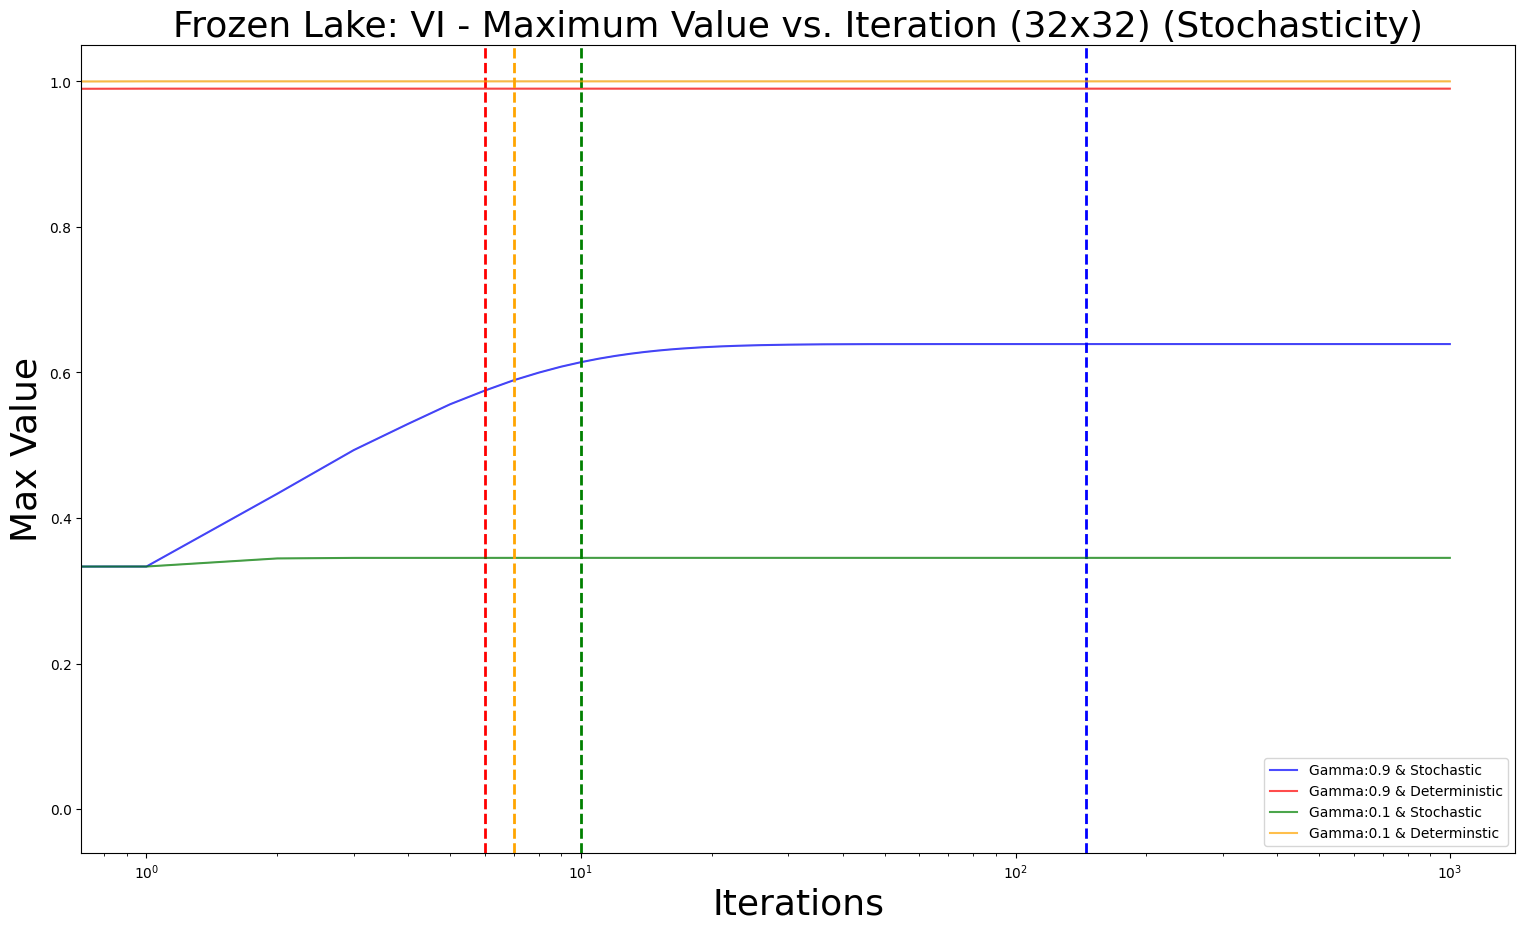

In [98]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
labels=['Gamma:0.9 & Stochastic', 'Gamma:0.9 & Deterministic', 'Gamma:0.1 & Stochastic', 'Gamma:0.1 & Determinstic']
# labels = ['Stochastic', 'Deterministic']
colors = ['blue', 'red', 'green', 'orange']
for i in range(4):
    max_value_per_iter = np.amax(V_tracks_by_stochastic_vi[i], axis=1)  # max value of all states per iteration
    if i == 1:
        max_value_per_iter -= .01
    max_value_std_per_iter = np.amax(V_tracks_std_by_stochastic_vi[i], axis=1)
    ax.plot(range(0,n_iters), max_value_per_iter, label=labels[i], alpha=0.7, color=colors[i])
    lower_std = np.array(max_value_per_iter) - np.array(max_value_std_per_iter)
    upper_std = np.array(max_value_per_iter) + np.array(max_value_std_per_iter)
    ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    if i ==1:
        ax.axvline(x=convergence_indexes_by_stochastic_vi[i]-1,color=colors[i], ls='--', lw=2)
    else:
        ax.axvline(x=convergence_indexes_by_stochastic_vi[i],color=colors[i], ls='--', lw=2)
    ax.set_xscale('log', base=10)
ax.set_title("Frozen Lake: VI - Maximum Value vs. Iteration (32x32) (Stochasticity)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Max Value', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_vl_gamma_stochastic.png")

plt.show()

# Value Iteration
## Gamma vs stochastic
## Wall clock time

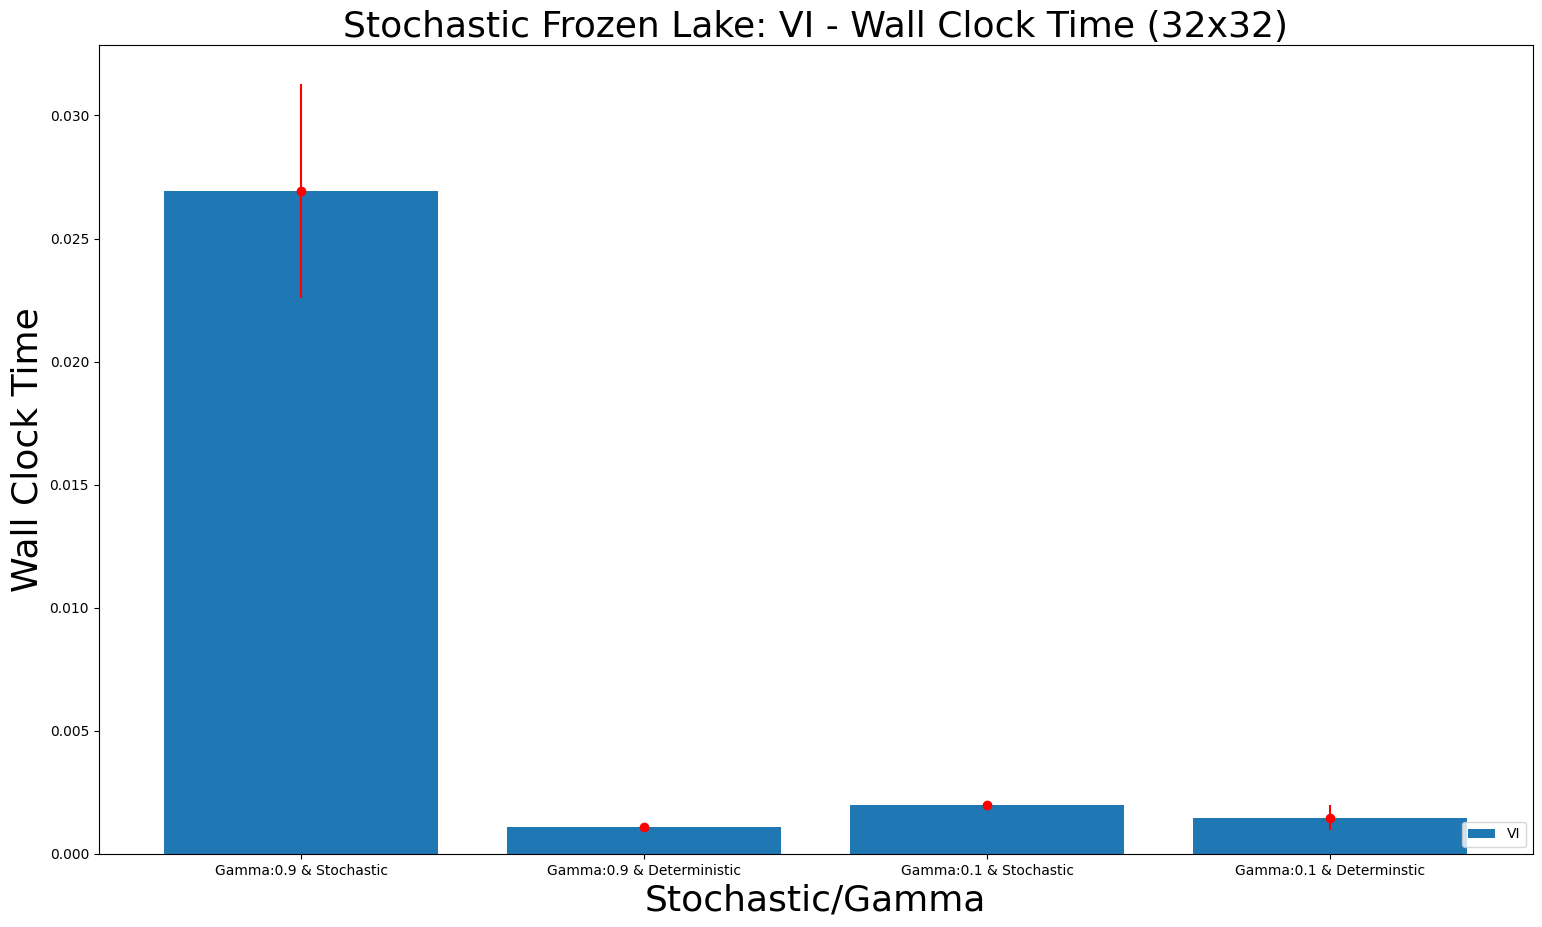

In [105]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
lower_std = np.array(wall_clock_times_by_stochastic_vi) - np.array(wall_clock_times_std_by_stochastic_vi)
upper_std = np.array(wall_clock_times_by_stochastic_vi) + np.array(wall_clock_times_std_by_stochastic_vi)
ax.bar(labels, wall_clock_times_by_stochastic_vi, label="VI")
ax.errorbar(labels, wall_clock_times_by_stochastic_vi,yerr = wall_clock_times_std_by_stochastic_vi,fmt ='o', color="r")
ax.set_title("Stochastic Frozen Lake: VI - Wall Clock Time (32x32)", fontsize=26)
ax.set_xlabel('Stochastic/Gamma', fontsize=26)
ax.set_ylabel('Wall Clock Time', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_vl_gamma_stochastic_time.png")
plt.show()

# Policy Iteration
## Gamma vs stochasticity

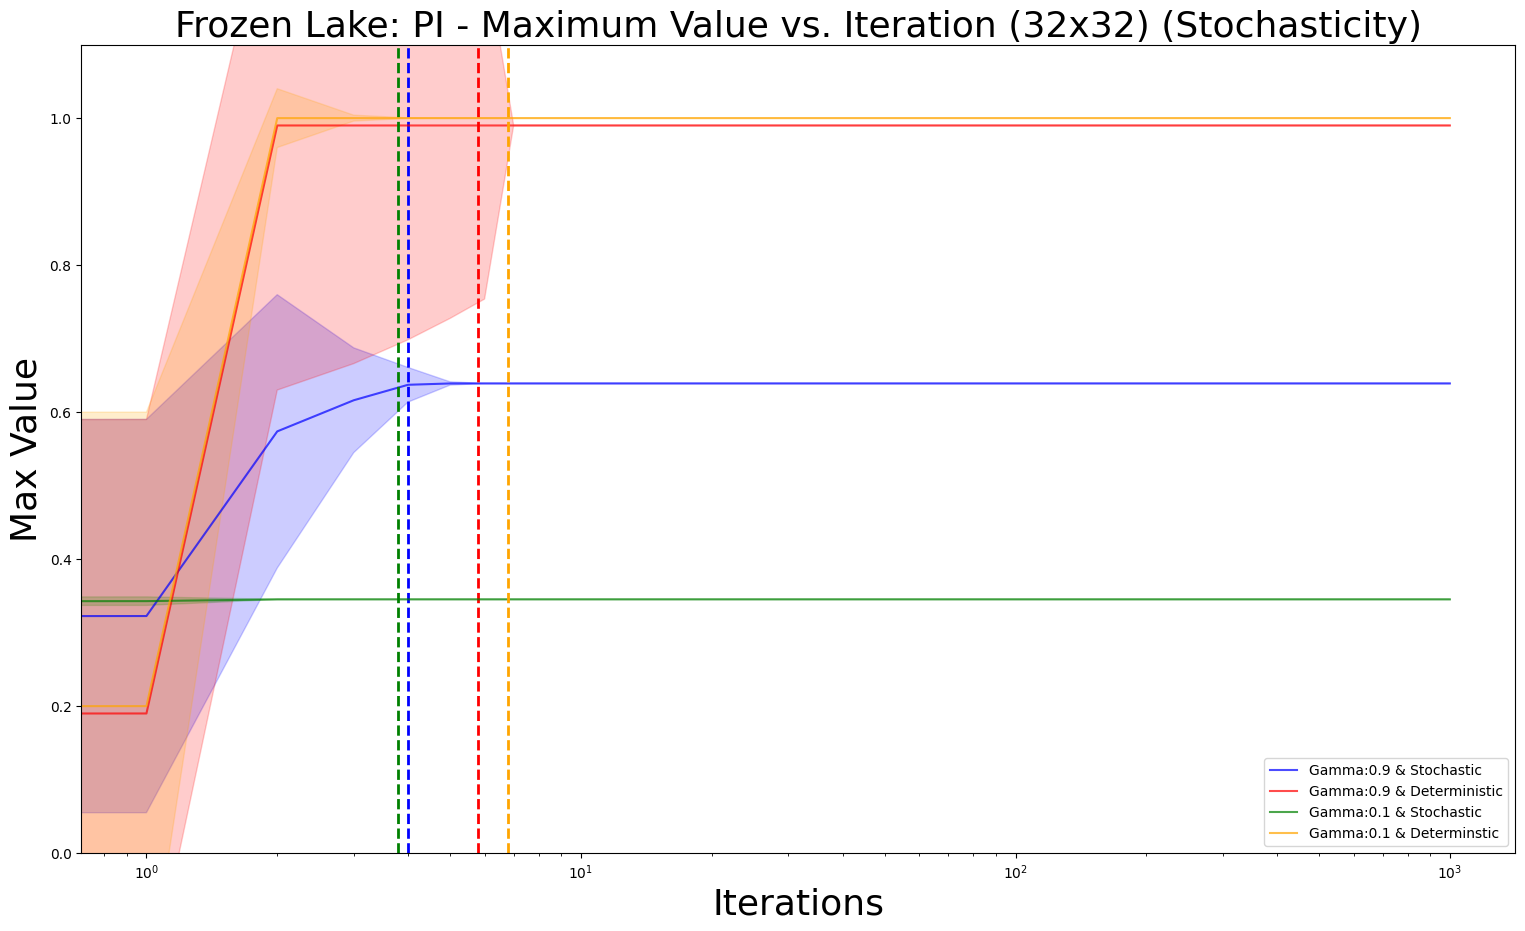

In [111]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
labels=['Gamma:0.9 & Stochastic', 'Gamma:0.9 & Deterministic', 'Gamma:0.1 & Stochastic', 'Gamma:0.1 & Determinstic']
# labels = ['Stochastic', 'Deterministic']
colors = ['blue', 'red', 'green', 'orange']
for i in range(4):
    max_value_per_iter = np.amax(V_tracks_by_stochastic_pi[i], axis=1)  # max value of all states per iteration
    if i == 1:
        max_value_per_iter -= .01
    max_value_std_per_iter = np.amax(V_tracks_std_by_stochastic_pi[i], axis=1)
    ax.plot(range(0,n_iters), max_value_per_iter, label=labels[i], alpha=0.7, color=colors[i])
    lower_std = np.array(max_value_per_iter) - np.array(max_value_std_per_iter)
    upper_std = np.array(max_value_per_iter) + np.array(max_value_std_per_iter)
    ax.fill_between(range(0,n_iters), lower_std, upper_std, color=colors[i], alpha=0.2)
    if i ==1:
        ax.axvline(x=convergence_indexes_by_stochastic_pi[i]-1,color=colors[i], ls='--', lw=2)
    else:
        ax.axvline(x=convergence_indexes_by_stochastic_pi[i],color=colors[i], ls='--', lw=2)
    ax.set_xscale('log', base=10)
ax.set_title("Frozen Lake: PI - Maximum Value vs. Iteration (32x32) (Stochasticity)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Max Value', fontsize=26)
ax.legend(loc='lower right')
ax.set_ylim([0,1.1])
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_pl_gamma_stochastic.png")

plt.show()

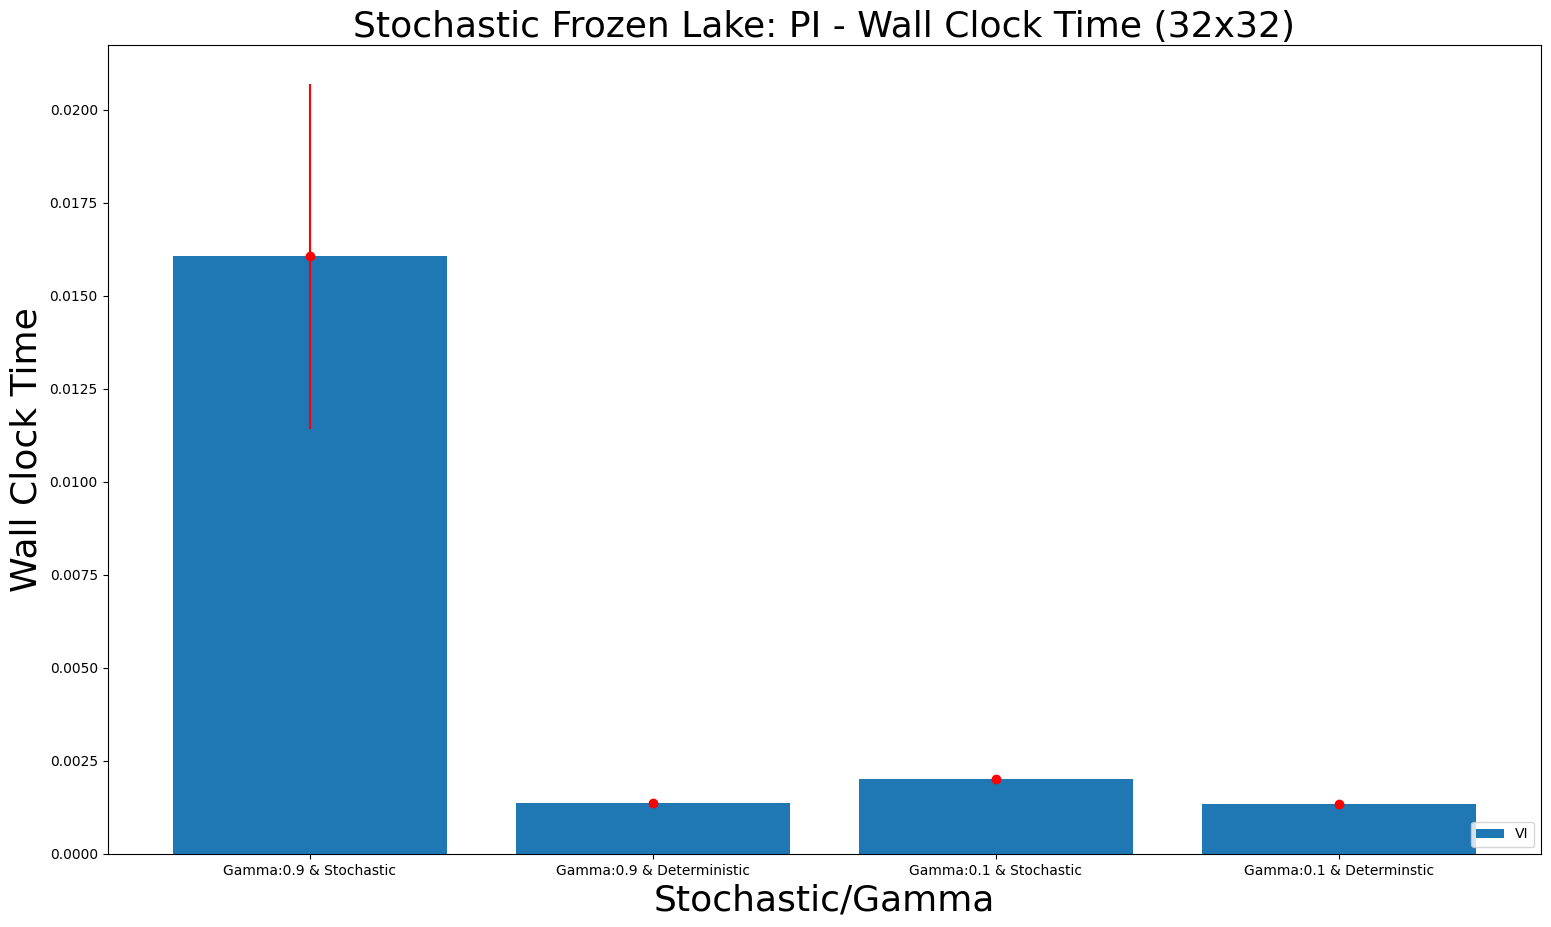

In [106]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
lower_std = np.array(wall_clock_times_by_stochastic_pi) - np.array(wall_clock_times_std_by_stochastic_pi)
upper_std = np.array(wall_clock_times_by_stochastic_pi) + np.array(wall_clock_times_std_by_stochastic_pi)
ax.bar(labels, wall_clock_times_by_stochastic_pi, label="VI")
ax.errorbar(labels, wall_clock_times_by_stochastic_pi,yerr = wall_clock_times_std_by_stochastic_pi,fmt ='o', color="r")
ax.set_title("Stochastic Frozen Lake: PI - Wall Clock Time (32x32)", fontsize=26)
ax.set_xlabel('Stochastic/Gamma', fontsize=26)
ax.set_ylabel('Wall Clock Time', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_pl_gamma_stochastic_time.png")
plt.show()

# Q Learning

i need to talk about the original reward function. Why that doesn't converge on small problem. Then talk about changes I made.

## Q Learning 8 x 8
8 x 8. Determinstic. 1 Seed.
1. Hyperparameter tuning
Set default rates to 1/2.
Decay is 1/2. Exploration vs exploitation is balanced. 

In [5]:
frozen_lake = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=False, render_mode=None)  # set the environment
frozen_lake.reset(seed=199)  # set the seed for testing

(0, {'prob': 1})

### Discount Factor Hyperparameter Tuning

In [6]:
wall_clock_times_by_gamma_ql = []
wall_clock_times_std_by_gamma_ql = []
Qs_by_gamma_ql = []
Qs_std_by_gamma_ql = []
Q_tracks_by_gamma_ql = []
Q_tracks_std_by_gamma_ql = []
pis_by_gamma_ql = []
pis_std_by_gamma_ql = []
gammas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]  # discount factor. 0 == immediate. 1 == long term.

n_iters = 100000
alpha=0.5
for gamma in gammas:
    start = time.time()
    Q, V, pi, Q_track, pi_track = RL(frozen_lake.env).q_learning(gamma=gamma,
                                                             init_alpha=alpha,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=1.0,
                   min_epsilon=0.1,
                   epsilon_decay_ratio=0.5,
                   n_episodes=n_iters)
    end = time.time()
    running_time = end - start
    print("runtime = %.5f seconds" % running_time)
    wall_clock_times_by_gamma_ql.append(running_time)
    Qs_by_gamma_ql.append(Q)
    Q_tracks_by_gamma_ql.append(Q_track)

runtime = 1722.16 seconds
runtime = 1722.15840 seconds


runtime = 38.54 seconds
runtime = 38.57008 seconds


runtime = 38.05 seconds
runtime = 38.08139 seconds


runtime = 38.18 seconds
runtime = 38.21611 seconds


runtime = 38.11 seconds
runtime = 38.13924 seconds


runtime = 39.88 seconds
runtime = 39.90639 seconds


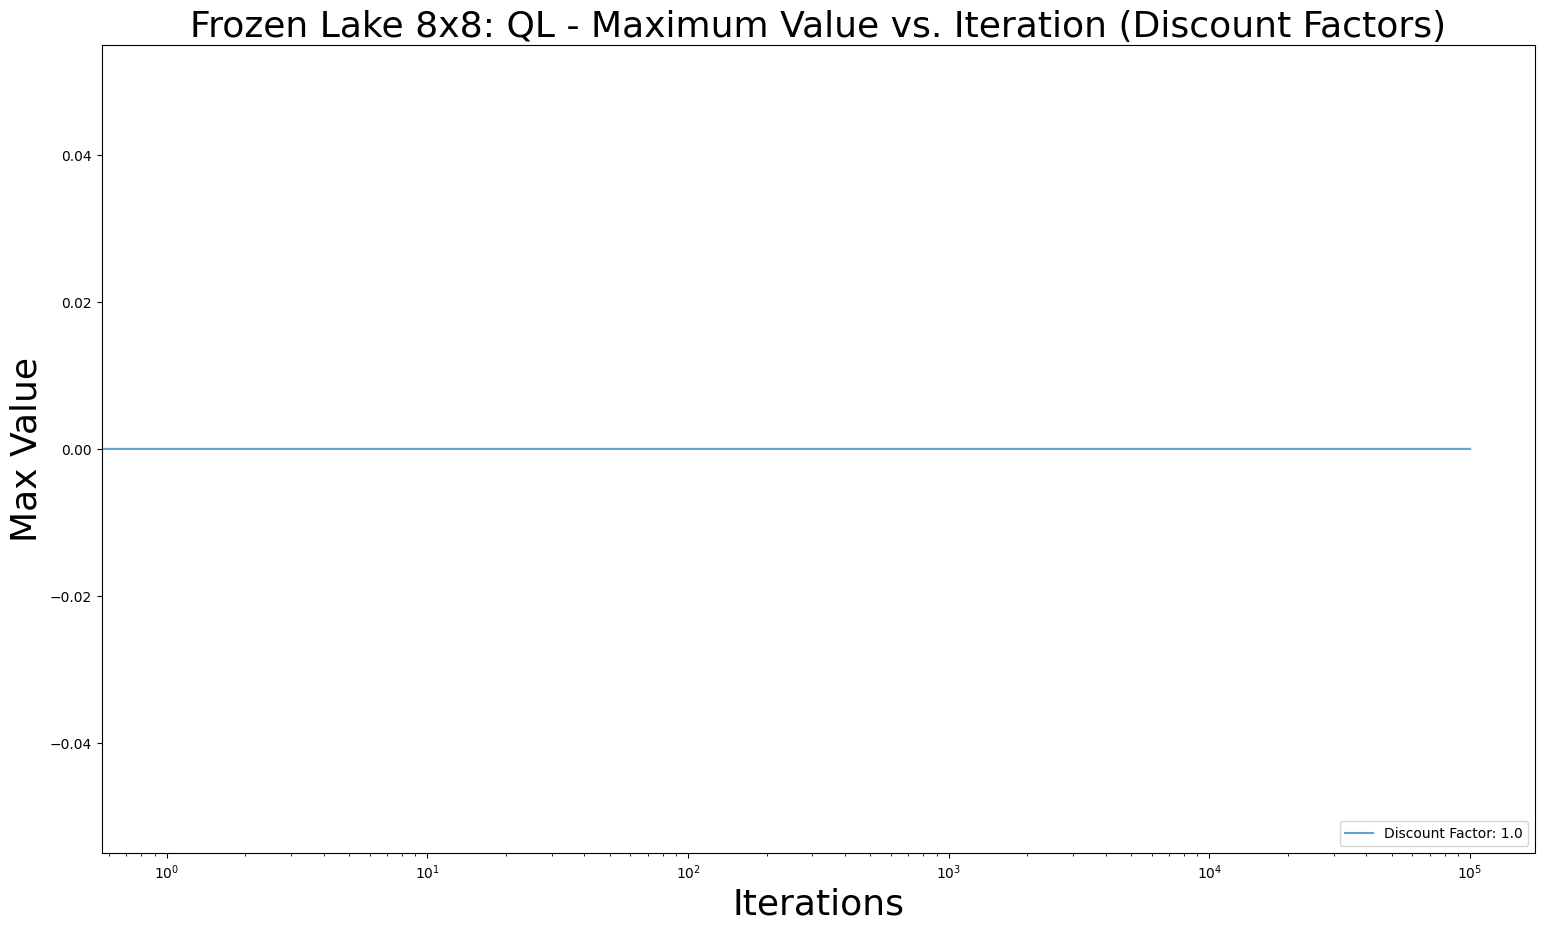

In [13]:
n_iters = 100000
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(len(gammas)):  # loop through discount factors
    max_value_per_iter = np.amax(np.amax(Q_tracks_by_gamma_ql[i], axis=2), axis=1)  # take the optimal action, then take the max value per episode  
    ax.plot(range(0,n_iters), max_value_per_iter, label=f"Discount Factor: {gammas[i]}", alpha=0.7)
#     ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    ax.set_xscale('log', base=10)
ax.set_title("Frozen Lake 8x8: QL - Maximum Value vs. Iteration (Discount Factors)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Max Value', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_ql_small_gammas.png")
plt.show()

### Alpha Hyperparameter Tuning

In [7]:
wall_clock_times_by_alpha_ql = []
wall_clock_times_std_by_alpha_ql = []
Qs_by_alpha_ql = []
Qs_std_by_alpha_ql = []
Q_tracks_by_alpha_ql = []
Q_tracks_std_by_alpha_ql = []
pis_by_alpha_ql = []
pis_std_by_alpha_ql = []
gamma=0.5
alphas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
n_iters = 100000
for alpha in alphas:
    start = time.time()
    Q, V, pi, Q_track, pi_track = RL(frozen_lake.env).q_learning(gamma=gamma,
                                                             init_alpha=alpha,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=1.0,
                   min_epsilon=0.1,
                   epsilon_decay_ratio=0.5,
                   n_episodes=n_iters)
    end = time.time()
    running_time = end - start
    print("runtime = %.5f seconds" % running_time)
    wall_clock_times_by_alpha_ql.append(running_time)
    Qs_by_alpha_ql.append(Q)
    Q_tracks_by_alpha_ql.append(Q_track)

runtime = 1706.39 seconds
runtime = 1706.41733 seconds


runtime = 39.57 seconds
runtime = 39.61016 seconds


runtime = 37.97 seconds
runtime = 37.99470 seconds


runtime = 1698.71 seconds
runtime = 1698.73656 seconds


runtime = 1707.27 seconds
runtime = 1707.30589 seconds


runtime = 37.53 seconds
runtime = 37.55959 seconds


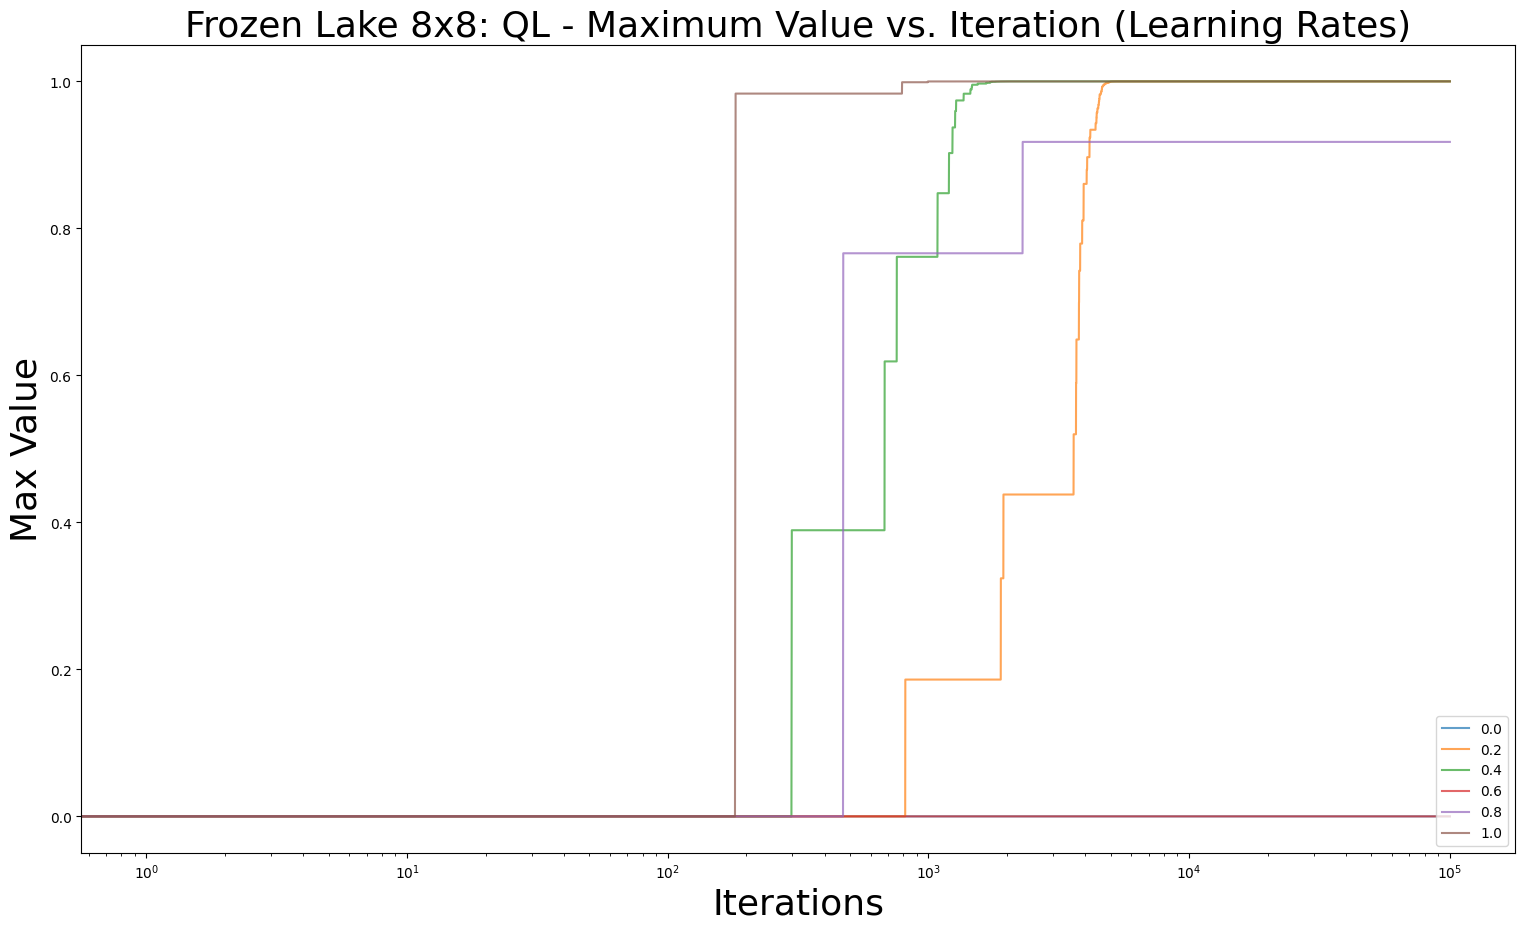

In [14]:
n_iters = 100000
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(len(alphas)):
    max_value_per_iter = np.amax(np.amax(Q_tracks_by_alpha_ql[i], axis=2), axis=1)  
    ax.plot(range(0,n_iters), max_value_per_iter, label=alphas[i], alpha=0.7)
#     ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    ax.set_xscale('log', base=10)
ax.set_title("Frozen Lake 8x8: QL - Maximum Value vs. Iteration (Learning Rates)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Max Value', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_ql_small_alphas.png")
plt.show()

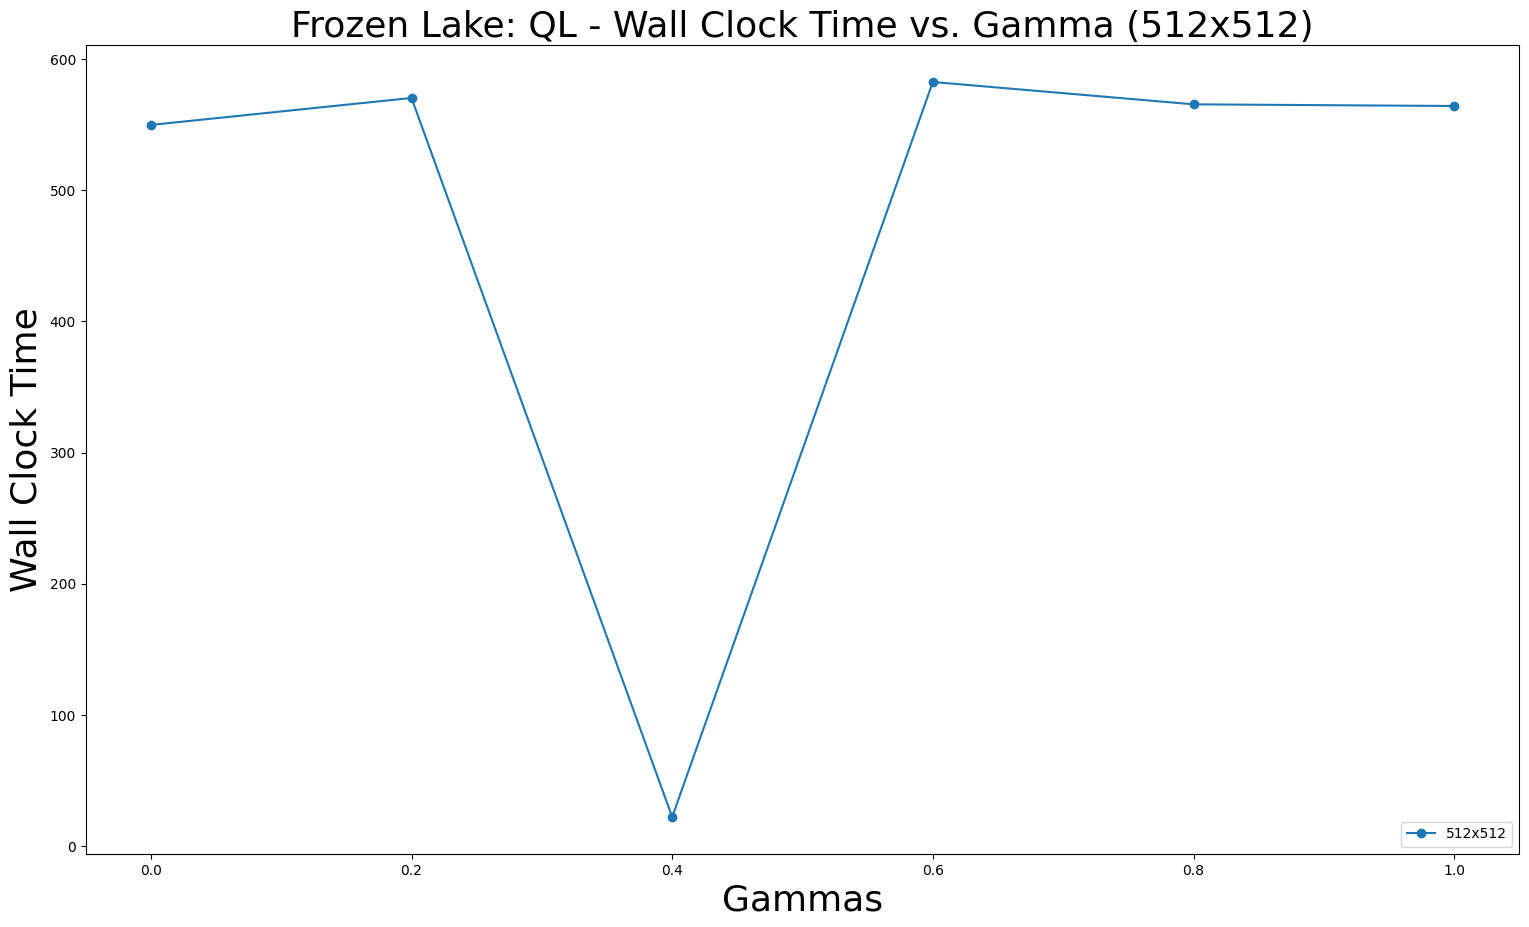

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
# lower_std = np.array(wall_clock_times_by_gamma_vi) - np.array(wall_clock_times_std_by_gamma_vi)
# upper_std = np.array(wall_clock_times_by_gamma_vi) + np.array(wall_clock_times_std_by_gamma_vi)
ax.plot(alphas, wall_clock_times_by_alpha_ql, label="Learning Rates", marker='o')
ax.plot(gammas, wall_clock_times_by_gamma_ql, label="Discount Factors", marker='o')
# ax.fill_between(gammas, lower_std, upper_std, color='grey', alpha=0.2)
ax.set_title("Frozen Lake 8x8: QL - Wall Clock Times", fontsize=26)
ax.set_xlabel('Gammas', fontsize=26)
ax.set_ylabel('Wall Clock Time', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_ql_small_time.png")
plt.show()

### Epsilon Hyperparameter Tuning

In [8]:
wall_clock_times_by_epsilon_ql = []
wall_clock_times_std_by_epsilon_ql = []
Qs_by_epsilon_ql = []
Qs_std_by_epsilon_ql = []
Q_tracks_by_epsilon_ql = []
Q_tracks_std_by_epsilon_ql = []
pis_by_epsilon_ql = []
pis_std_by_epsilon_ql = []
alpha = 0.5
gamma=0.5
epsilons = [0.2, 0.4, 0.6, 0.8, 1.0]
n_iters = 100000
for epsilon in epsilons:
    start = time.time()
    Q, V, pi, Q_track, pi_track = RL(frozen_lake.env).q_learning(gamma=gamma,
                                                             init_alpha=alpha,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=epsilon,
                                                                 min_epsilon=0.1,
                   epsilon_decay_ratio=0.5,
                   n_episodes=n_iters)
    end = time.time()
    running_time = end - start
    print("runtime = %.5f seconds" % running_time)
    wall_clock_times_by_epsilon_ql.append(running_time)
    Qs_by_epsilon_ql.append(Q)
    Q_tracks_by_epsilon_ql.append(Q_track)

runtime = 2069.00 seconds
runtime = 2069.02701 seconds


runtime = 1897.43 seconds
runtime = 1897.46499 seconds


runtime = 1804.13 seconds
runtime = 1804.16195 seconds


runtime = 1748.76 seconds
runtime = 1748.79369 seconds


runtime = 1690.01 seconds
runtime = 1690.04508 seconds


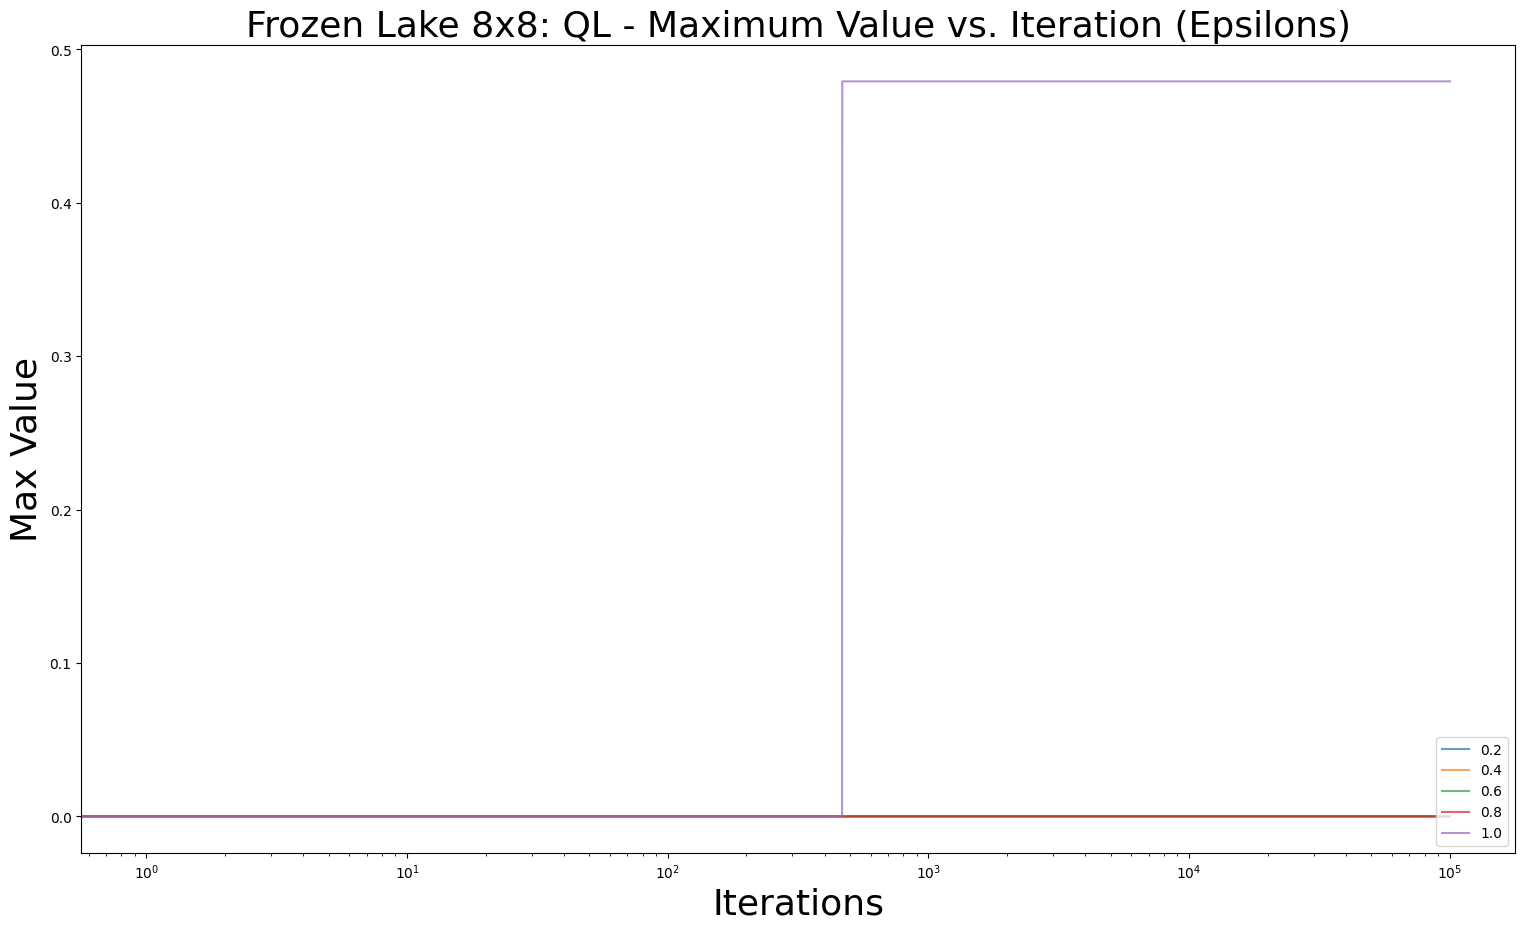

In [15]:
n_iters = 100000
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(len(epsilons)):
    max_value_per_iter = np.amax(np.amax(Q_tracks_by_epsilon_ql[i], axis=2), axis=1)  
    ax.plot(range(0,n_iters), max_value_per_iter, label=epsilons[i], alpha=0.7)
#     ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    ax.set_xscale('log', base=10)
ax.set_title("Frozen Lake 8x8: QL - Maximum Value vs. Iteration (Epsilons)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Max Value', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_ql_small_epsilons.png")
plt.show()

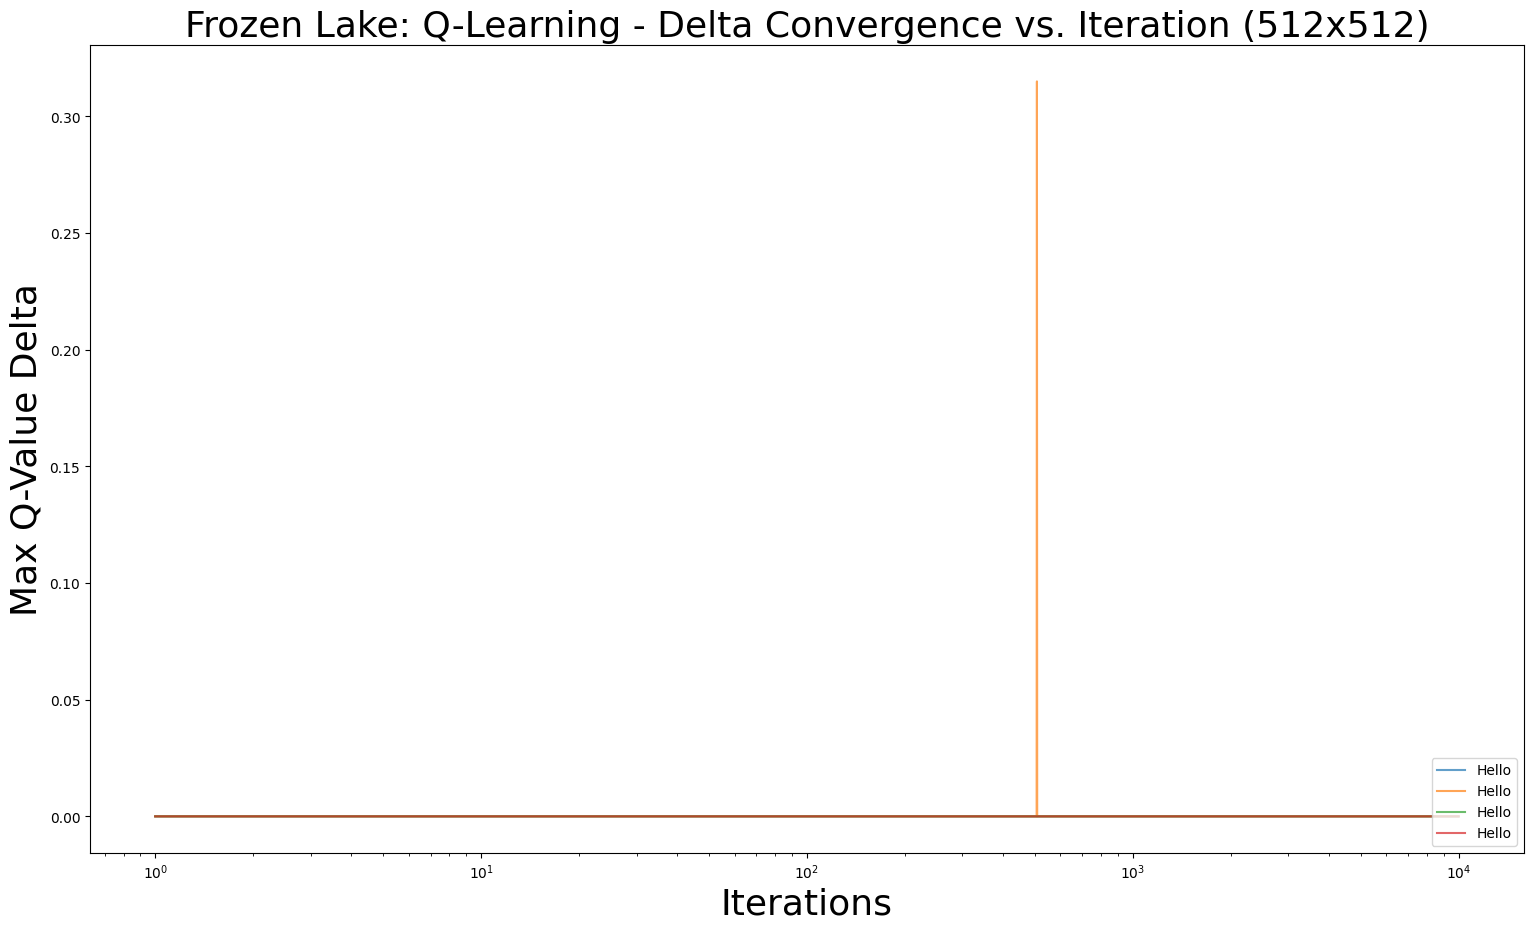

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

max_value_per_iter = np.amax(np.diff(Q_tracks_by_epsilon_ql[-1], axis=0), axis=1)  # delta convergence
# max_value_per_iter_std = np.amax(V_tracks_std_by_gamma_vi[i], axis=1)    
# lower_std = np.array(max_value_per_iter) - np.array(max_value_per_iter_std)
# upper_std = np.array(max_value_per_iter) + np.array(max_value_per_iter_std)
ax.plot(range(1,n_iters), max_value_per_iter, label="Hello", alpha=0.7)
# ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
ax.set_xscale('log', base=10)
ax.set_title("Frozen Lake: Q-Learning - Delta Convergence vs. Iteration (512x512)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Max Q-Value Delta', fontsize=26)
ax.legend(loc='lower right')
plt.show()

### Epsilon Decay Hyperparameter Tuning

In [9]:
wall_clock_times_by_epsilon_decay_ql = []
wall_clock_times_std_by_epsilon_decay_ql = []
Qs_by_epsilon_decay_ql = []
Qs_std_by_epsilon_decay_ql = []
Q_tracks_by_epsilon_decay_ql = []
Q_tracks_std_by_epsilon_decay_ql = []
pis_by_epsilon_decay_ql = []
pis_std_by_epsilon_decay_ql = []
alpha = .5
gamma=0.5
epsilon_decays = [0.1, 0.5, 0.9]
n_iters = 10000
for epsilon_decay in epsilon_decays:
    start = time.time()
    Q, V, pi, Q_track, pi_track = RL(frozen_lake.env).q_learning(gamma=gamma,
                                                             init_alpha=alpha,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=1.0,
                                                                 min_epsilon=0.1,
                   epsilon_decay_ratio=epsilon_decay,
                   n_episodes=n_iters)
    end = time.time()
    running_time = end - start
    print("runtime = %.5f seconds" % running_time)
    wall_clock_times_by_epsilon_decay_ql.append(running_time)
    Qs_by_epsilon_decay_ql.append(Q)
    Q_tracks_by_epsilon_decay_ql.append(Q_track)

runtime = 211.42 seconds
runtime = 211.47244 seconds


runtime = 170.14 seconds
runtime = 170.14558 seconds


runtime = 127.12 seconds
runtime = 127.12467 seconds


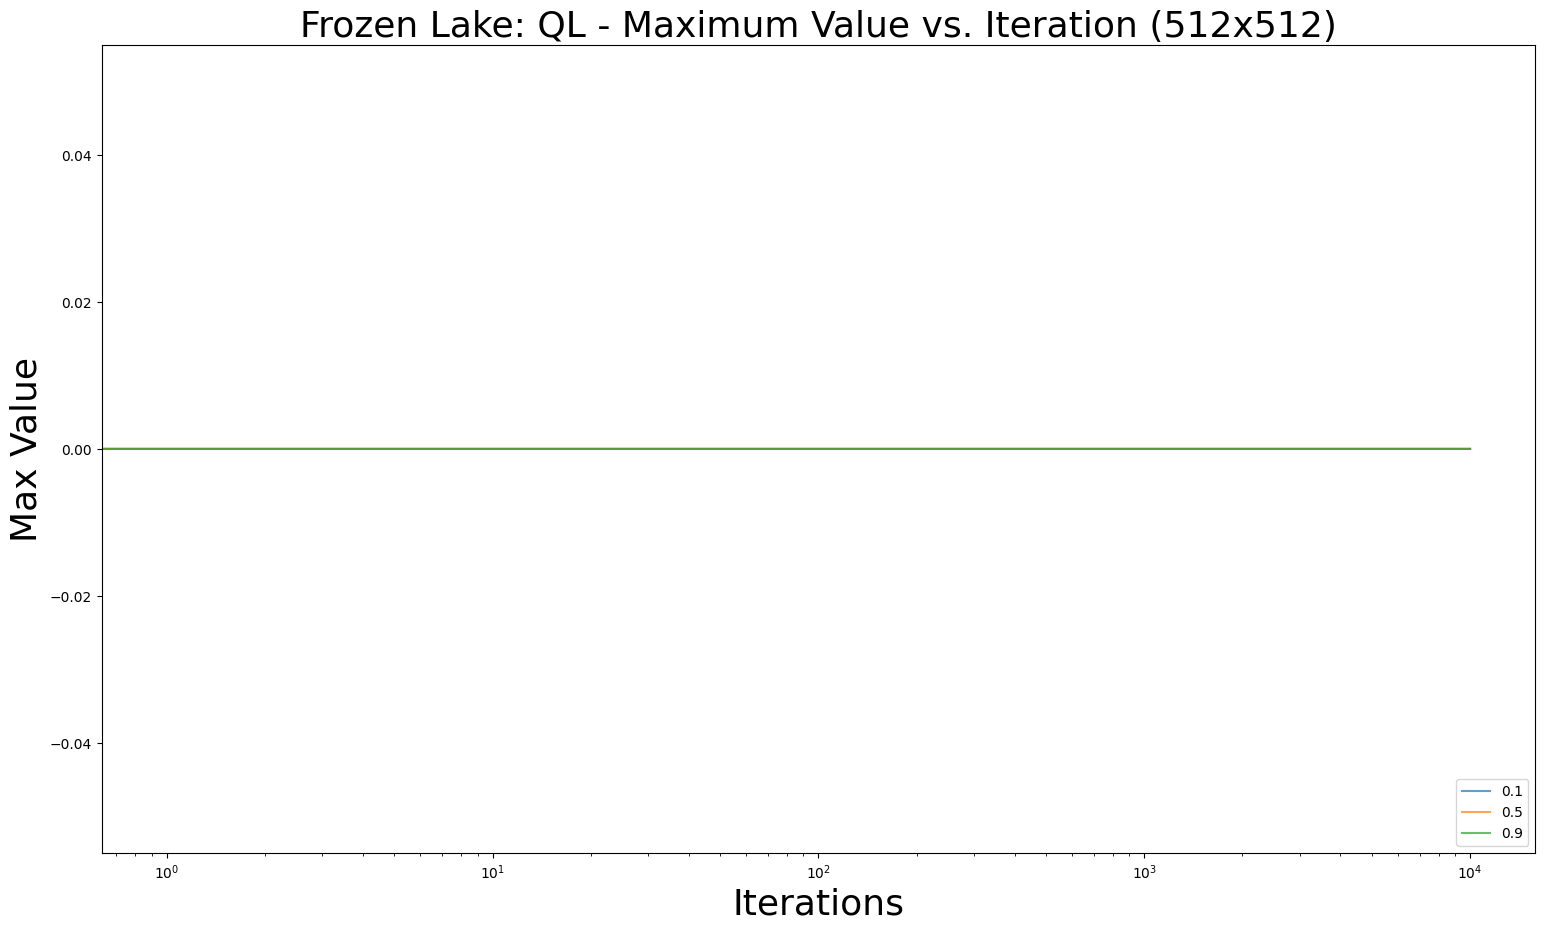

In [17]:
n_iters = 10000
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(len(epsilon_decays)):
    max_value_per_iter = np.amax(np.amax(Q_tracks_by_epsilon_decay_ql[i], axis=2), axis=1)  # max value per iteration   
    ax.plot(range(0,n_iters), max_value_per_iter, label=epsilon_decays[i], alpha=0.7)
#     ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    ax.set_xscale('log', base=10)
ax.set_title("Frozen Lake: QL - Maximum Value vs. Iteration (512x512)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Max Value', fontsize=26)
ax.legend(loc='lower right')
plt.show()

## Q Learning 24 x 24
24 x 24. Determinstic. 1 Seed.
1. Hyperparameter tuning
Set default rates to 1/2.
Decay is 1/2. Exploration vs exploitation is balanced.

Run once for 1MM episodes.

In [10]:
size=24
frozen_lake = gym.make('FrozenLake-v1',desc=generate_random_map(size=size), is_slippery=False, render_mode=None)  # set the environment
frozen_lake.reset(seed=42)

(0, {'prob': 1})

In [11]:
wall_clock_times_by_gamma_ql_large = []
wall_clock_times_std_by_gamma_ql_large = []
Qs_by_gamma_ql_large = []
Qs_std_by_gamma_ql_large = []
Q_tracks_by_gamma_ql_large = []
Q_tracks_std_by_gamma_ql_large = []
pis_by_gamma_ql_large = []
pis_std_by_gamma_ql_large = []
gammas = [1.0]  # discount factor. 0 == immediate. 1 == long term.
n_iters = 1000000
alpha=0.5
for gamma in gammas:
    start = time.time()
    Q, V, pi, Q_track, pi_track = RL(frozen_lake.env).q_learning(gamma=gamma,
                                                             init_alpha=alpha,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=1.0,
                   min_epsilon=0.1,
                   epsilon_decay_ratio=0.5,
                   n_episodes=n_iters)
    end = time.time()
    running_time = end - start
    print("runtime = %.5f seconds" % running_time)
    wall_clock_times_by_gamma_ql_large.append(running_time)
    Qs_by_gamma_ql_large.append(Q)
    Q_tracks_by_gamma_ql_large.append(Q_track)

runtime = 8211.02 seconds
runtime = 8211.02183 seconds


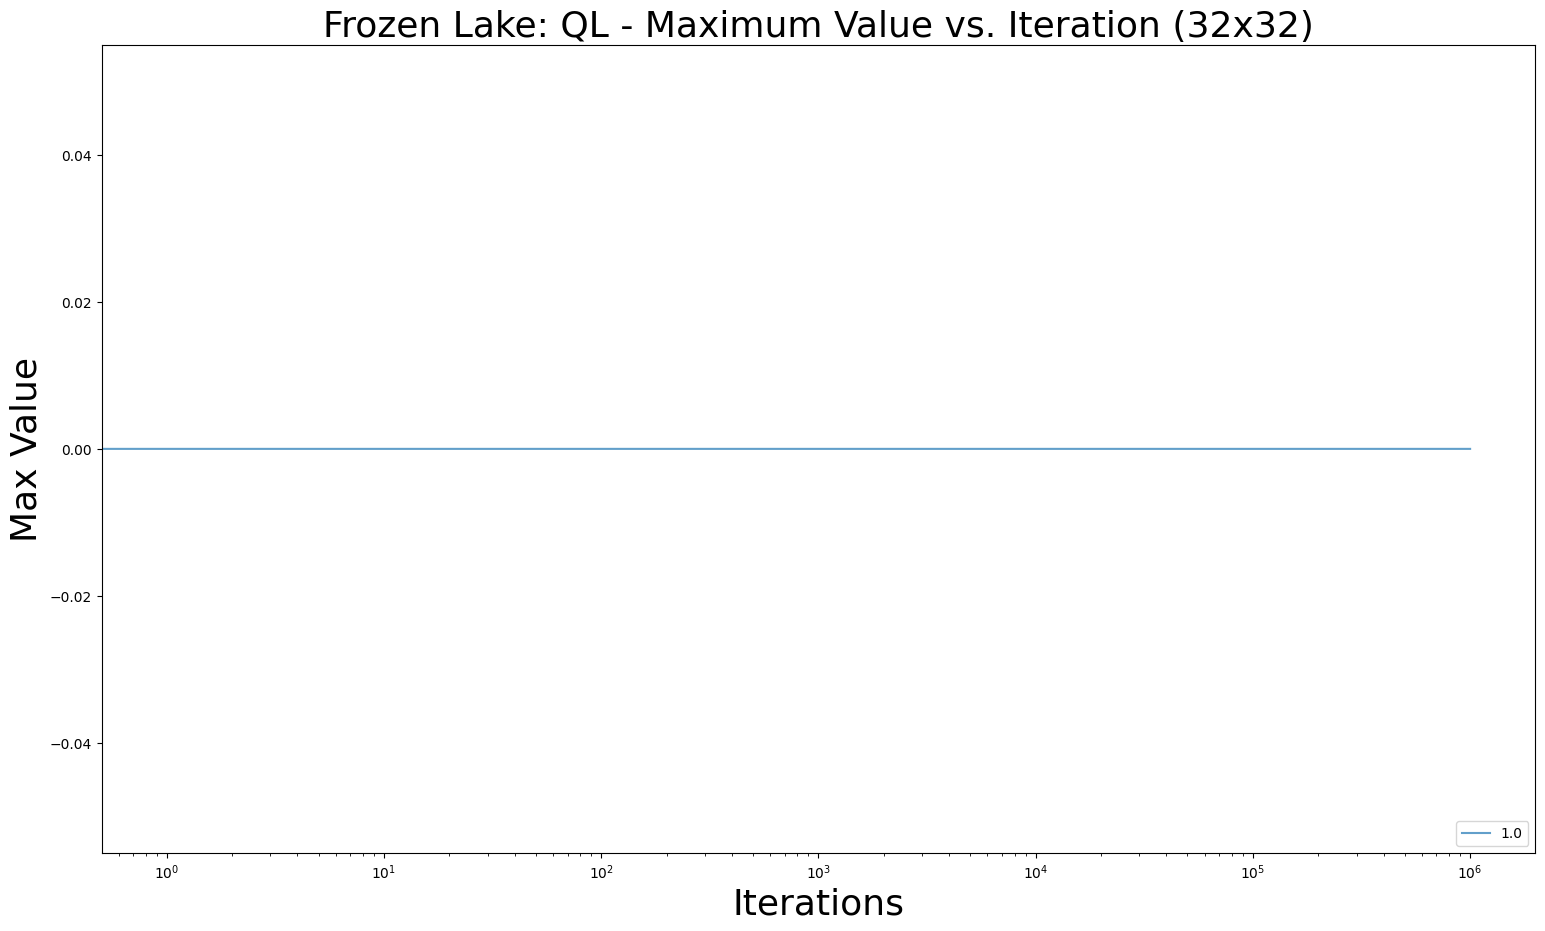

In [18]:
n_iters = 1000000
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(len(gammas)):
    max_value_per_iter = np.amax(np.amax(Q_tracks_by_gamma_ql_large[i], axis=2), axis=1)  # max value per iteration   
    ax.plot(range(0,n_iters), max_value_per_iter, label=gammas[i], alpha=0.7)
#     ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    ax.set_xscale('log', base=10)
ax.set_title("Frozen Lake: QL - Maximum Value vs. Iteration (32x32)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Max Value', fontsize=26)
ax.legend(loc='lower right')
plt.show()

## Reward Shaping

In [127]:
class RewardShaperWrapper(gym.RewardWrapper):
    def __init__(self, env):
        super(RewardShaperWrapper, self).__init__(env)
    
    def reward_logic(self, letter):
        if letter == b"G":
            return 10.0
        elif letter == b"S":
            return -10.0
        elif letter == b"H":
            return -1.0
        elif letter == b"F":
            return -1.0
        else:
            return 0.0

    def update_probability_matrix(self, row, col, action):
        newrow, newcol = inc(row, col, action)
        newstate = to_s(newrow, newcol)
        newletter = desc[newrow, newcol]
        terminated = bytes(newletter) in b"GH"
        reward = reward_logic(newletter)
        return newstate, reward, terminated

In [182]:
from bettermdptools.algorithms.frozen_lake import FrozenLakeEnv

In [183]:
size=24
frozen_lake = FrozenLakeEnv(desc=generate_random_map(size=size, p=0.90), is_slippery=True, render_mode=None)  ## REWARD SHAPING
frozen_lake.reset(seed=42)

(0, {'prob': 1})

In [184]:
from bettermdptools.algorithms.rl import RL

In [185]:
wall_clock_times_by_gamma_ql_large_reward_shaped = []
wall_clock_times_std_by_gamma_ql_large_reward_shaped = []
Qs_by_gamma_ql_large_reward_shaped = []
Qs_std_by_gamma_ql_large_reward_shaped = []
Q_tracks_by_gamma_ql_large_reward_shaped = []
Q_tracks_std_by_gamma_ql_large_reward_shaped = []
pis_by_gamma_ql_large_reward_shaped = []
pis_std_by_gamma_ql_large_reward_shaped = []
gammas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]  # discount factor. 0 == immediate. 1 == long term.
n_iters = 100000
alpha=0.5
for gamma in gammas:
    start = time.time()
    Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(gamma=gamma,
                                                             init_alpha=alpha,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=1.0,
                   min_epsilon=0.1,
                   epsilon_decay_ratio=0.5,
                   n_episodes=n_iters)
    end = time.time()
    running_time = end - start
    print("runtime = %.5f seconds" % running_time)
    wall_clock_times_by_gamma_ql_large_reward_shaped.append(running_time)
    Qs_by_gamma_ql_large_reward_shaped.append(Q)
    Q_tracks_by_gamma_ql_large_reward_shaped.append(Q_track)

runtime = 193.85 seconds
runtime = 194.58763 seconds


runtime = 694.21 seconds
runtime = 694.81855 seconds


runtime = 616.06 seconds
runtime = 616.84521 seconds


runtime = 412.97 seconds
runtime = 413.47027 seconds


runtime = 404.59 seconds
runtime = 404.83424 seconds


runtime = 77.04 seconds
runtime = 77.54211 seconds


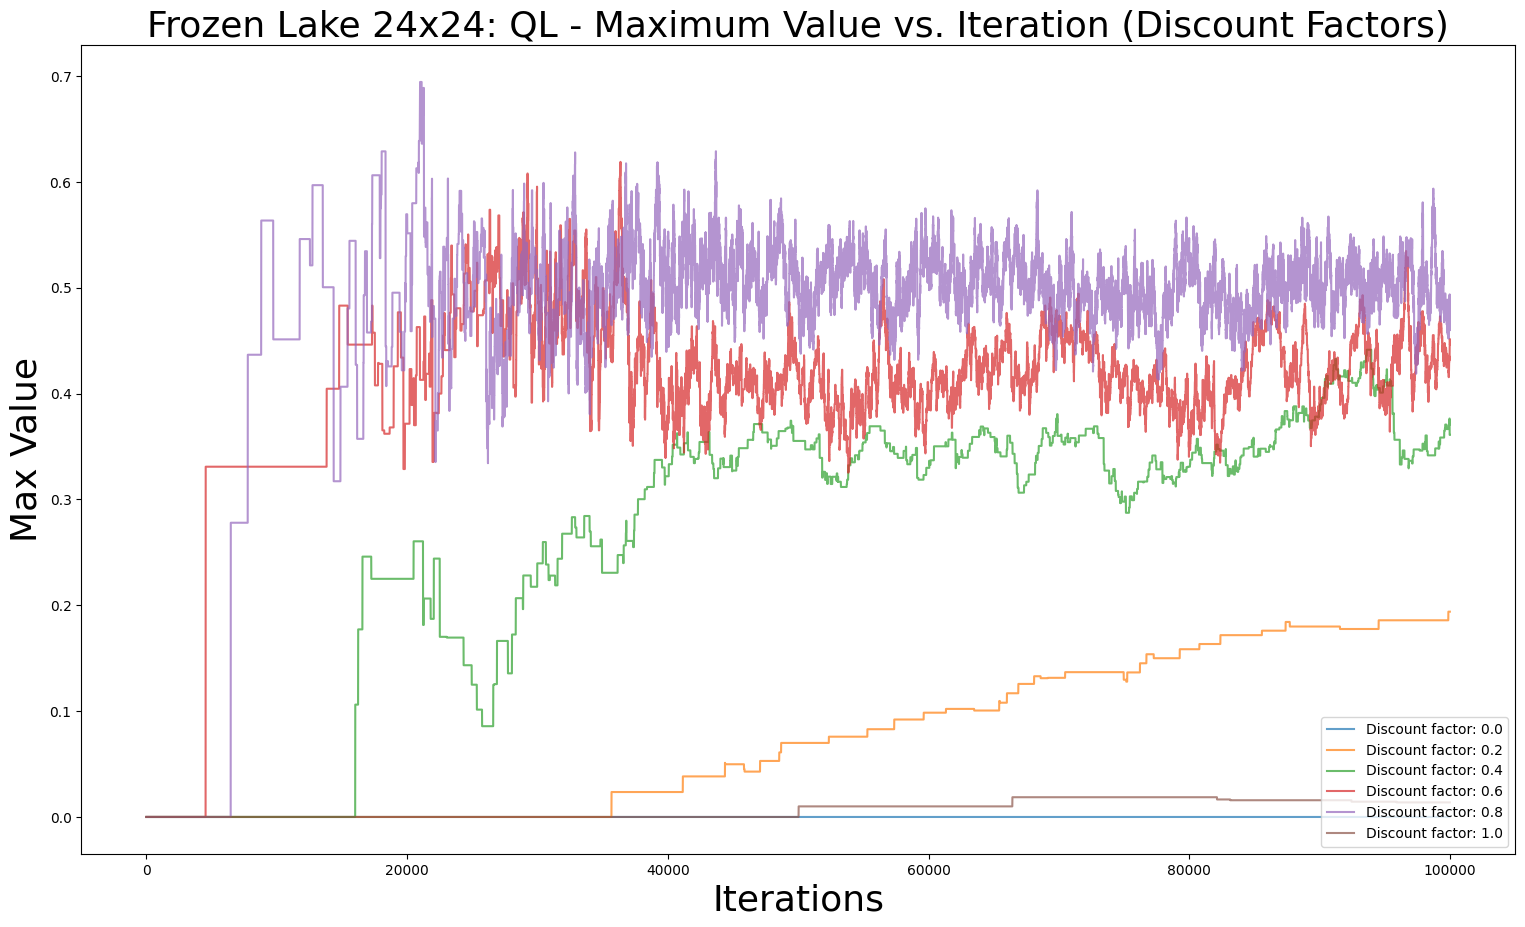

In [189]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(len(gammas)):
    max_value_per_iter = np.amax(np.amax(Q_tracks_by_gamma_ql_large_reward_shaped[i], axis=2), axis=1)  # max value per iteration   
    ax.plot(range(0,n_iters), max_value_per_iter, label=f"Discount factor: {gammas[i]}", alpha=0.7)
#     ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    # ax.set_xscale('log', base=10)
ax.set_title("Frozen Lake 24x24: QL - Maximum Value vs. Iteration (Discount Factors)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Max Value', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_ql_large_reward_shaped_gammas2.png")
plt.show()

In [188]:
# fig, ax = plt.subplots()
# fig.set_size_inches(18.5, 10.5)
# for i in range(len(gammas)):
#     potential_delta = np.amax(np.amax(np.diff(Q_tracks_by_gamma_ql_large_reward_shaped[i], axis=0), axis=1), axis=1)# diff by each state-action, then take the max of each episode, then take the max of all actions
#     # lower_std = np.array(max_value_per_iter) - np.array(max_value_per_iter_std)
#     # upper_std = np.array(max_value_per_iter) + np.array(max_value_per_iter_std)
#     ax.plot(range(1,100000), potential_delta, label=gammas[i], alpha=0.7)
# #     ax.plot(range(1,100000), bspl_y, label=gammas[i], alpha=0.7)
#     # ax.axvline(x=threshold, color='red', ls='--')
#     # ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
#     ax.set_xscale('log', base=10)
# ax.set_title("Frozen Lake: Q-Learning - Delta Convergence vs. Iteration (512x512)", fontsize=26)
# ax.set_xlabel('Iterations', fontsize=26)
# ax.set_ylabel('Max Q-Value Delta', fontsize=26)
# ax.legend(loc='lower right')
# plt.show()

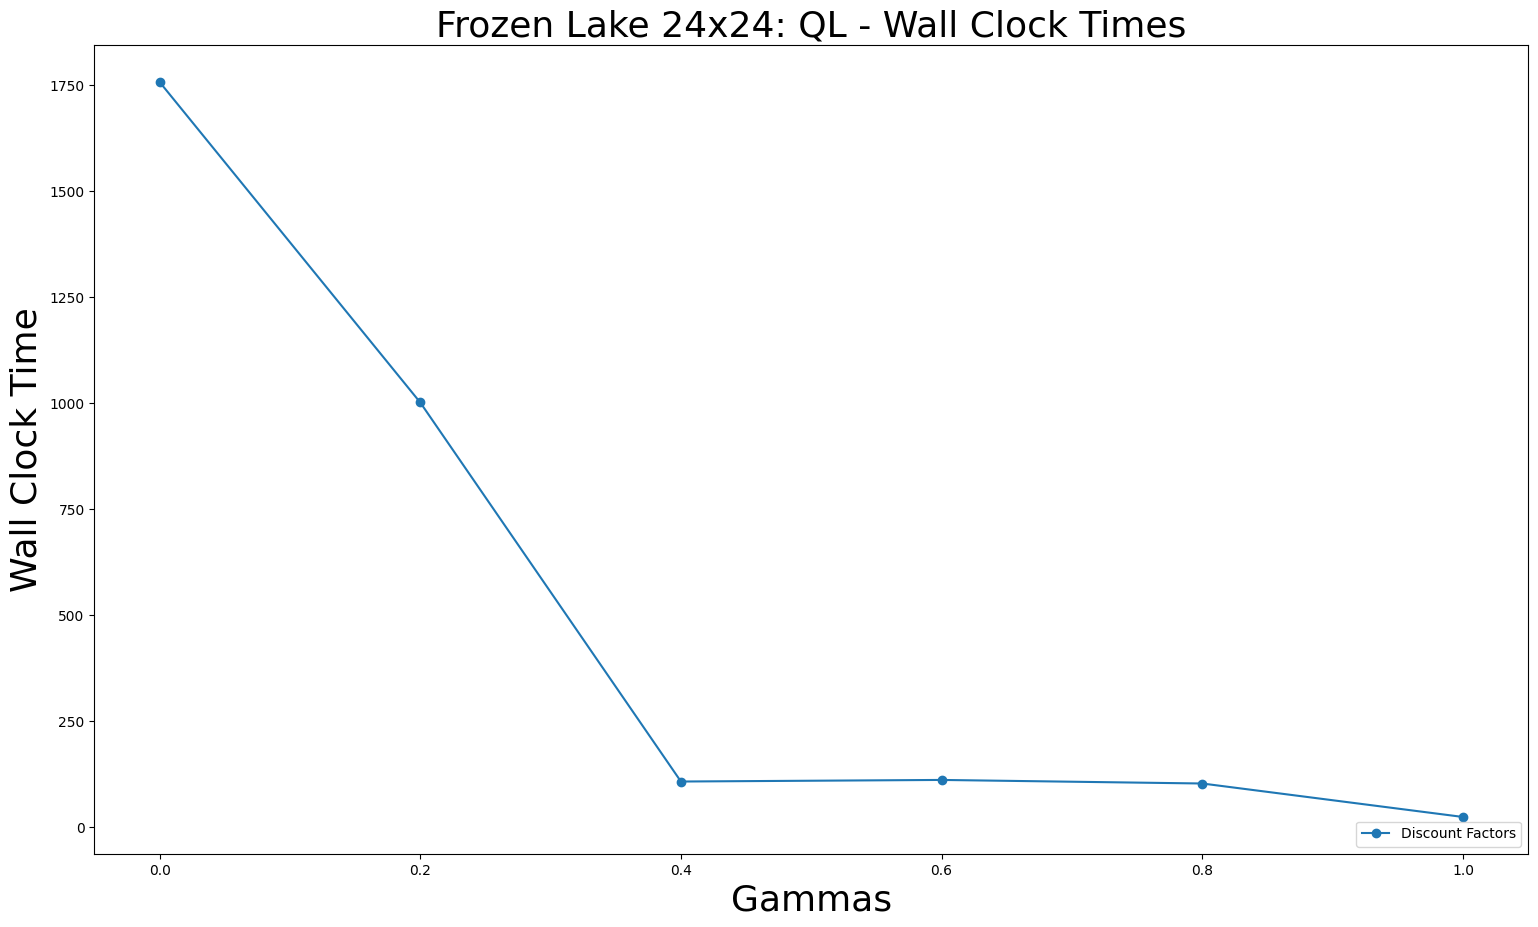

In [136]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
# lower_std = np.array(wall_clock_times_by_gamma_vi) - np.array(wall_clock_times_std_by_gamma_vi)
# upper_std = np.array(wall_clock_times_by_gamma_vi) + np.array(wall_clock_times_std_by_gamma_vi)
# ax.plot(alphas, wall_clock_times_by_alpha_ql, label="Learning Rates", marker='o')
ax.plot(gammas, wall_clock_times_by_gamma_ql_large_reward_shaped, label="Discount Factors", marker='o')
# ax.fill_between(gammas, lower_std, upper_std, color='grey', alpha=0.2)
ax.set_title("Frozen Lake 24x24: QL - Wall Clock Times", fontsize=26)
ax.set_xlabel('Gammas', fontsize=26)
ax.set_ylabel('Wall Clock Time', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_ql_large_reward_shaped_time_gammas.png")
plt.show()


### Learning Rates

In [190]:
wall_clock_times_by_alpha_ql_large_reward_shaped = []
wall_clock_times_std_by_alpha_ql_large_reward_shaped = []
Qs_by_alpha_ql_large_reward_shaped = []
Qs_std_by_alpha_ql_large_reward_shaped = []
Q_tracks_by_alpha_ql_large_reward_shaped = []
Q_tracks_std_by_alpha_ql_large_reward_shaped = []
pis_by_alpha_ql_large_reward_shaped = []
pis_std_by_alpha_ql_large_reward_shaped = []
gamma=0.5
alphas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
n_iters = 100000
for alpha in alphas:
    start = time.time()
    Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(gamma=gamma,
                                                             init_alpha=alpha,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=1.0,
                   min_epsilon=0.1,
                   epsilon_decay_ratio=0.5,
                   n_episodes=n_iters)
    end = time.time()
    running_time = end - start
    print("runtime = %.5f seconds" % running_time)
    wall_clock_times_by_alpha_ql_large_reward_shaped.append(running_time)
    Qs_by_alpha_ql_large_reward_shaped.append(Q)
    Q_tracks_by_alpha_ql_large_reward_shaped.append(Q_track)


runtime = 668.91 seconds
runtime = 670.64125 seconds


runtime = 501.56 seconds
runtime = 502.52274 seconds


runtime = 448.55 seconds
runtime = 448.93954 seconds


runtime = 448.10 seconds
runtime = 448.45261 seconds


runtime = 595.91 seconds
runtime = 596.19421 seconds


runtime = 493.55 seconds
runtime = 494.06296 seconds


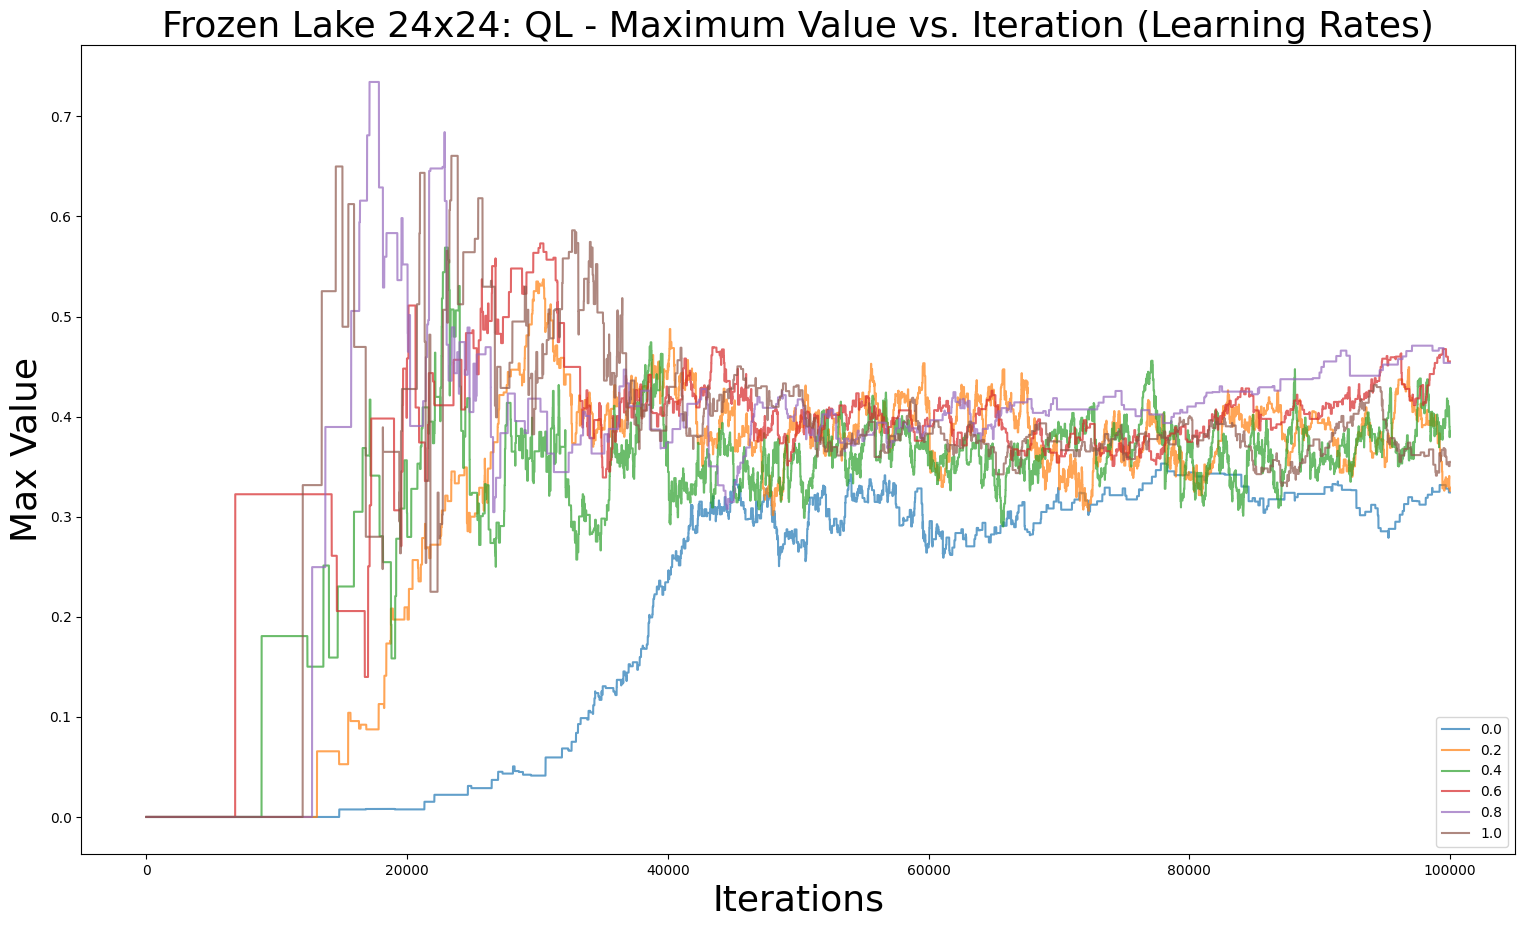

In [191]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(len(alphas)):
    max_value_per_iter = np.amax(np.amax(Q_tracks_by_alpha_ql_large_reward_shaped[i], axis=2), axis=1)  # max value per iteration   
    ax.plot(range(0,n_iters), max_value_per_iter, label=alphas[i], alpha=0.7)
#     ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    # ax.set_xscale('log', base=10)
ax.set_title("Frozen Lake 24x24: QL - Maximum Value vs. Iteration (Learning Rates)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Max Value', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_ql_large_reward_shaped_alphas2.png")
plt.show()

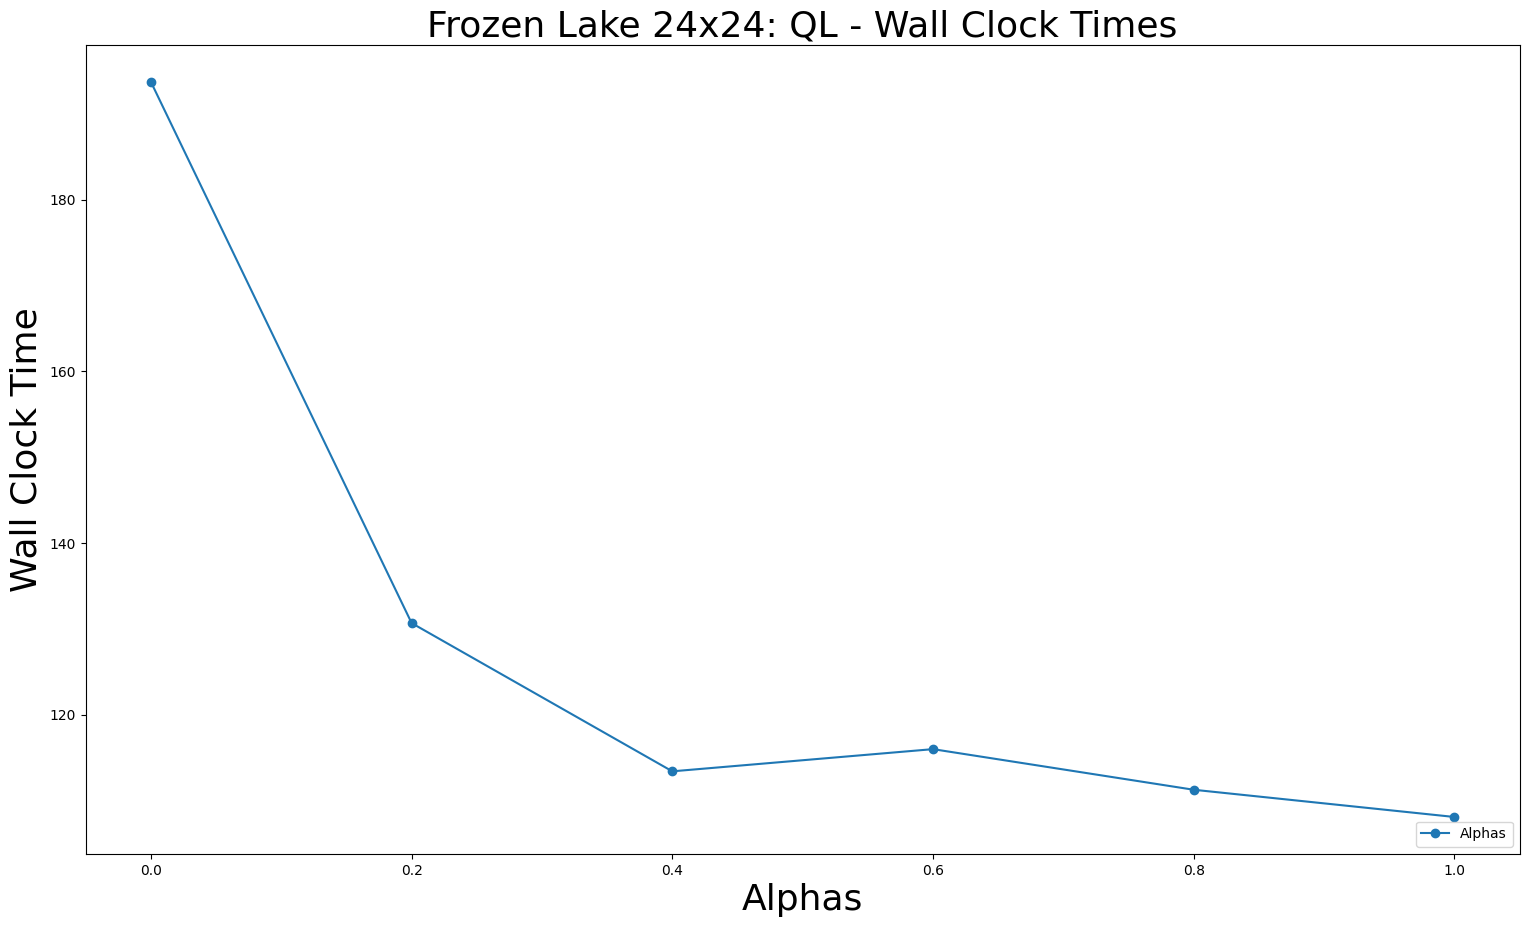

In [167]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
# lower_std = np.array(wall_clock_times_by_gamma_vi) - np.array(wall_clock_times_std_by_gamma_vi)
# upper_std = np.array(wall_clock_times_by_gamma_vi) + np.array(wall_clock_times_std_by_gamma_vi)
# ax.plot(alphas, wall_clock_times_by_alpha_ql, label="Learning Rates", marker='o')
ax.plot(gammas, wall_clock_times_by_alpha_ql_large_reward_shaped, label="Alphas", marker='o')
ax.plot(gammas, wall_clock_times_by_gamma_ql_large_reward_shaped, label="Discount Factors", marker='o')
# ax.fill_between(gammas, lower_std, upper_std, color='grey', alpha=0.2)
ax.set_title("Frozen Lake 24x24: QL - Wall Clock Times", fontsize=26)
ax.set_xlabel('Alphas', fontsize=26)
ax.set_ylabel('Wall Clock Time', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_ql_large_reward_shaped_time_alphas.png")
plt.show()


### Epsilons

In [193]:
wall_clock_times_by_epsilon_ql_large_reward_shaped = []
wall_clock_times_std_by_epsilon_ql_large_reward_shaped = []
Qs_by_epsilon_ql_large_reward_shaped = []
Qs_std_by_epsilon_ql_large_reward_shaped = []
Q_tracks_by_epsilon_ql_large_reward_shaped = []
Q_tracks_std_by_epsilon_ql_large_reward_shaped = []
pis_by_epsilon_ql_large_reward_shaped = []
pis_std_by_epsilon_ql_large_reward_shaped = []
alpha = .5
gamma=0.5
epsilons = [0.2, 0.5, 1.0]
n_iters = 50000
for epsilon in epsilons:
    start = time.time()
    Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(gamma=gamma,
                                                             init_alpha=alpha,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=epsilon,
                                                                 min_epsilon=0.1,
                   epsilon_decay_ratio=0.5,
                   n_episodes=n_iters)
    end = time.time()
    running_time = end - start
    print("runtime = %.5f seconds" % running_time)
    wall_clock_times_by_epsilon_ql_large_reward_shaped.append(running_time)
    Qs_by_epsilon_ql_large_reward_shaped.append(Q)
    Q_tracks_by_epsilon_ql_large_reward_shaped.append(Q_track)

runtime = 387.75 seconds
runtime = 388.63457 seconds


runtime = 302.14 seconds
runtime = 302.18496 seconds


runtime = 233.14 seconds
runtime = 233.18176 seconds


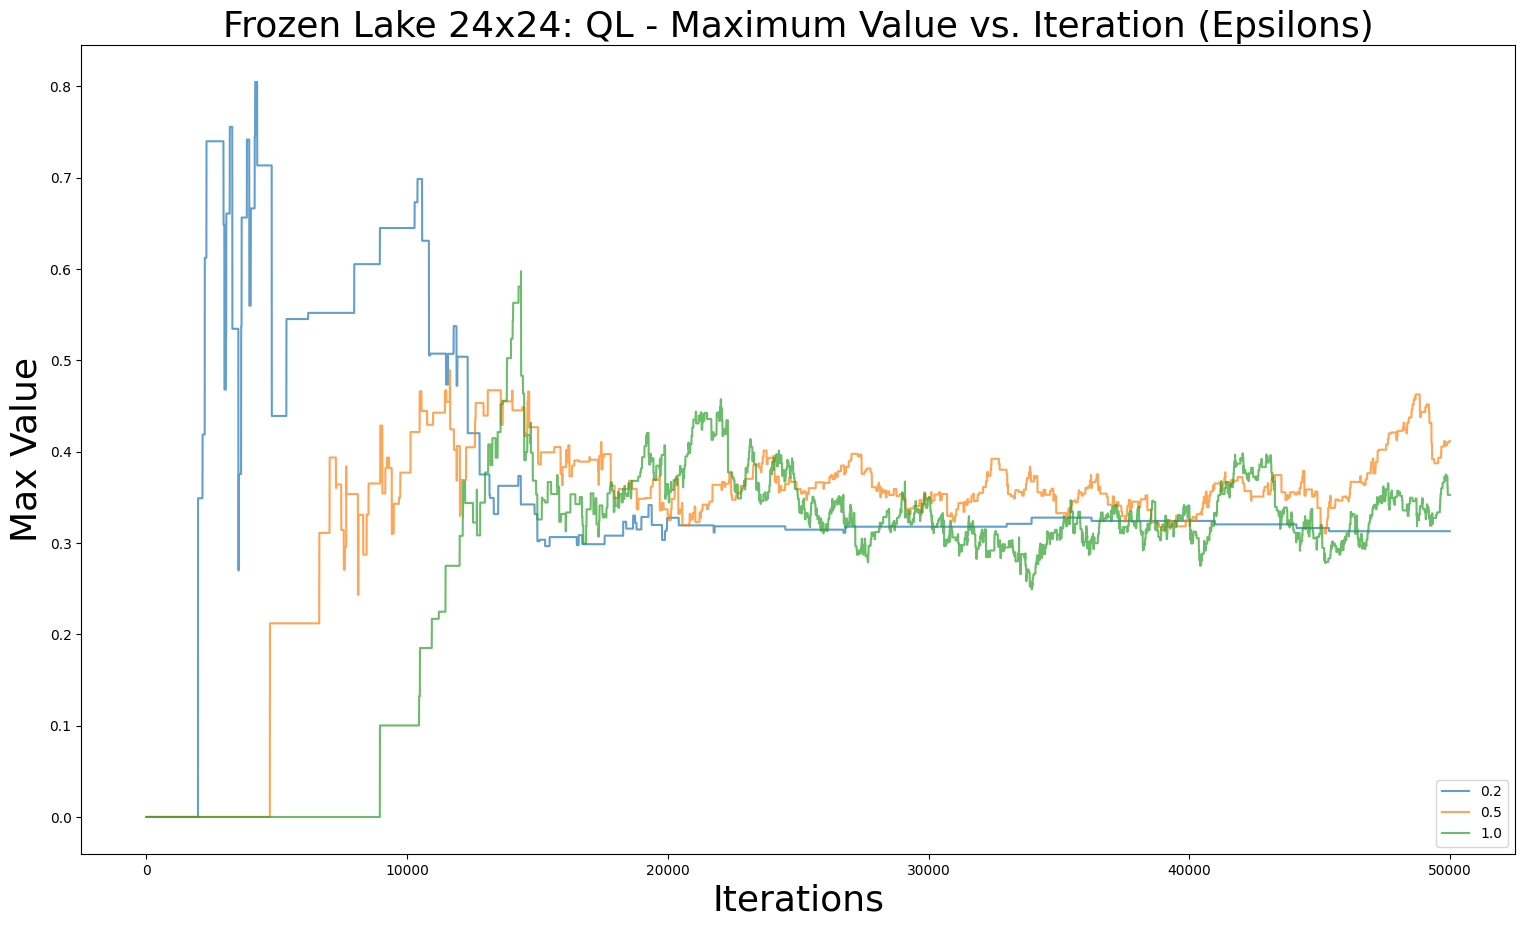

In [194]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(len(epsilons)):
    max_value_per_iter = np.amax(np.amax(Q_tracks_by_epsilon_ql_large_reward_shaped[i], axis=2), axis=1)  # max value per iteration   
    ax.plot(range(0,n_iters), max_value_per_iter, label=epsilons[i], alpha=0.7)
#     ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    # ax.set_xscale('log', base=10)
ax.set_title("Frozen Lake 24x24: QL - Maximum Value vs. Iteration (Epsilons)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Max Value', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_ql_large_reward_shaped_epsilons2.png")
plt.show()

In [172]:
wall_clock_times_by_epsilon_decay_ql_large_reward_shaped = []
wall_clock_times_std_by_epsilon_decay_ql_large_reward_shaped = []
Qs_by_epsilon_decay_ql_large_reward_shaped = []
Qs_std_by_epsilon_decay_ql_large_reward_shaped = []
Q_tracks_by_epsilon_decay_ql_large_reward_shaped = []
Q_tracks_std_by_epsilon_decay_ql_large_reward_shaped = []
pis_by_epsilon_decay_ql_large_reward_shaped = []
pis_std_by_epsilon_decay_ql_large_reward_shaped = []
alpha = .5
gamma=0.5
epsilon_decays = [0.1, 0.5, 0.9]
n_iters = 100000
for epsilon_decay in epsilon_decays:
    start = time.time()
    Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(gamma=gamma,
                                                             init_alpha=alpha,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=1.0,
                                                                 min_epsilon=0.1,
                   epsilon_decay_ratio=epsilon_decay,
                   n_episodes=n_iters)
    end = time.time()
    running_time = end - start
    print("runtime = %.5f seconds" % running_time)
    wall_clock_times_by_epsilon_decay_ql_large_reward_shaped.append(running_time)
    Qs_by_epsilon_decay_ql_large_reward_shaped.append(Q)
    Q_tracks_by_epsilon_decay_ql_large_reward_shaped.append(Q_track)

runtime = 112.17 seconds
runtime = 112.23898 seconds


runtime = 112.08 seconds
runtime = 112.13042 seconds


runtime = 92.83 seconds
runtime = 92.85065 seconds


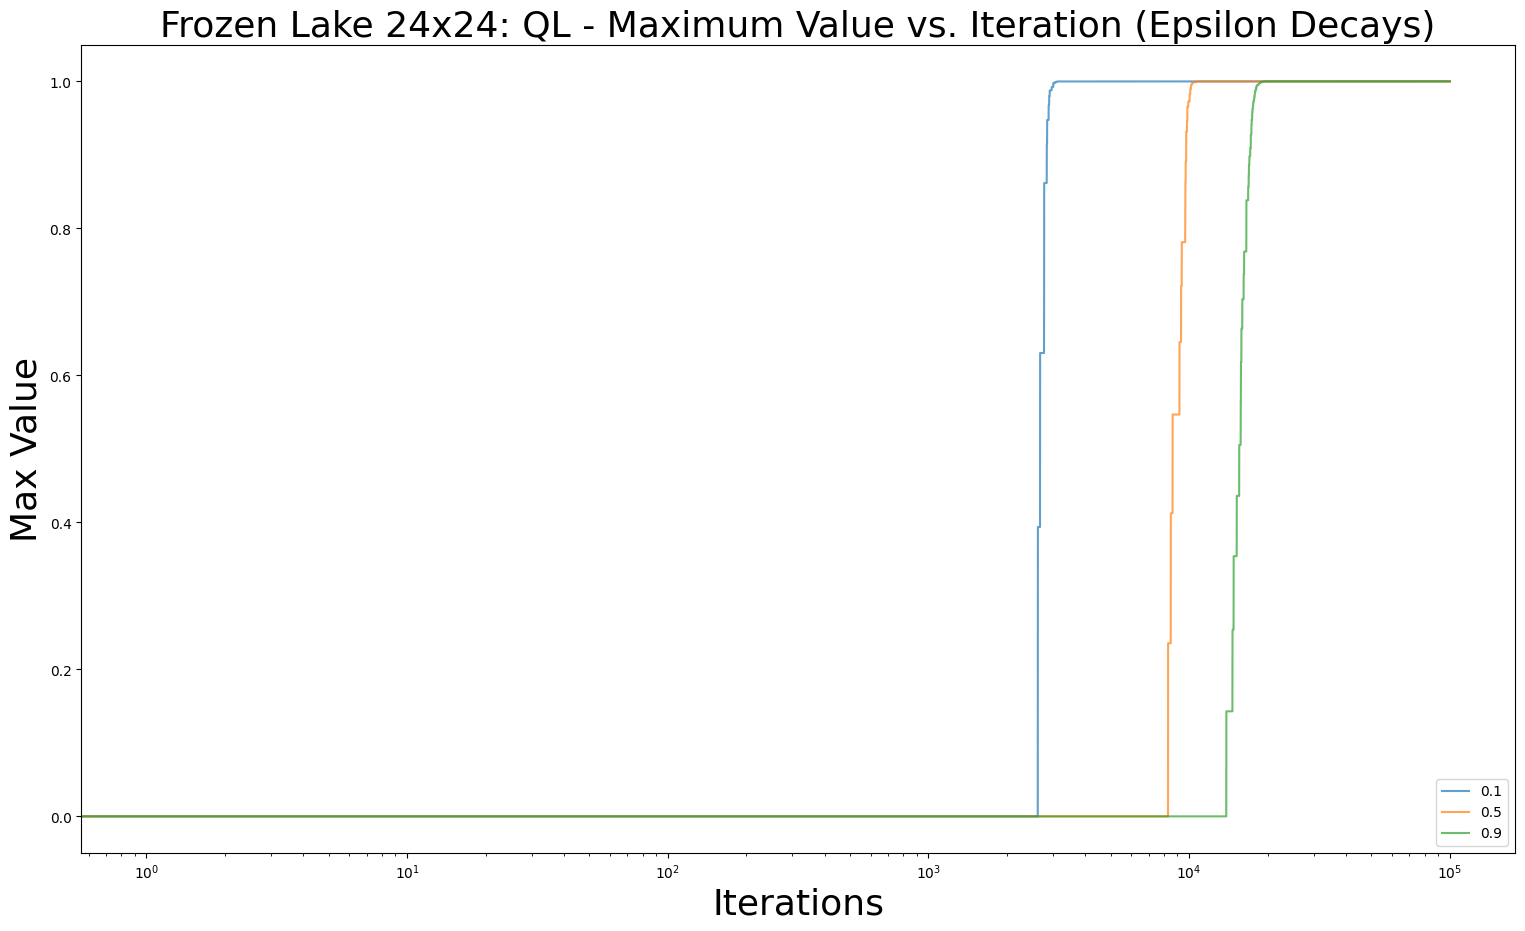

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(len(epsilon_decays)):
    max_value_per_iter = np.amax(np.amax(Q_tracks_by_epsilon_decay_ql_large_reward_shaped[i], axis=2), axis=1)  # max value per iteration   
    ax.plot(range(0,n_iters), max_value_per_iter, label=epsilon_decays[i], alpha=0.7)
#     ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    ax.set_xscale('log', base=10)
ax.set_title("Frozen Lake 24x24: QL - Maximum Value vs. Iteration (Epsilon Decays)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Max Value', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_ql_large_reward_shaped_epsilon_decays.png")
plt.show()

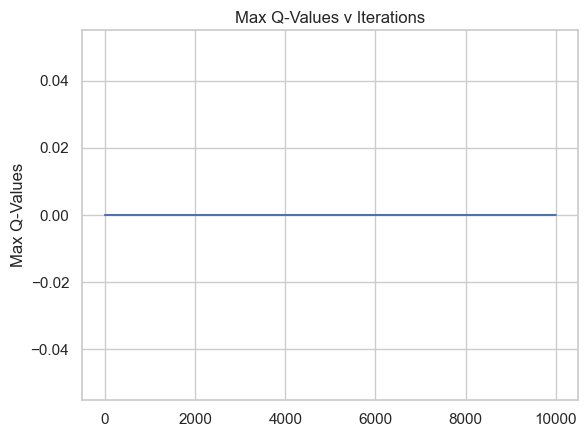

In [358]:
#Q-learning v_iters_plot
max_q_value_per_iter = np.amax(np.amax(Q_track, axis=2), axis=1)
Plots.v_iters_plot(max_q_value_per_iter, "Max Q-Values")

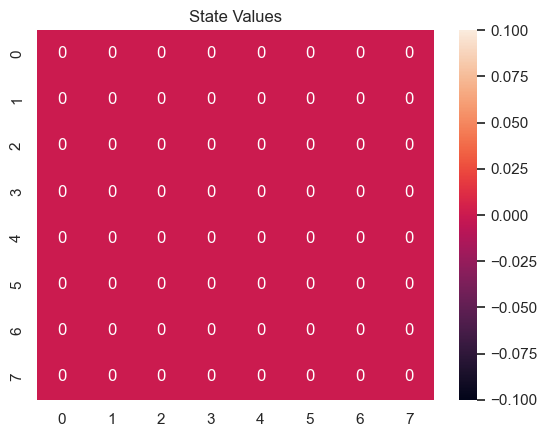

In [351]:
#Q-learning grid_values_heat_map


Plots.grid_values_heat_map(V, "State Values")

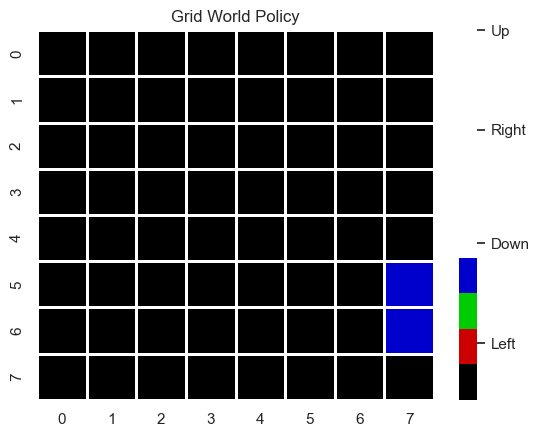

In [340]:
import math
n_states = frozen_lake.env.observation_space.n

new_pi = list(map(lambda x: pi(x), range(n_states)))
s = int(math.sqrt(n_states))
Plots.grid_world_policy_plot(np.array(new_pi), "Grid World Policy")

In [196]:
wall_clock_times_by_epsilon_ql_large_reward_shaped

[388.63456773757935, 302.18496012687683, 233.1817638874054]

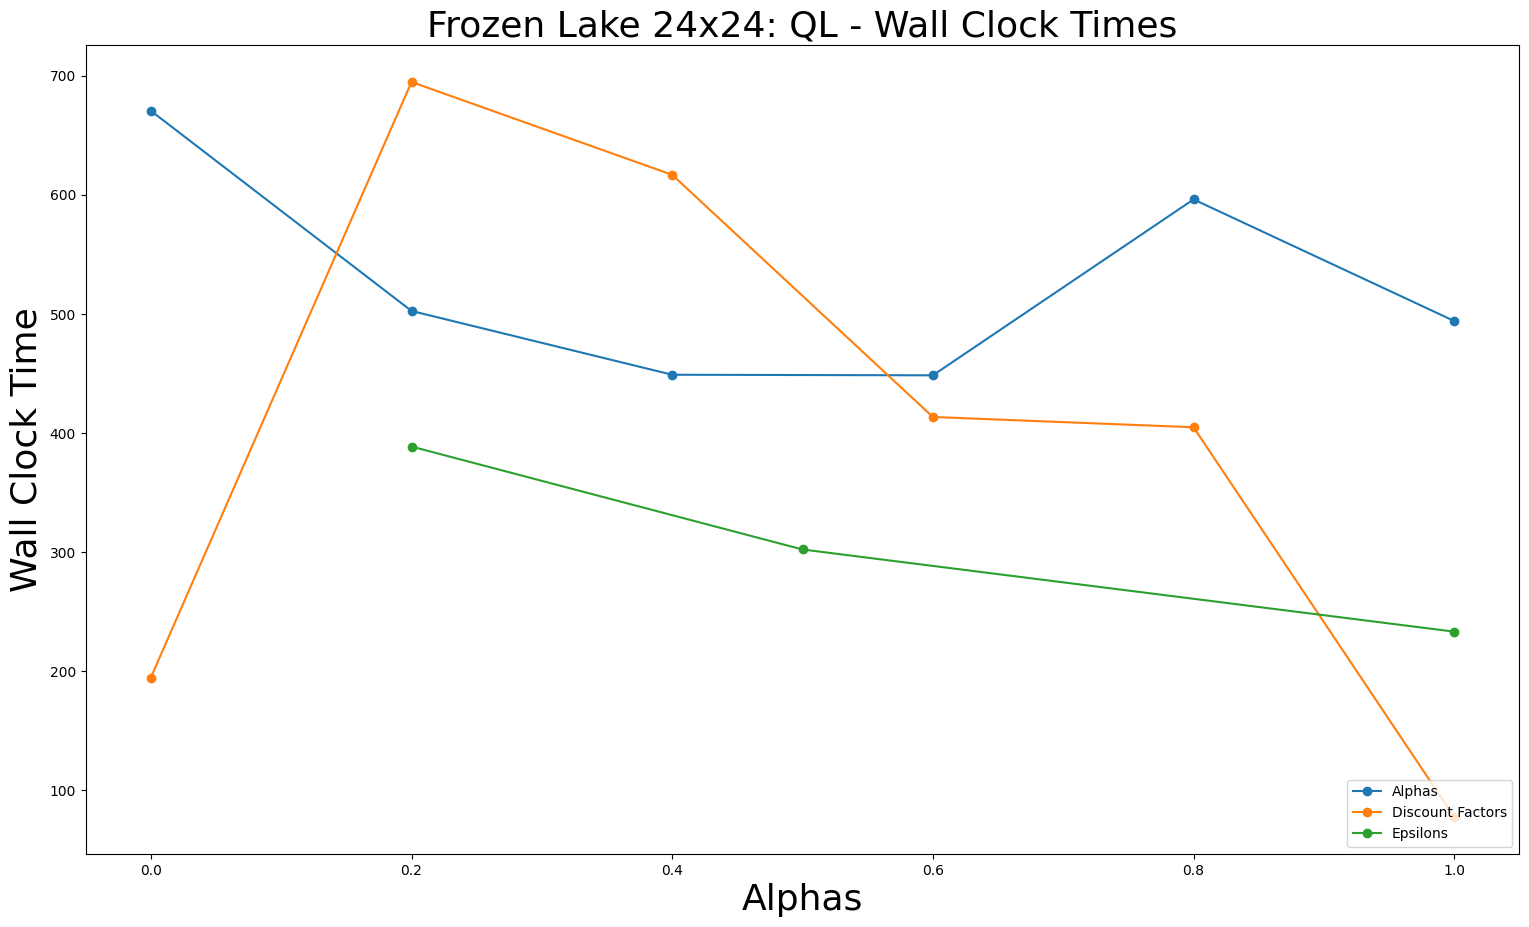

In [198]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.plot(gammas, wall_clock_times_by_alpha_ql_large_reward_shaped, label="Alphas", marker='o')
ax.plot(gammas, wall_clock_times_by_gamma_ql_large_reward_shaped, label="Discount Factors", marker='o')

wall_clock_times_by_epsilon_ql_large_reward_shaped2 = wall_clock_times_by_epsilon_ql_large_reward_shaped.copy()
wall_clock_times_by_epsilon_ql_large_reward_shaped2.insert(0,None)

ax.plot(epsilons, wall_clock_times_by_epsilon_ql_large_reward_shaped, label="Epsilons", marker='o')
# ax.fill_between(gammas, lower_std, upper_std, color='grey', alpha=0.2)
ax.set_title("Frozen Lake 24x24: QL - Wall Clock Times", fontsize=26)
ax.set_xlabel('Alphas', fontsize=26)
ax.set_ylabel('Wall Clock Time', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_ql_large_reward_shaped_times.png")
plt.show()


In [ ]:
wall_clock_times_by_sizes_ql_large_reward_shaped = []
wall_clock_times_std_by_sizes_ql_large_reward_shaped = []
Qs_by_sizes_ql_large_reward_shaped = []
Qs_std_by_sizes_ql_large_reward_shaped = []
Q_tracks_by_sizes_ql_large_reward_shaped = []
Q_tracks_std_by_sizes_ql_large_reward_shaped = []
pis_by_sizes_ql_large_reward_shaped = []
pis_std_by_sizes_ql_large_reward_shaped = []
sizes = [8, 16, 32, 64]  # discount factor. 0 == immediate. 1 == long term.
n_iters = 100000
alpha=0.5
gamma=0.9
for size in sizes:
    frozen_lake = FrozenLakeEnv(desc=generate_random_map(size=size, p=0.90), is_slippery=True, render_mode=None)  ## REWARD SHAPING
    frozen_lake.reset(seed=42)
    start = time.time()
    Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(gamma=gamma,
                                                             init_alpha=alpha,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=1.0,
                   min_epsilon=0.1,
                   epsilon_decay_ratio=0.5,
                   n_episodes=n_iters)
    end = time.time()
    running_time = end - start
    print("runtime = %.5f seconds" % running_time)
    wall_clock_times_by_sizes_ql_large_reward_shaped.append(running_time)
    Qs_by_sizes_ql_large_reward_shaped.append(Q)
    Q_tracks_by_sizes_ql_large_reward_shaped.append(Q_track)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(len(sizes)):
    max_value_per_iter = np.amax(np.amax(Q_tracks_by_sizes_ql_large_reward_shaped[i], axis=2), axis=1)  # max value per iteration   
    ax.plot(range(0,n_iters), max_value_per_iter, label=sizes[i], alpha=0.7)
#     ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    ax.set_xscale('log', base=2)
ax.set_title("Frozen Lake: QL - Maximum Value vs. Iteration (Grid World Sizes)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Max Value', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_ql_large_reward_shaped_sizes.png")
plt.show()

In [205]:
size=24
frozen_lake = FrozenLakeEnv(desc=generate_random_map(size=size, p=0.90), is_slippery=True, render_mode=None)  ## REWARD SHAPING
frozen_lake.reset(seed=42)
size = 24
gamma = 0.9
alpha = 0.5
epsilon = 1.0
epsilon_decay = 0.9
n_iter = 100000
start = time.time()
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(gamma=gamma,
                                                         init_alpha=alpha,
               min_alpha=0.01,
               alpha_decay_ratio=0.5,
               init_epsilon=1.0,
                                                             min_epsilon=0.1,
               epsilon_decay_ratio=epsilon_decay,
               n_episodes=n_iter)
end = time.time()
running_time = end - start

grid_shape = (24,24)

actions_mapping = {3: '↑', 2: '→', 1: '↓', 0: '←'}
colors_mapping = {'↑': 'blue', '→':'green',  '↓':'orange', '←':'red'}

# Create a matrix for plotting the policy
policy_grid = np.zeros(grid_shape, dtype='<U2')

# Iterate through each state and assign the corresponding action from the policy
for i in range(grid_shape[0]):
    for j in range(grid_shape[1]):
        observation_spot = i * grid_shape[0] + j
        action = pi[observation_spot]
        policy_grid[i,j] = actions_mapping[action]



runtime = 143.74 seconds


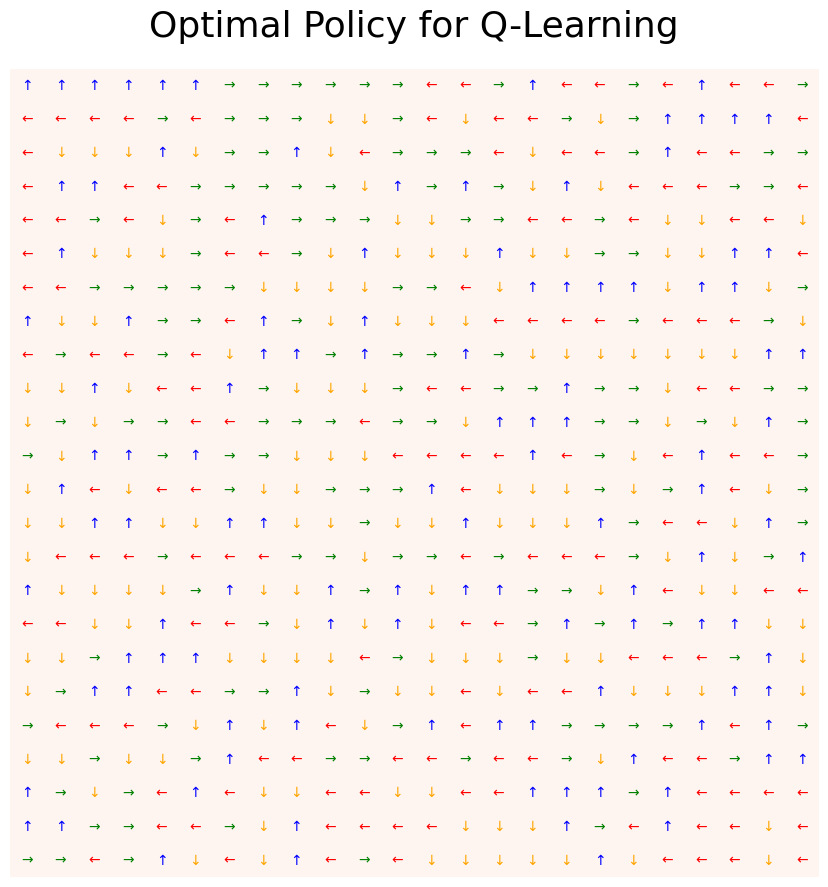

In [207]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
cm = plt.cm.Reds
cm.set_under('white')
ax.matshow(np.zeros(grid_shape), cmap=cm)
ax.axis('off')
for (i, j), z in np.ndenumerate(policy_grid):
    ax.text(j, i, z, ha='center', va='center', color=colors_mapping[z])
ax.set_title('Optimal Policy for Q-Learning', fontsize=26)
fig.set_facecolor("white")
plt.savefig(f"/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_ql_policy.png", bbox_inches='tight')
plt.show()
